# Retail Analysis with Walmart Data
Project 5 

DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

1 Which store has maximum sales

2 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3 Which store/s has good quarterly growth rate in Q3’2012

4 Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5 Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
#Importing data and libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data=pd.read_csv('Walmart_Store_sales.csv')
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [7]:
#1 Which store has maximum sales

<BarContainer object of 6435 artists>

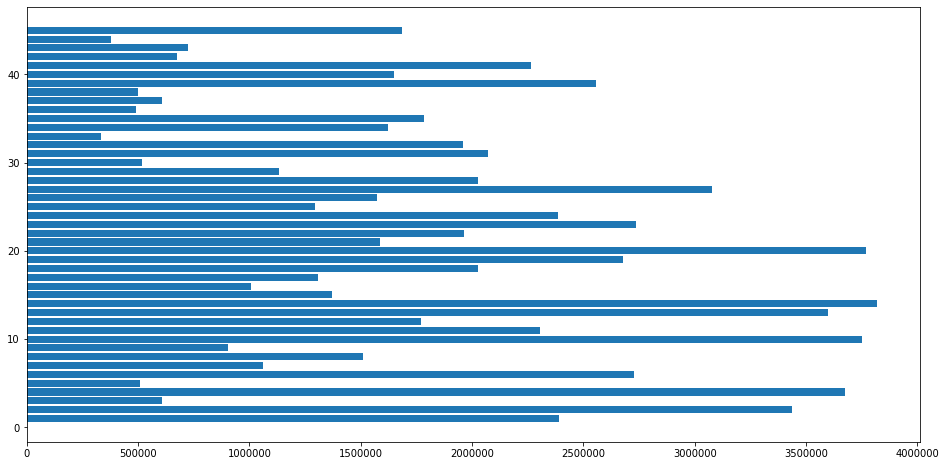

In [7]:
plt.figure(figsize=(16,8))
plt.barh(data.Store,data.Weekly_Sales)

In [8]:
df=pd.DataFrame(data.iloc[:,[0,2]])
df

Store  Weekly_Sales
0         1    1643690.90
1         1    1641957.44
2         1    1611968.17
3         1    1409727.59
4         1    1554806.68
...     ...           ...
6430     45     713173.95
6431     45     733455.07
6432     45     734464.36
6433     45     718125.53
6434     45     760281.43

[6435 rows x 2 columns]

In [9]:
df1=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].sum())

In [10]:
df1.sort_values('Weekly_Sales',ascending =False).iloc[[0]]

#So store 20 has maximum sales

Weekly_Sales
Store              
20     3.013978e+08

In [11]:
#2 Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
df2=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std())
df3=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean())

In [12]:

df3=df3.rename(columns={'Weekly_Sales':'Weekly_Sales_Mean'})
df2=df2.rename(columns={'Weekly_Sales':'Weekly_Sales_SD'})
df4=pd.concat([df2,df3], axis=1)


In [13]:
df4['Coeff  of SD']=df4.Weekly_Sales_SD/df4.Weekly_Sales_Mean
df4.sort_values('Weekly_Sales_SD', ascending=True)

#So Store 37 has highest SD

Weekly_Sales_SD  Weekly_Sales_Mean  Coeff  of SD
Store                                                  
37        21837.461190       5.189003e+05      0.042084
30        22809.665590       4.385796e+05      0.052008
33        24132.927322       2.598617e+05      0.092868
44        24762.832015       3.027489e+05      0.081793
5         37737.965745       3.180118e+05      0.118668
43        40598.413260       6.333247e+05      0.064104
38        42768.169450       3.857317e+05      0.110875
3         46319.631557       4.027044e+05      0.115021
42        50262.925530       5.564039e+05      0.090335
36        60725.173579       3.735120e+05      0.162579
9         69028.666585       5.439806e+05      0.126895
16        85769.680133       5.192477e+05      0.165181
29        99120.136596       5.394514e+05      0.183742
34       104630.164676       9.667816e+05      0.108225
8        106280.829881       9.087495e+05      0.116953
26       110431.288141       1.002912e+06      0.110111
17       112162.936087       8.935814e+05      0.125521
7        112585.469220       5.706173e+05      0.197305
25       112976.788600       7.067215e+05      0.159860
40       119002.112858       9.641280e+05      0.123430
15       120538.652043       6.233125e+05      0.193384
31       125855.942933       1.395901e+06      0.090161
21       128752.812853       7.560691e+05      0.170292
45       130168.526635       7.859814e+05      0.165613
32       138017.252087       1.166568e+06      0.118310
12       139166.871880       1.009002e+06      0.137925
1        155980.767761       1.555264e+06      0.100292
22       161251.350631       1.028501e+06      0.156783
11       165833.887863       1.356383e+06      0.122262
24       167745.677567       1.356755e+06      0.123637
18       176641.510839       1.084718e+06      0.162845
28       181758.967539       1.323522e+06      0.137330
41       187907.162766       1.268125e+06      0.148177
19       191722.638730       1.444999e+06      0.132680
35       211243.457791       9.197250e+05      0.229681
6        212525.855862       1.564728e+06      0.135823
39       217466.454833       1.450668e+06      0.149908
2        237683.694682       1.925751e+06      0.123424
27       239930.135688       1.775216e+06      0.135155
23       249788.038068       1.389864e+06      0.179721
13       265506.995776       2.003620e+06      0.132514
4        266201.442297       2.094713e+06      0.127083
20       275900.562742       2.107677e+06      0.130903
10       302262.062504       1.899425e+06      0.159133
14       317569.949476       2.020978e+06      0.157137

In [14]:
#3 Which store/s has good quarterly growth rate in Q3’2012
data['Qtr']=pd.PeriodIndex(data['Date'], freq='Q')

In [15]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment     Qtr  
0  211.096358         8.106  2010Q2  
1  211.242170         8.106  2010Q4  
2  211.289143         8.106  2010Q1  
3  211.319643         8.106  2010Q1  
4  211.350143         8.106  2010Q2

In [16]:
dt=pd.DataFrame(data.iloc[:,[0,2,8]])
Q2=dt[(dt['Qtr']=='2012Q2')] 
Q2=Q2.rename(columns={'Qtr':'Qtr2'})
Q3=dt[(dt['Qtr']=='2012Q3')]
Q3=Q3.rename(columns={'Qtr':'Qtr3'})
Q3

Store  Weekly_Sales    Qtr3
109       1    1675431.16  2012Q3
122       1    1697230.96  2012Q3
127       1    1527014.04  2012Q3
128       1    1497954.76  2012Q3
129       1    1439123.71  2012Q3
...     ...           ...     ...
6426     45     734297.87  2012Q3
6427     45     766512.66  2012Q3
6428     45     702238.27  2012Q3
6429     45     723086.20  2012Q3
6430     45     713173.95  2012Q3

[540 rows x 3 columns]

In [17]:
Q2_sale=pd.DataFrame(Q2.groupby('Store')['Weekly_Sales'].sum())
Q3_sale=pd.DataFrame(Q3.groupby('Store')['Weekly_Sales'].sum())

In [18]:
Sale=pd.concat([Q2_sale,Q3_sale], axis=1)

In [19]:
Sale.columns=['Sum Weekly_Sale Q2', 'Sum Weekly_Sale Q3']

In [20]:
Sale['Percentage Sale']=(Sale['Sum Weekly_Sale Q3']-Sale['Sum Weekly_Sale Q2'])*100/Sale['Sum Weekly_Sale Q2']

In [21]:
Sale.sort_values('Percentage Sale', ascending=False)
#So Store 16 has highest SD

Sum Weekly_Sale Q2  Sum Weekly_Sale Q3  Percentage Sale
Store                                                         
16             6626133.44          6441311.11        -2.789294
7              7613593.92          7322393.92        -3.824738
35            10753570.97         10252122.68        -4.663086
26            13218289.66         12417575.35        -6.057624
39            20191585.63         18899955.17        -6.396875
23            18283424.90         17103654.36        -6.452678
41            17560035.88         16373588.44        -6.756521
44             4322555.33          4020486.01        -6.988212
32            15415236.21         14142164.84        -8.258527
37             6859777.96          6250524.08        -8.881539
8             11934275.61         10873860.34        -8.885460
21             9226279.62          8403507.99        -8.917697
19            18315278.56         16644341.31        -9.123188
24            17768191.98         16125999.86        -9.242314
13            26803225.55         24319994.35        -9.264673
40            12849747.45         11647661.37        -9.354939
33             3512138.05          3177072.43        -9.540218
18            13834706.08         12507521.72        -9.593152
4             28384185.16         25652119.35        -9.625310
31            18249155.35         16454328.46        -9.835123
11            17879095.77         16094363.07        -9.982231
25             9247467.19          8309440.44       -10.143607
42             7608247.31          6830839.86       -10.217957
10            23598433.93         21169356.45       -10.293384
30             5786335.45          5181974.44       -10.444624
20            27550180.62         24665938.11       -10.469051
43             8239792.67          7376726.03       -10.474373
38             5732362.70          5129297.64       -10.520358
27            22593640.73         20191238.11       -10.633092
2             25085123.61         22396867.61       -10.716535
3              5562668.16          4966495.93       -10.717379
17            12918892.02         11533998.38       -10.719910
12            13193365.04         11777508.50       -10.731580
34            12858027.98         11476258.98       -10.746352
22            13329065.39         11818544.33       -11.332535
28            16985999.95         15055659.67       -11.364302
1             21036965.58         18633209.98       -11.426342
6             20728970.16         18341221.11       -11.518899
9              7431320.13          6528239.56       -12.152357
15             7867952.23          6909374.37       -12.183321
5              4427262.21          3880621.88       -12.347142
36             4090378.90          3578123.58       -12.523420
29             7034493.19          6127862.07       -12.888364
45            10278900.05          8851242.32       -13.889207
14            24427769.06         20140430.40       -17.551086

# Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [22]:
Non_holiday=data[data['Holiday_Flag']==0]
Holiday=data[data['Holiday_Flag']==1]

In [23]:
Non_holiday=pd.DataFrame(Non_holiday.groupby('Date')['Weekly_Sales'].sum())
Non_holiday['Date (NH)']=Non_holiday.index
Non_holiday.mean()

Weekly_Sales    4.685654e+07
dtype: float64

In [24]:
Holiday=pd.DataFrame(Holiday.groupby('Date')['Weekly_Sales'].sum())
Holiday[Holiday['Weekly_Sales']>4.685654e+07]
#The belows dates are the ones when the sale was greater than the avg of the non_holiday sales for all stores

Weekly_Sales
Date                    
2010-11-26   65821003.24
2010-12-02   48336677.63
2011-11-02   47336192.79
2011-11-25   66593605.26
2012-07-09   48330059.31
2012-10-02   50009407.92

# Provide a monthly and semester view of sales in units and give insights

In [25]:
data.tail()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment     Qtr  
6430  192.013558         8.684  2012Q3  
6431  192.170412         8.667  2012Q2  
6432  192.327265         8.667  2012Q4  
6433  192.330854         8.667  2012Q4  
6434  192.308899         8.667  2012Q4

In [26]:
data['Month']=pd.PeriodIndex(data['Date'], freq='M')

In [27]:
Sales_Data=data.iloc[:,[0,2,8,9]]
a=pd.DataFrame(Sales_Data.groupby(['Store','Month','Qtr'])['Weekly_Sales'].sum())
a

Weekly_Sales
Store Month   Qtr                 
1     2010-01 2010Q1    1453329.50
      2010-02 2010Q1    6109082.18
      2010-03 2010Q1    5965143.02
      2010-04 2010Q2    5897939.82
      2010-05 2010Q2    9076140.38
...                            ...
45    2012-08 2012Q3    2970160.06
      2012-09 2012Q3    2915467.29
      2012-10 2012Q4    3015101.40
      2012-11 2012Q4     770487.37
      2012-12 2012Q4     734464.36

[1620 rows x 1 columns]

In [28]:
a=a.reset_index()
a['Restructured_Month']=pd.factorize(a.Month)[0]+1
a['Restructured_Qtr']=pd.factorize(a.Qtr)[0]+1

In [29]:
a.columns=['Store','Month','Qtr','Monthly_Sales','Restructured_Month','Restructured_Qtr']


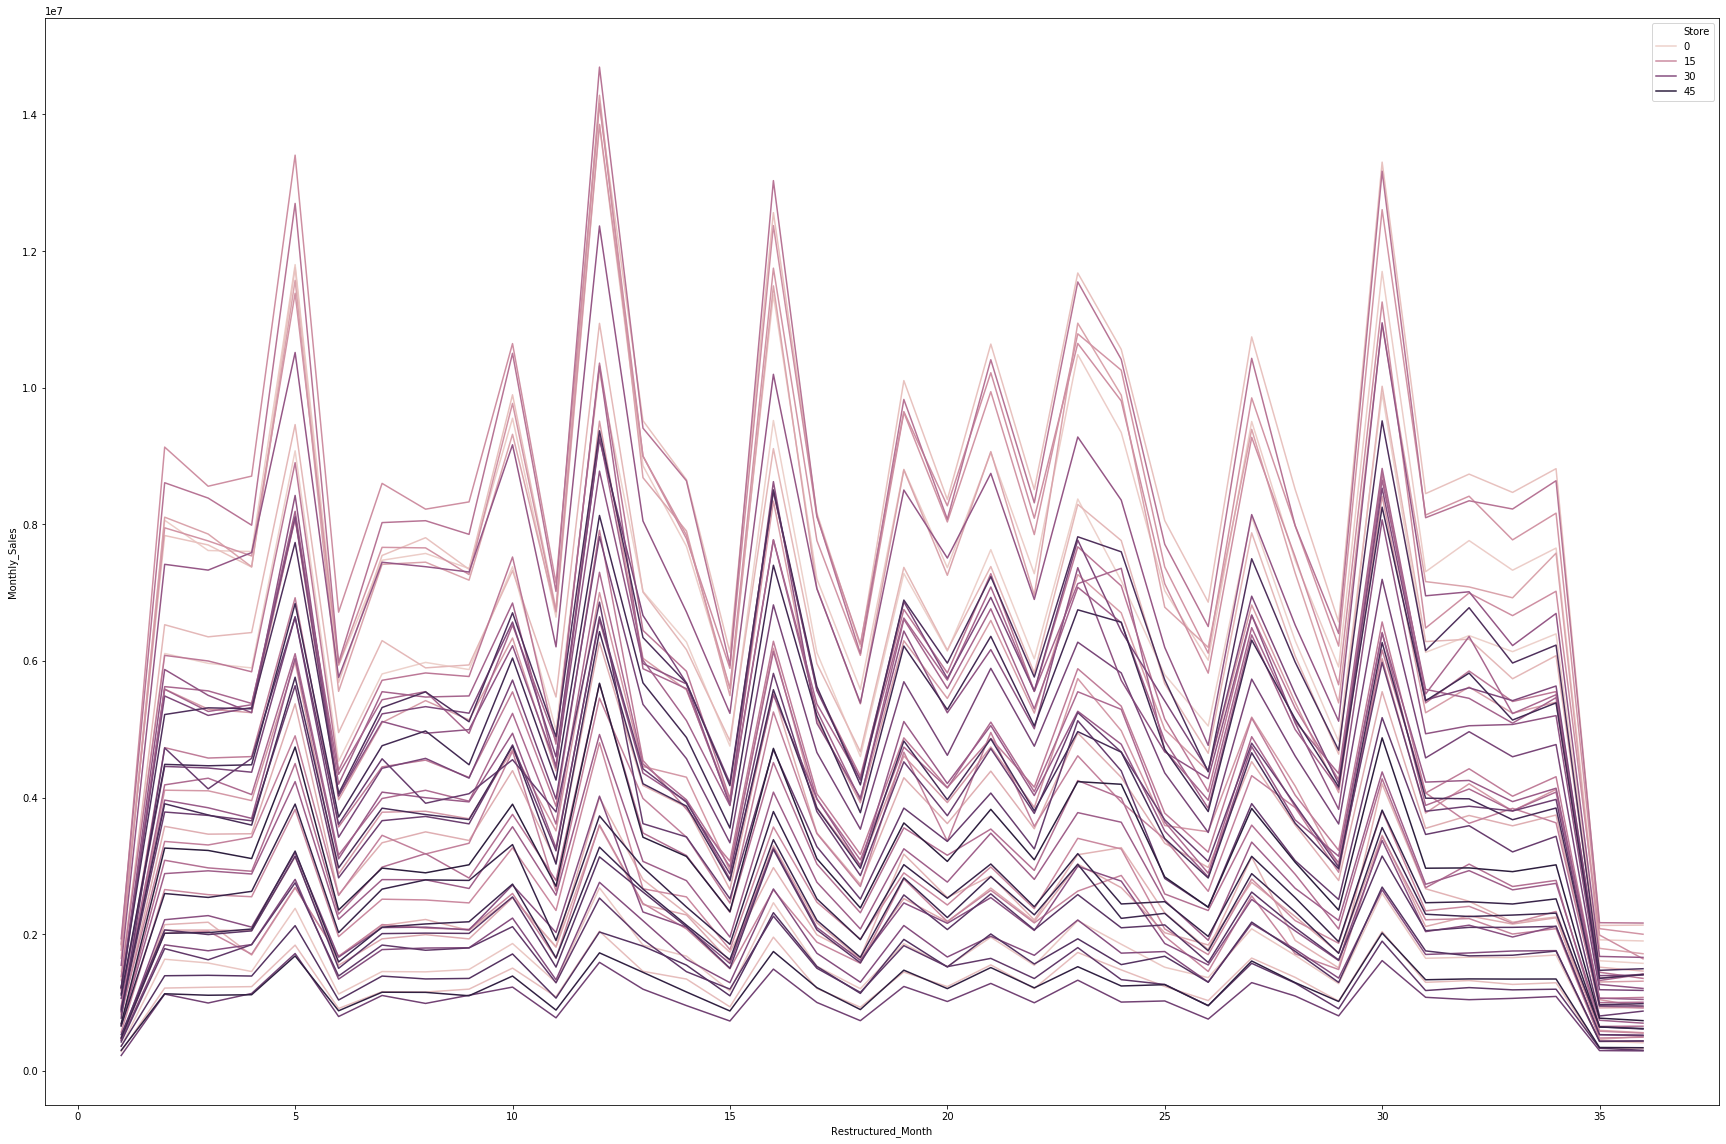

In [30]:
plt.figure(figsize=(30,20))
sns.lineplot(x='Restructured_Month', y='Monthly_Sales', data=a, hue='Store')

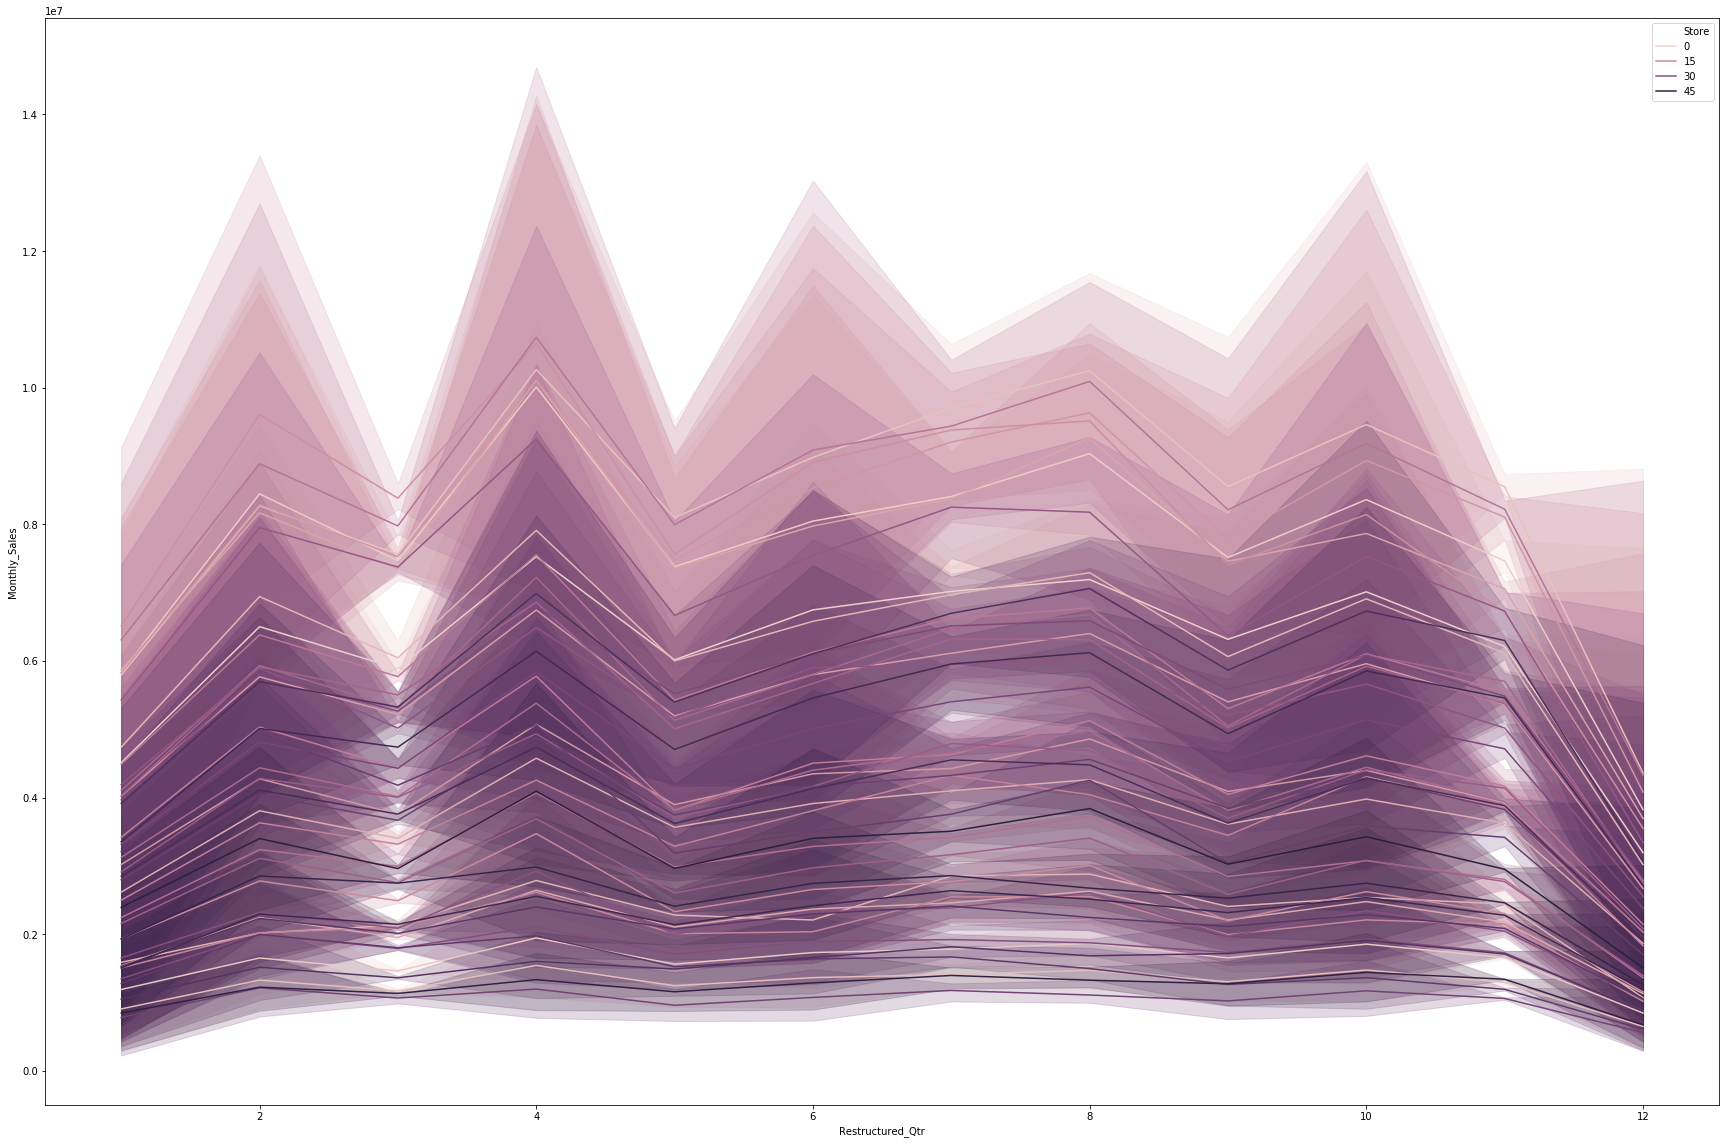

In [31]:
plt.figure(figsize=(30,20))
sns.lineplot(x='Restructured_Qtr', y='Monthly_Sales', data=a, hue='Store')

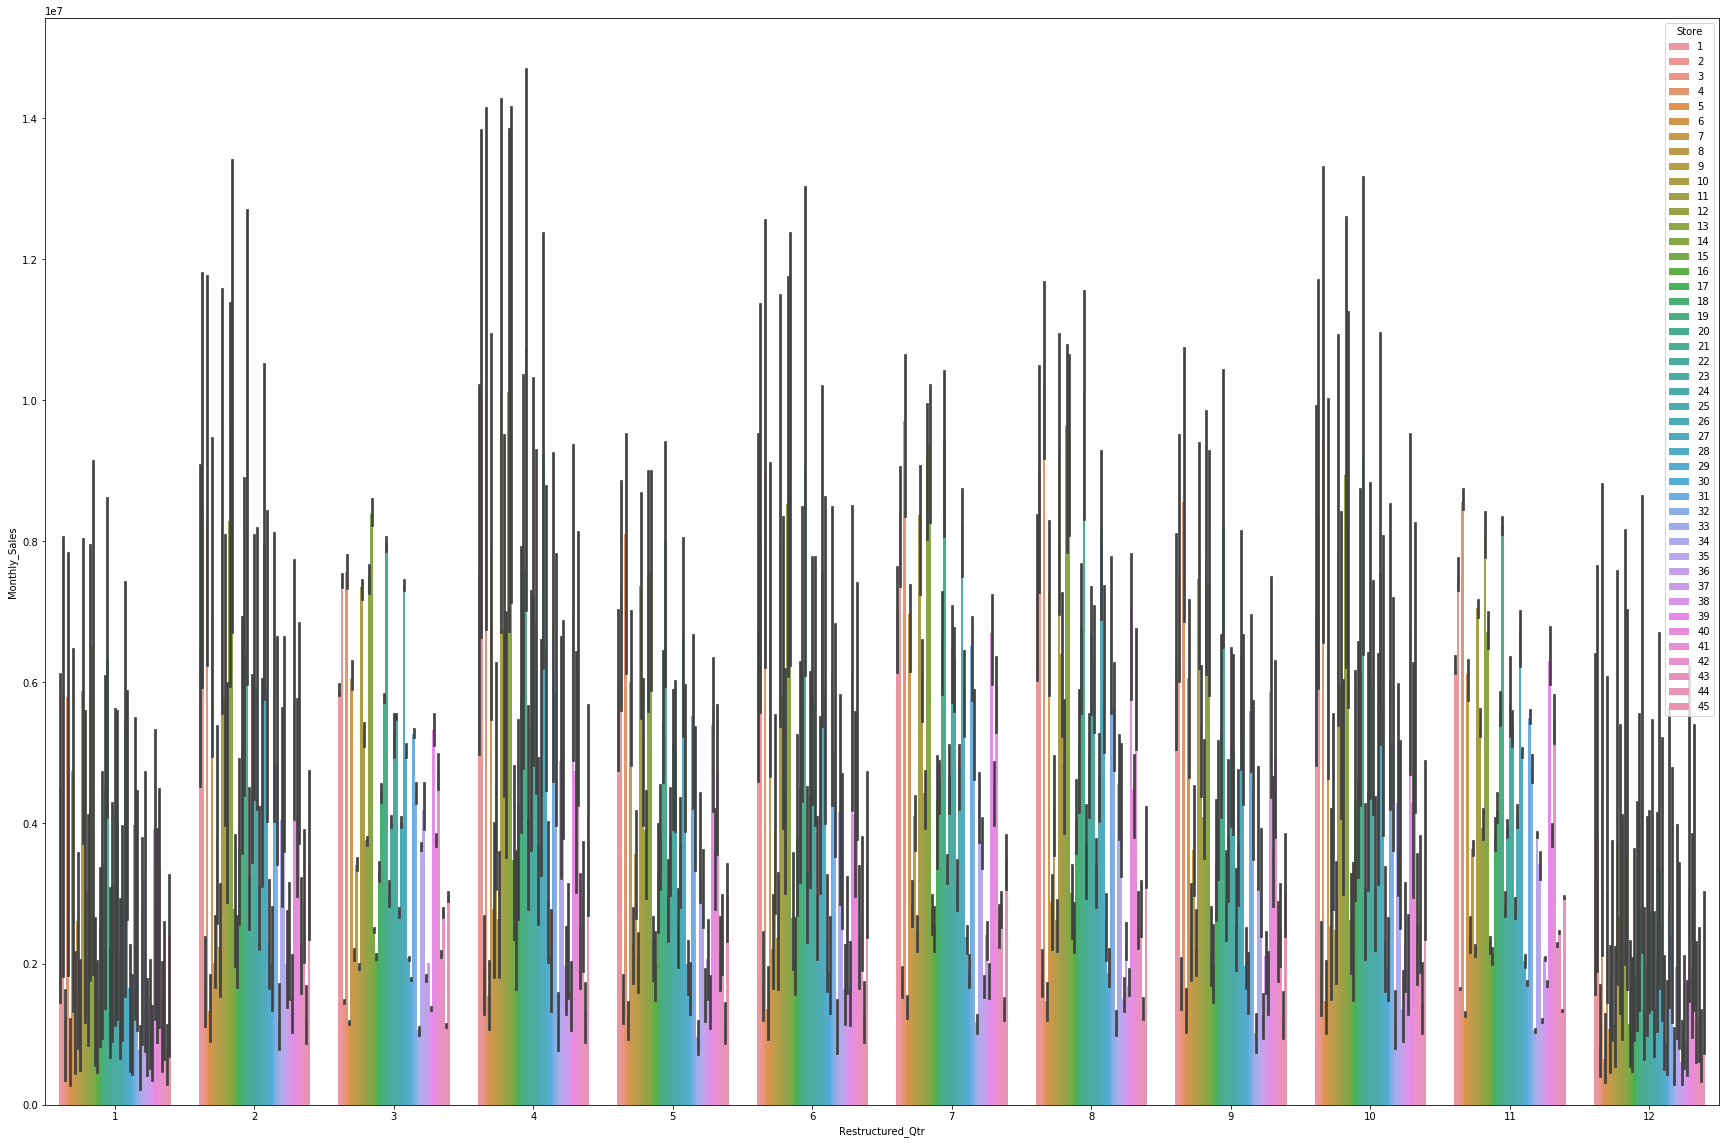

In [32]:
plt.figure(figsize=(30,20))
sns.barplot(x='Restructured_Qtr', y='Monthly_Sales', data=a, hue='Store')

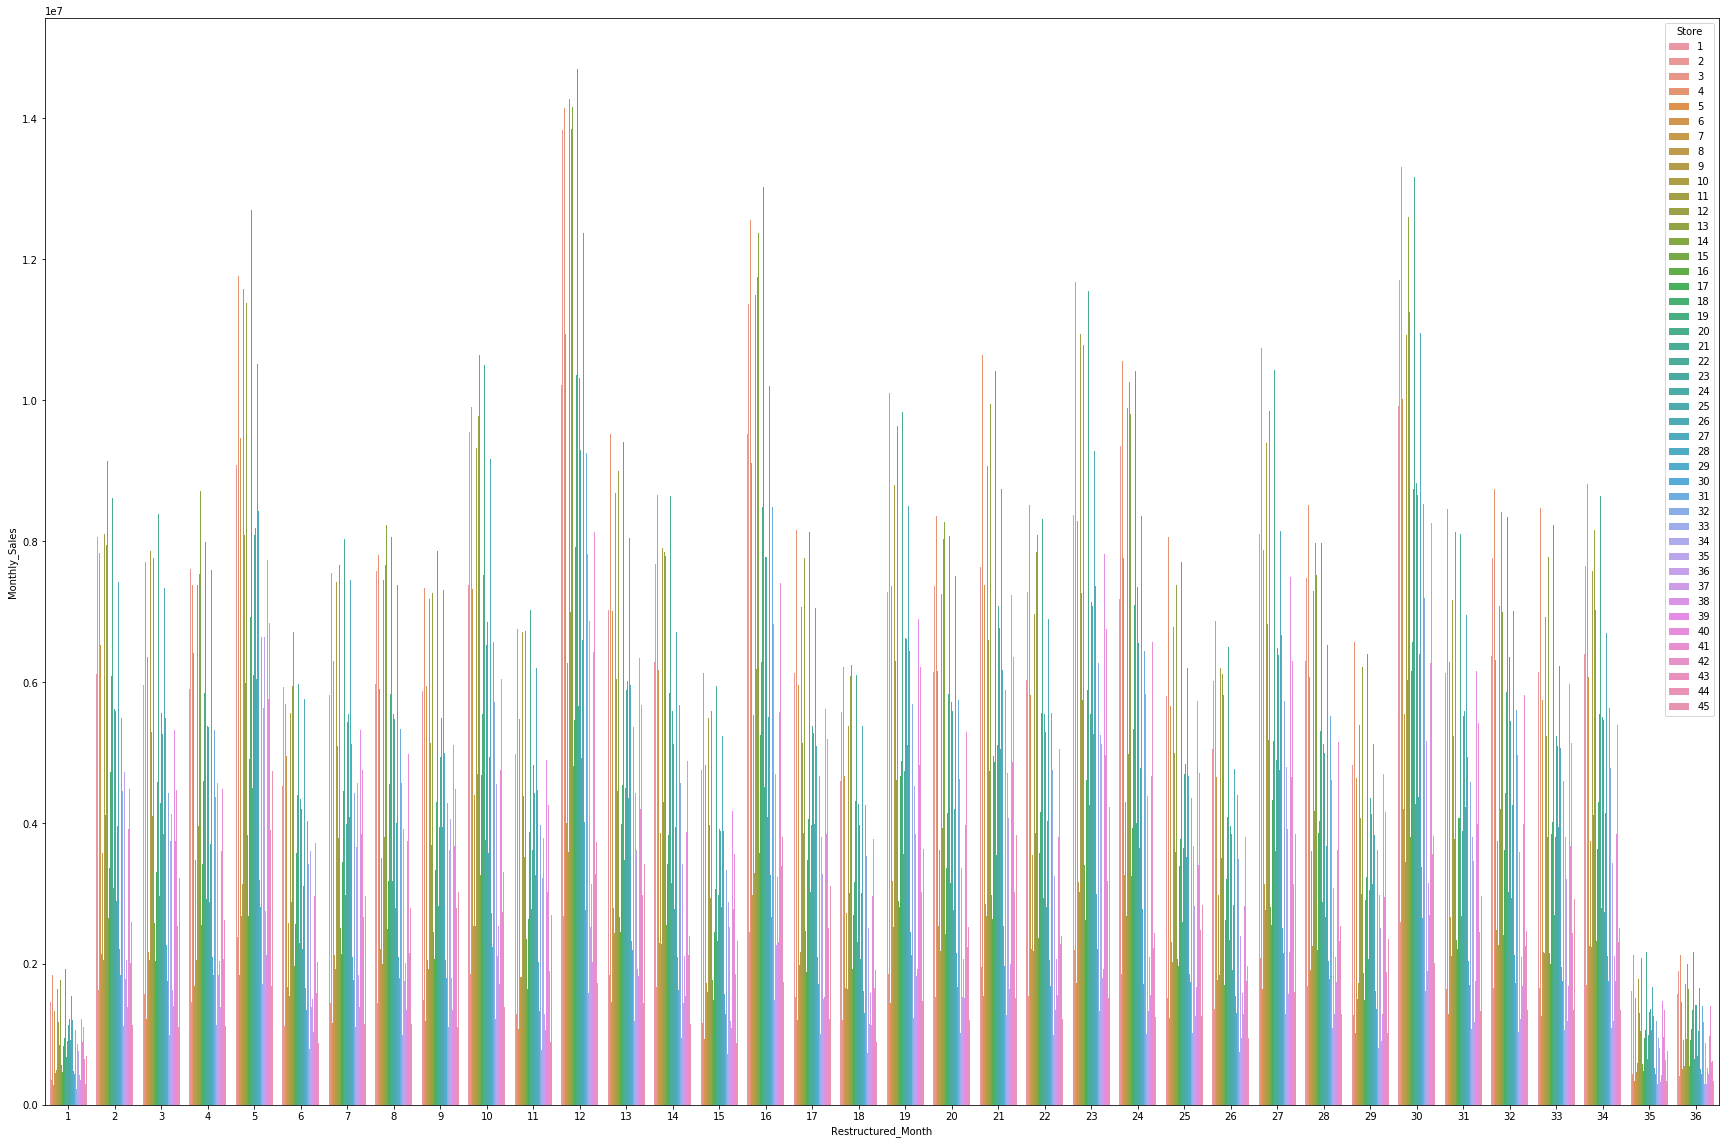

In [33]:
plt.figure(figsize=(30,20))
sns.barplot(x='Restructured_Month', y='Monthly_Sales', data=a, hue='Store')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\cheta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


AxesSubplot(0.125,0.125;0.775x0.755)


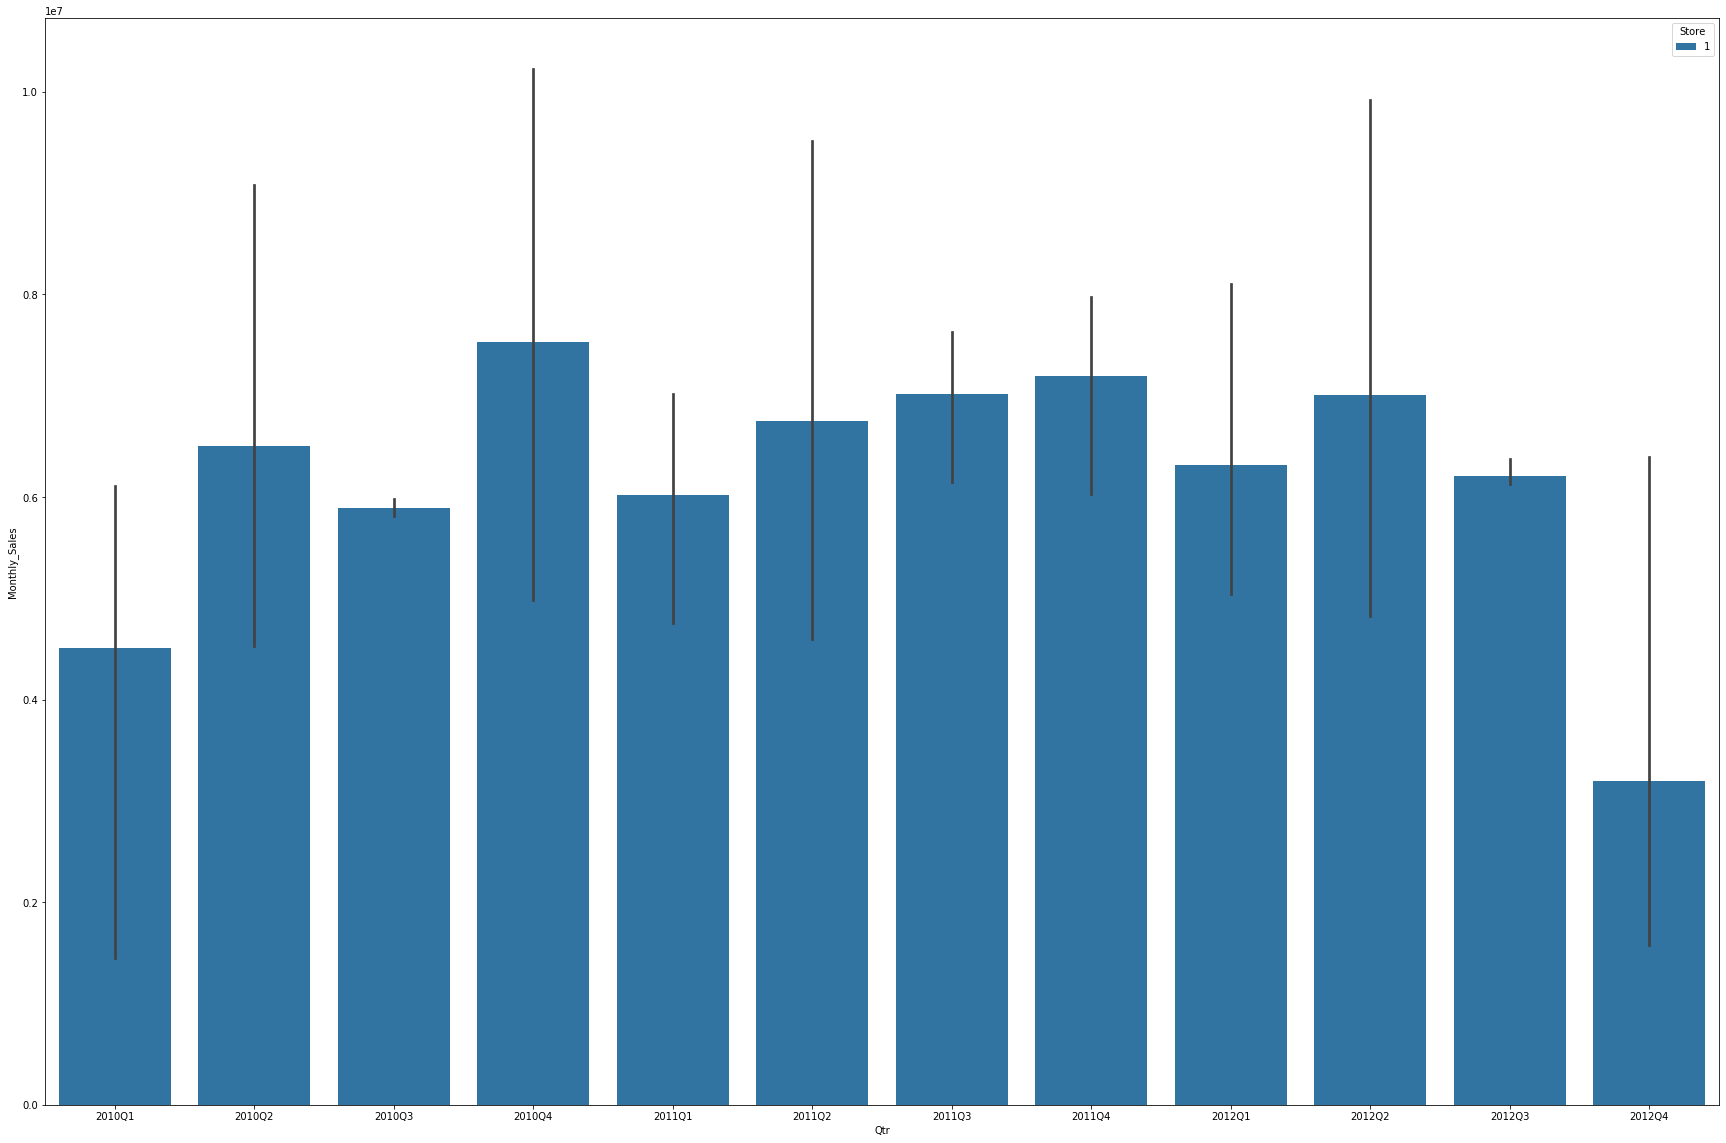

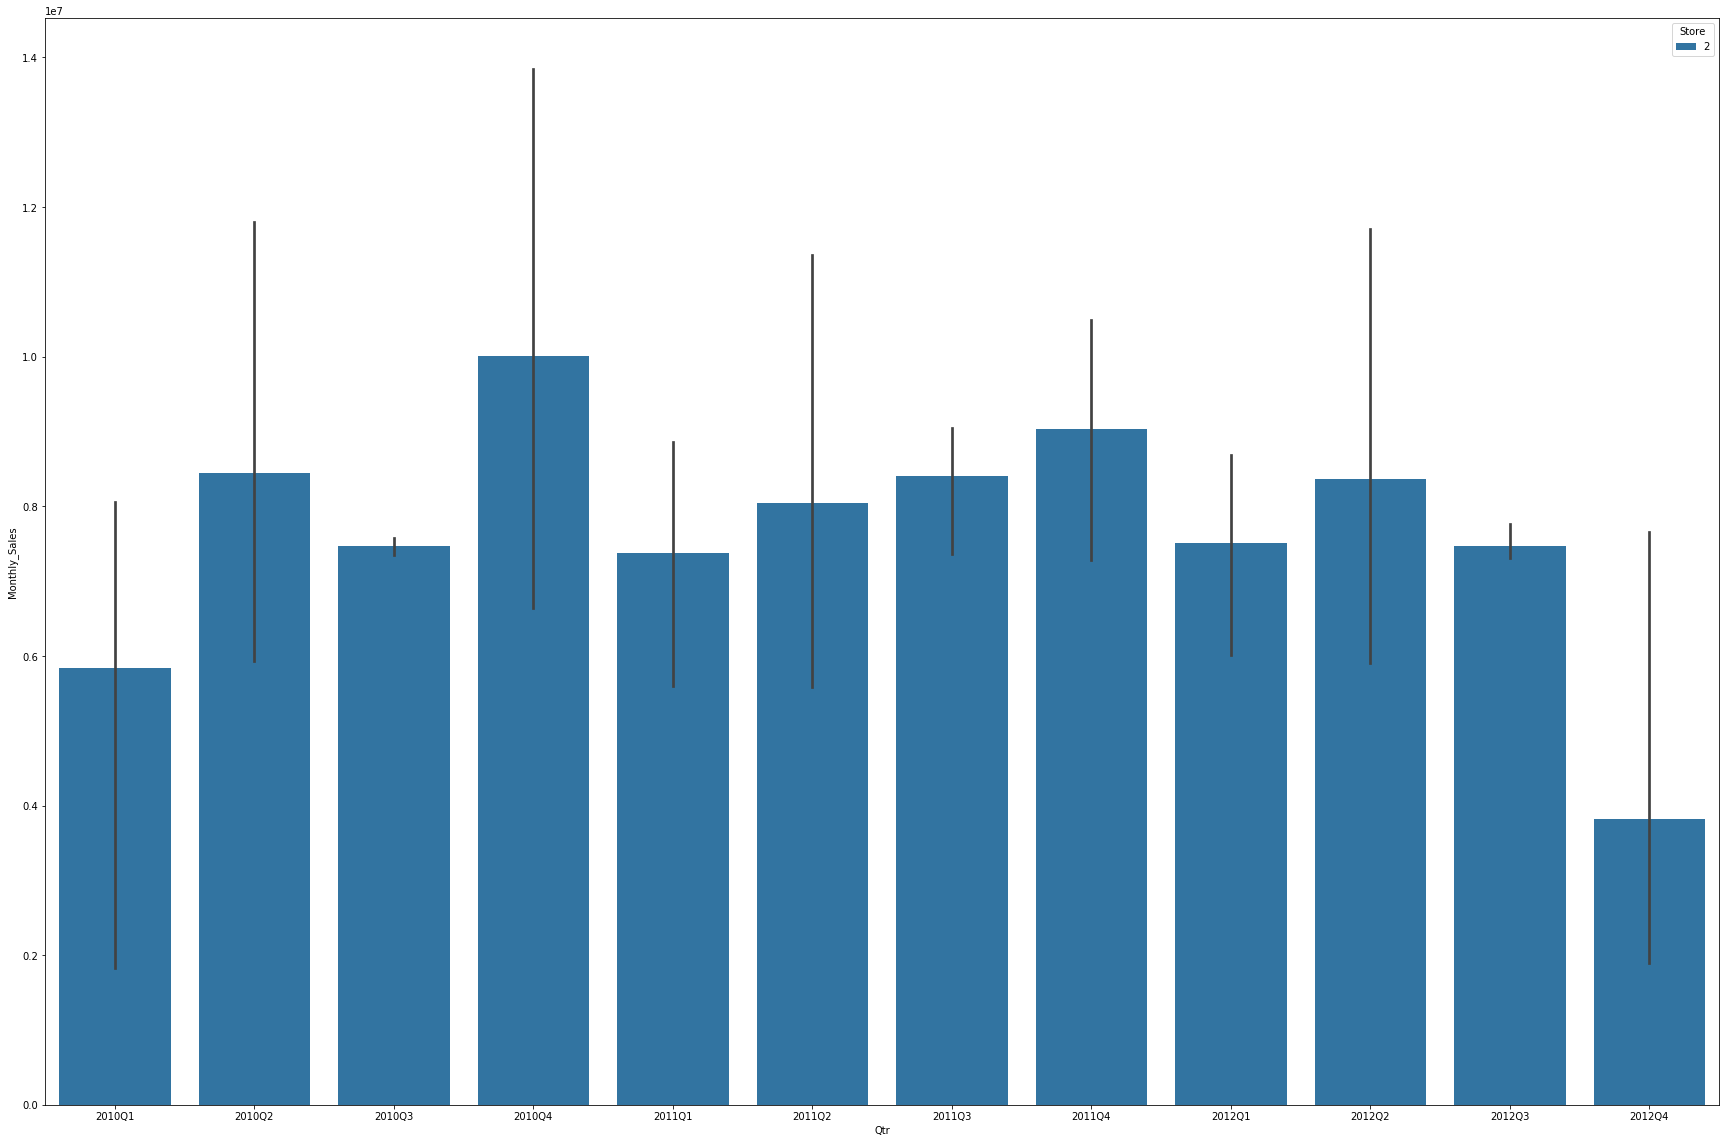

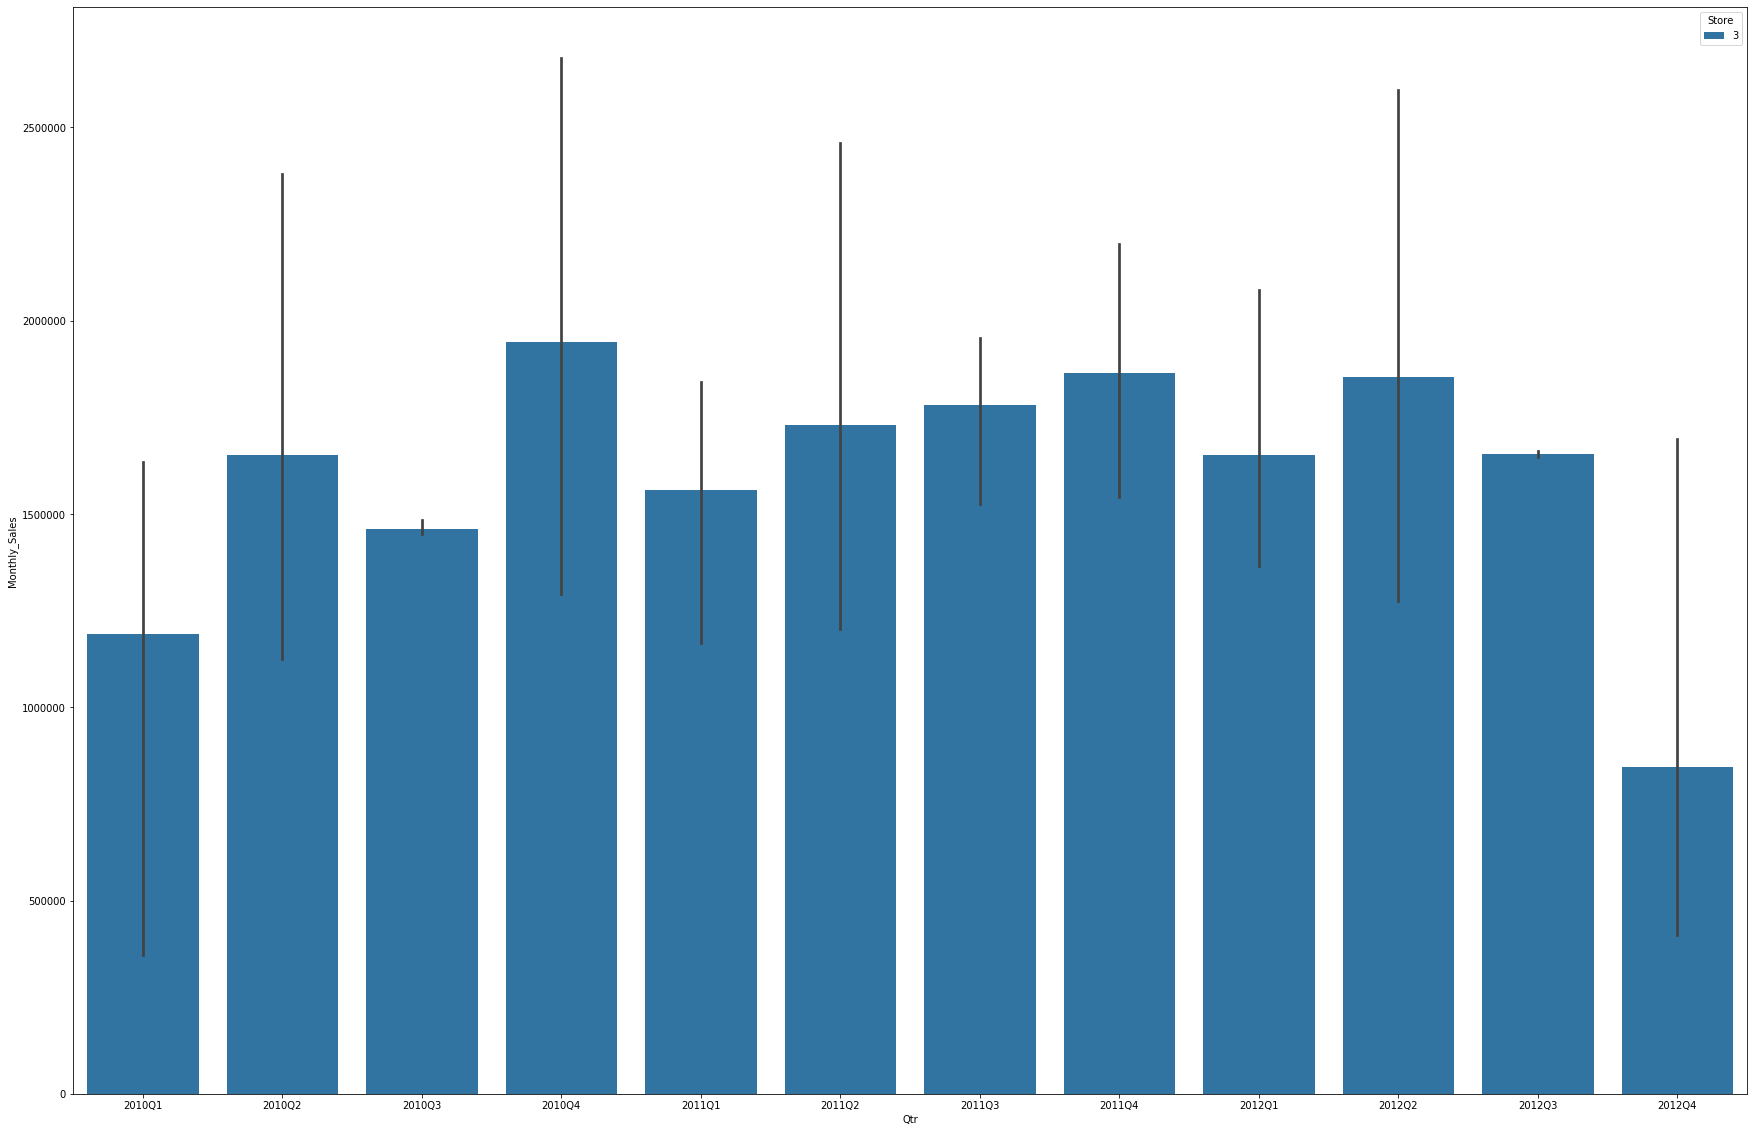

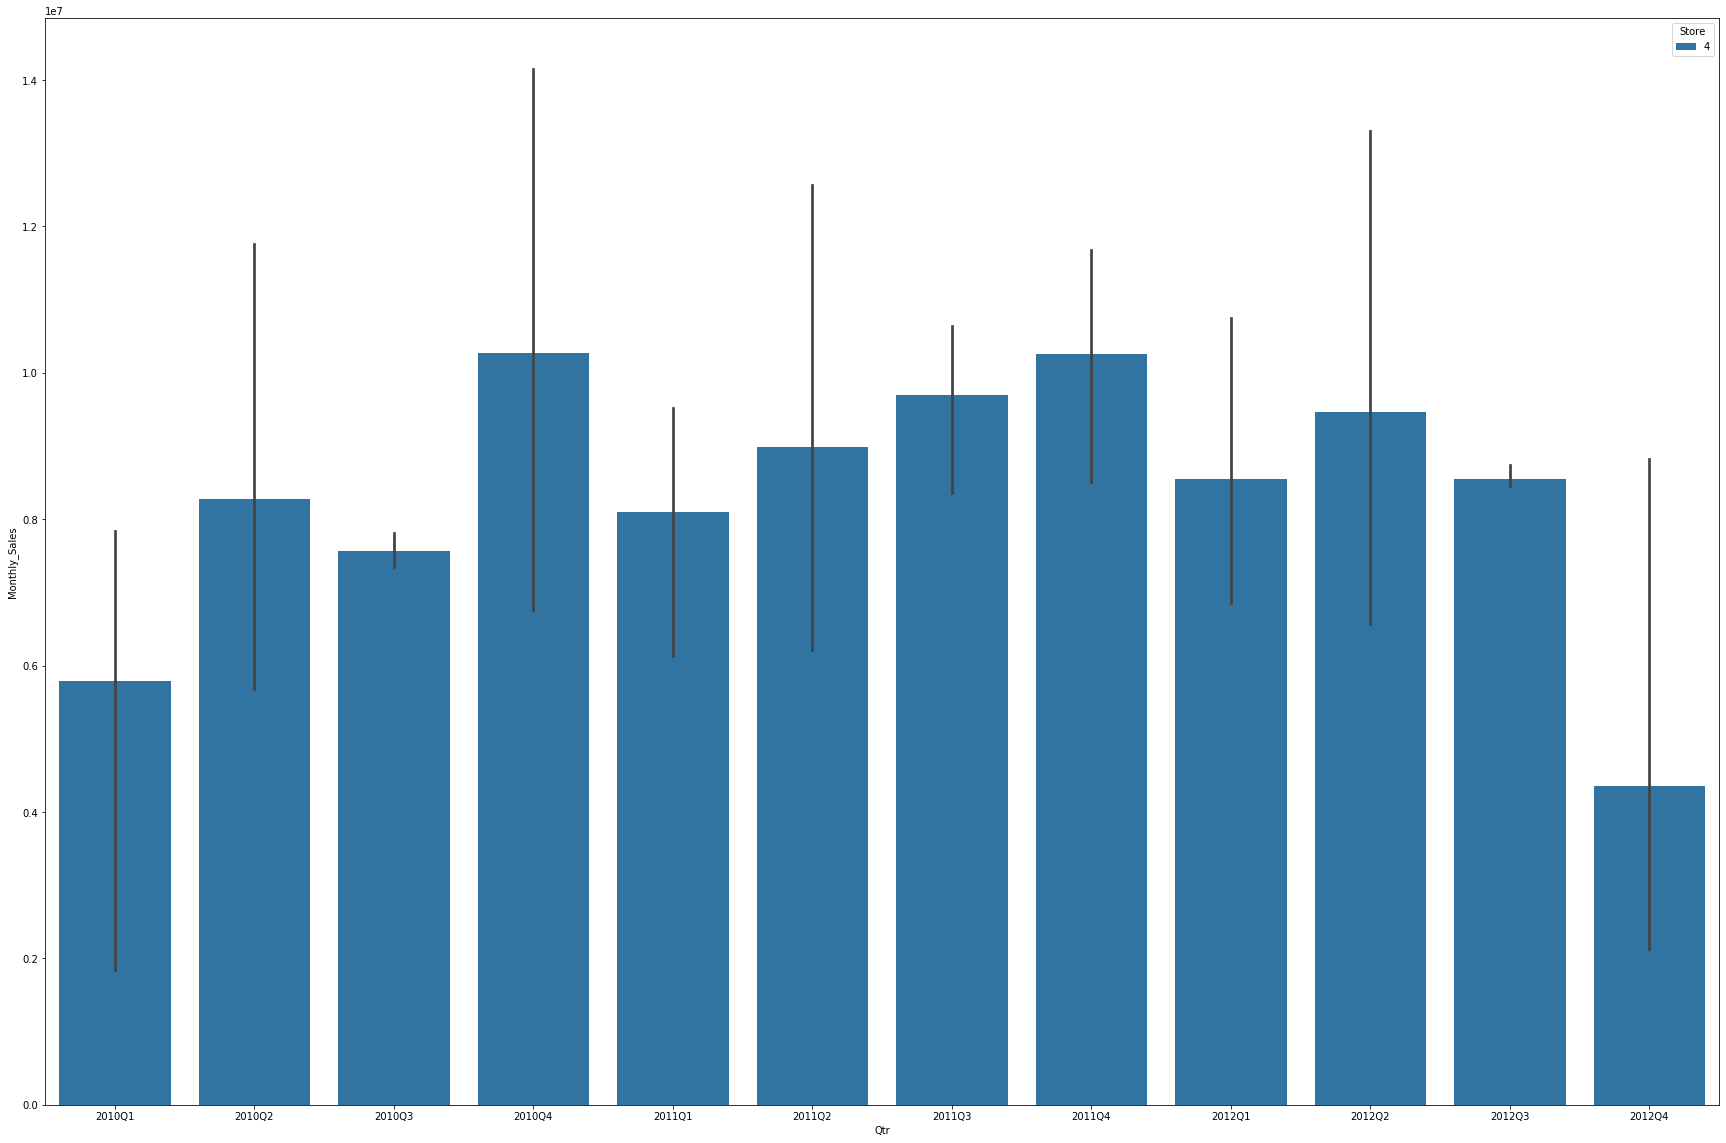

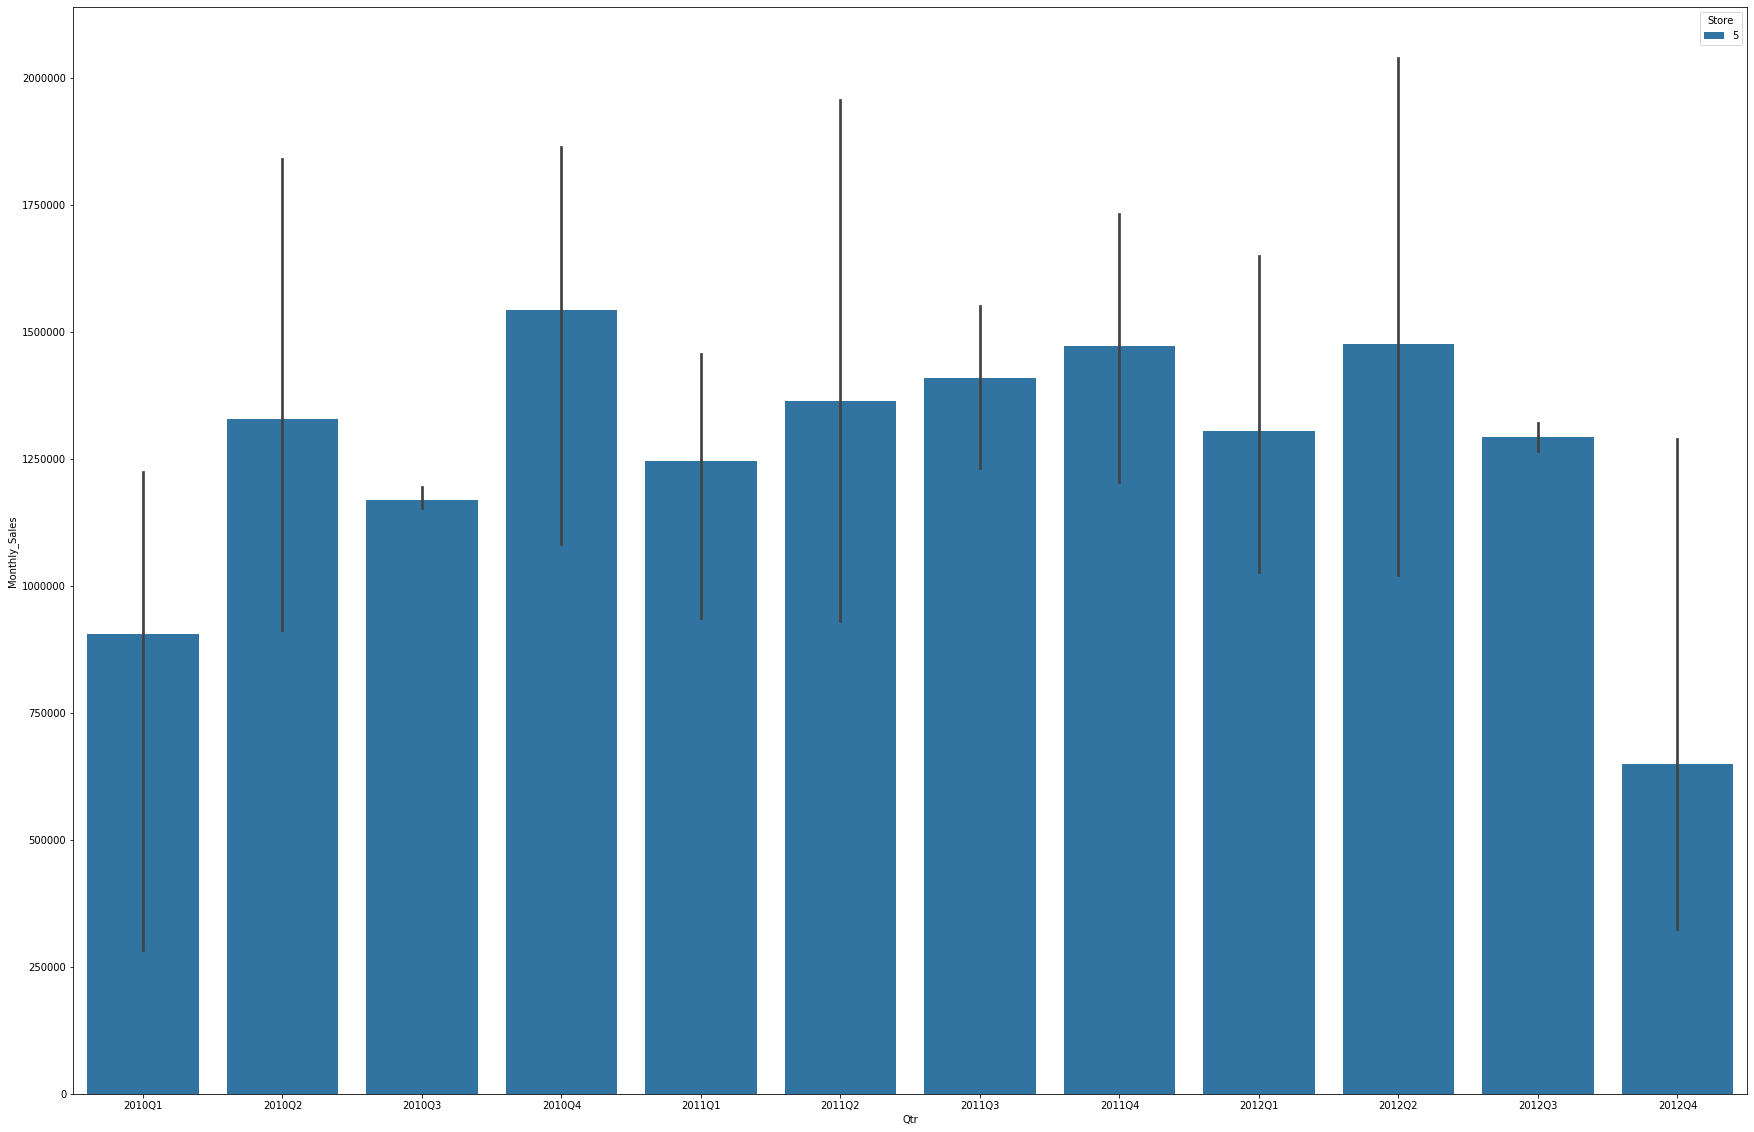

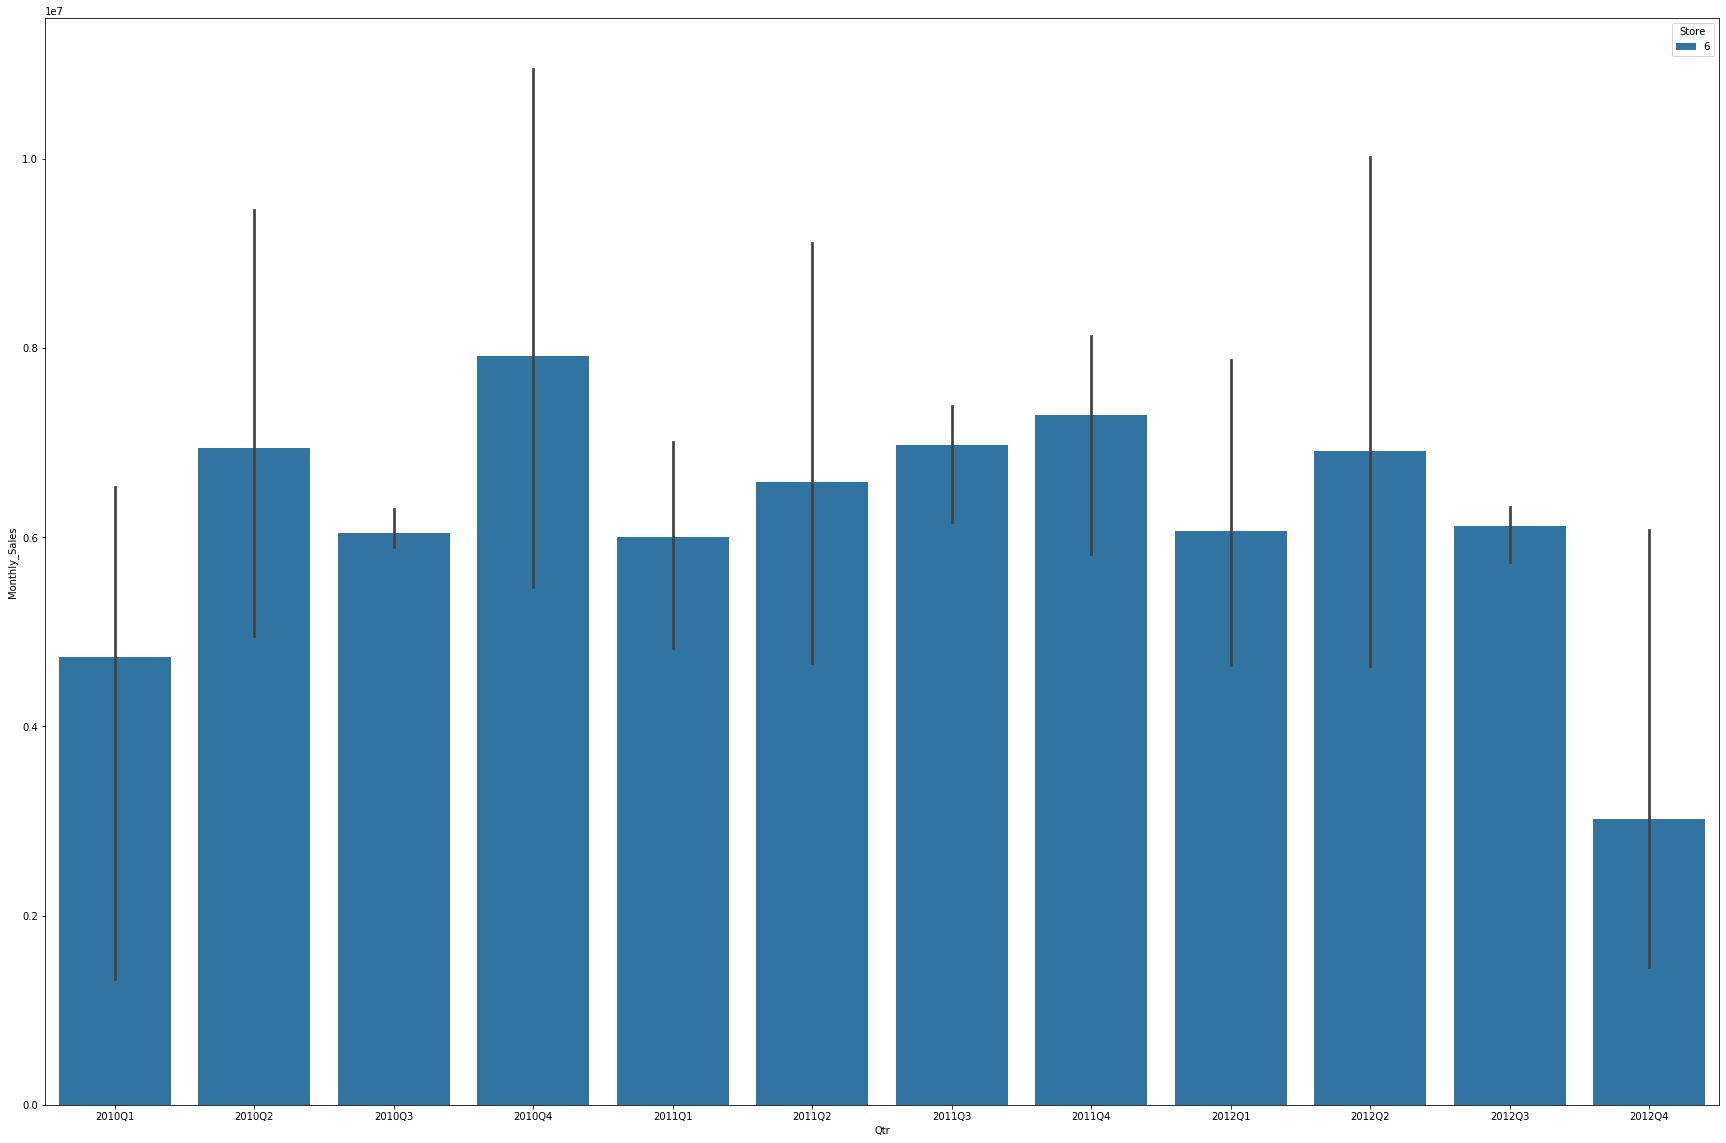

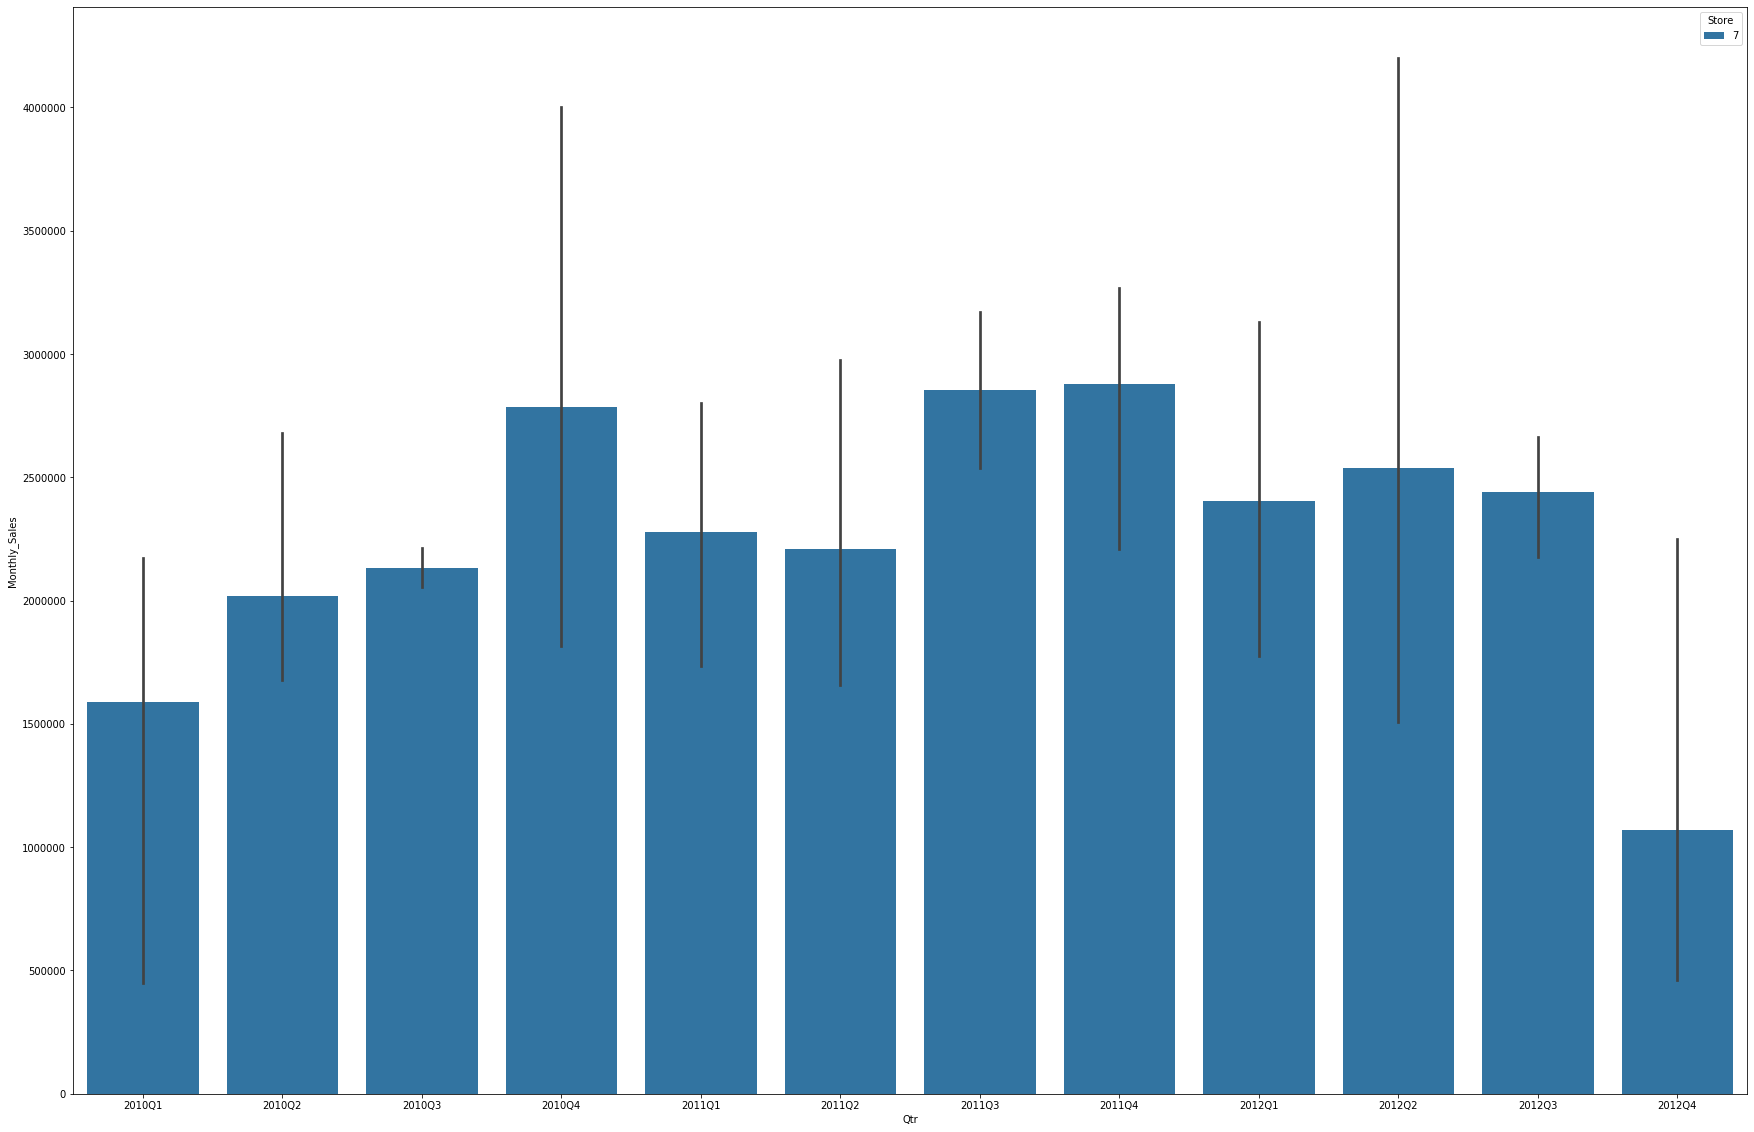

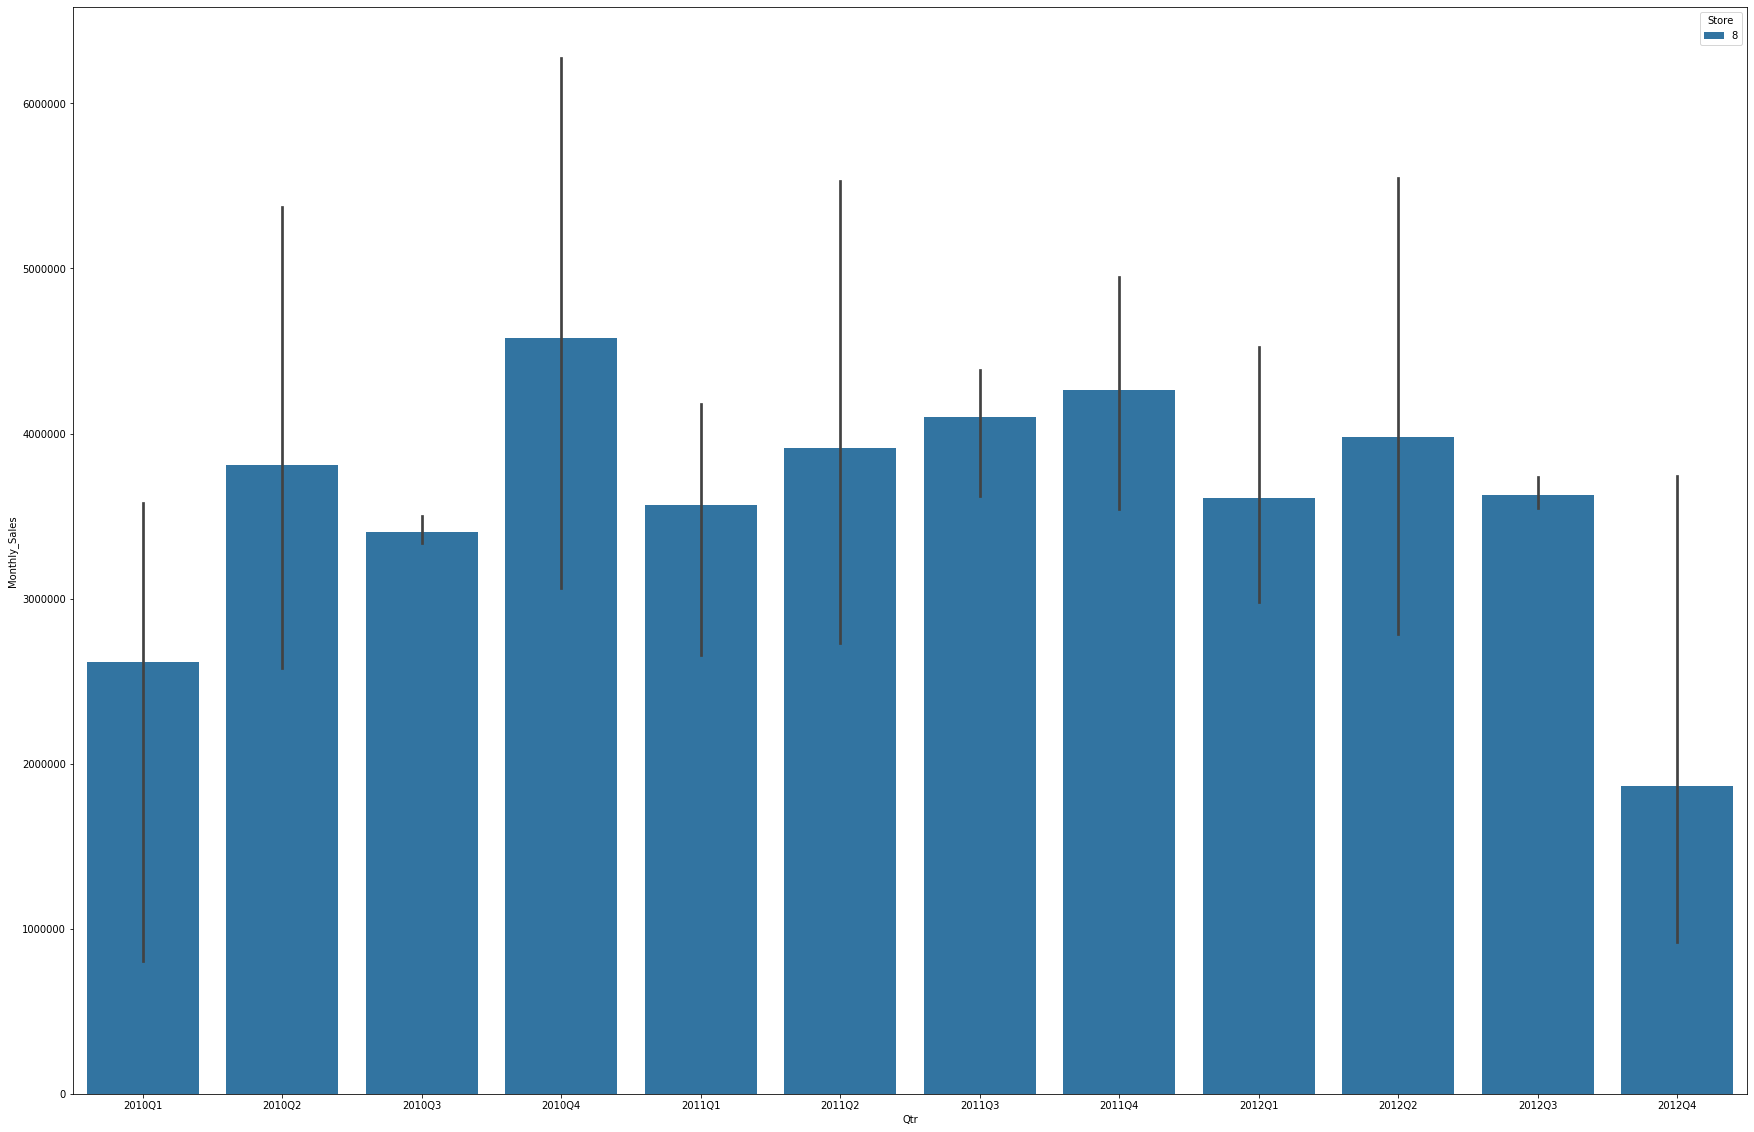

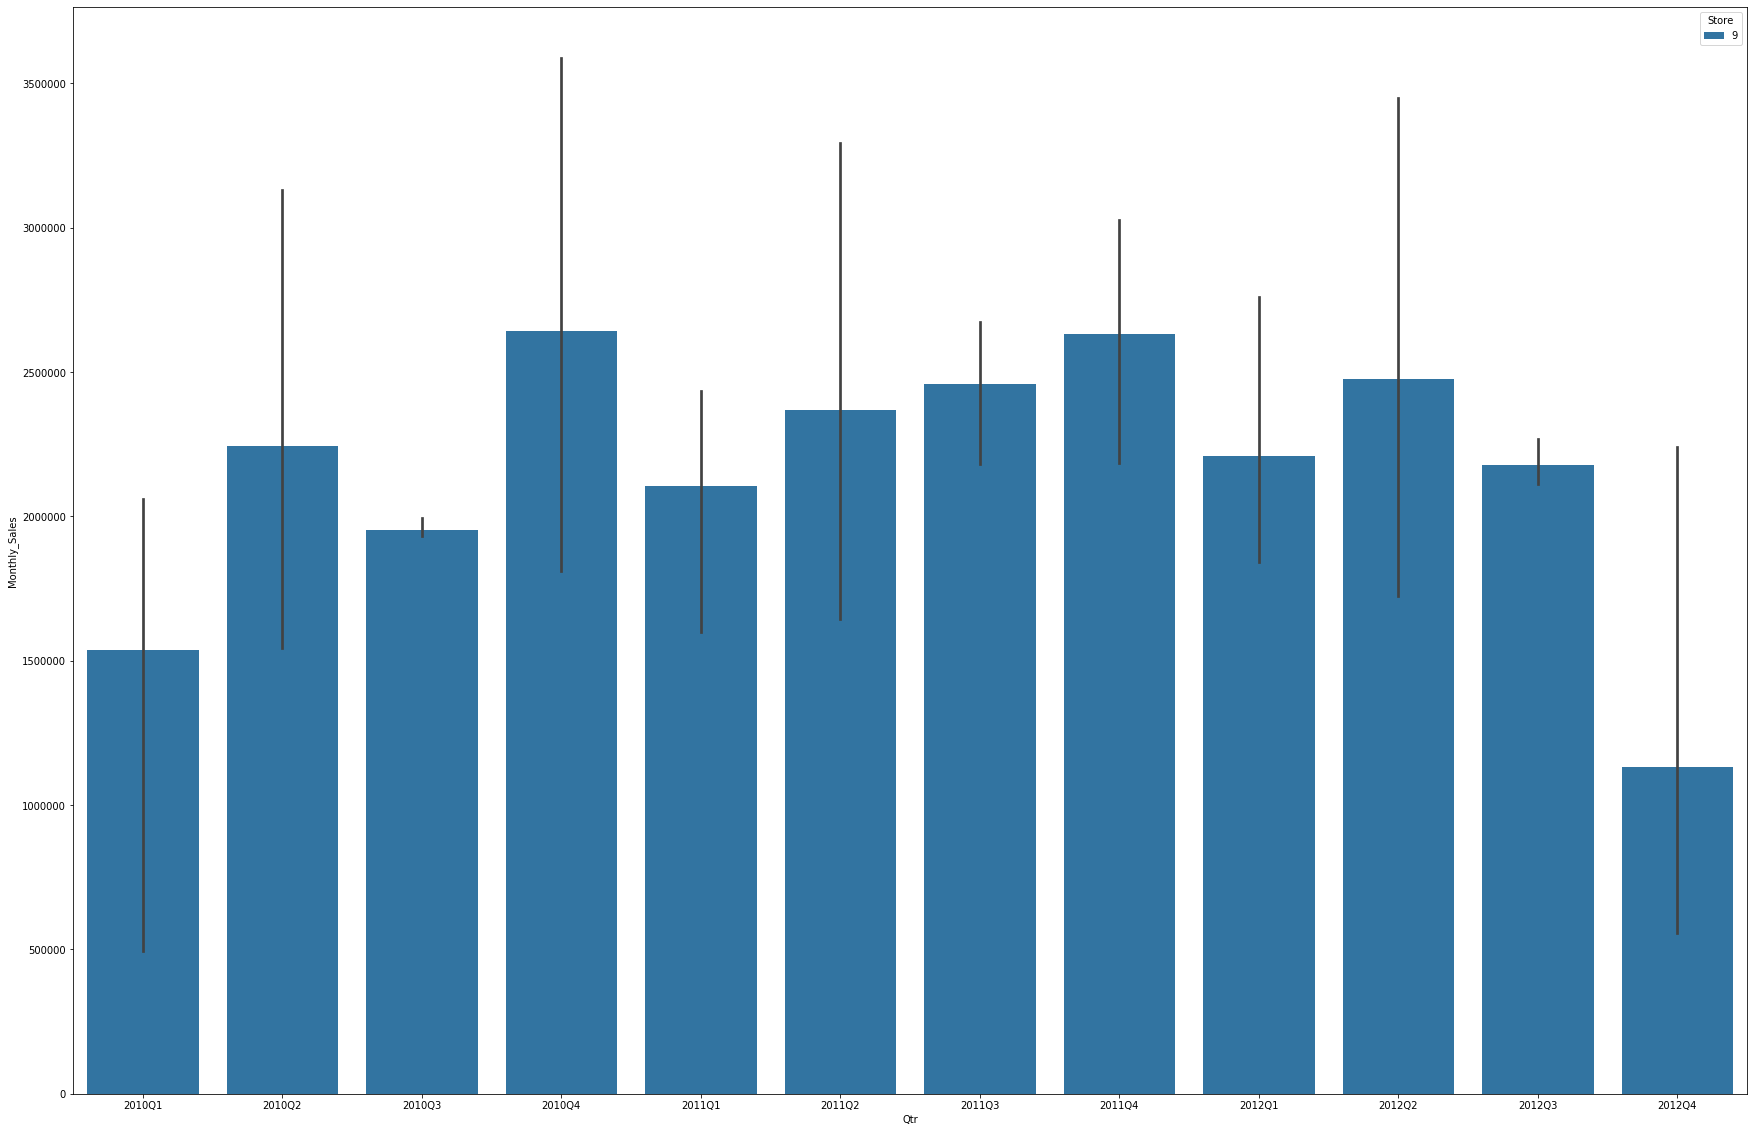

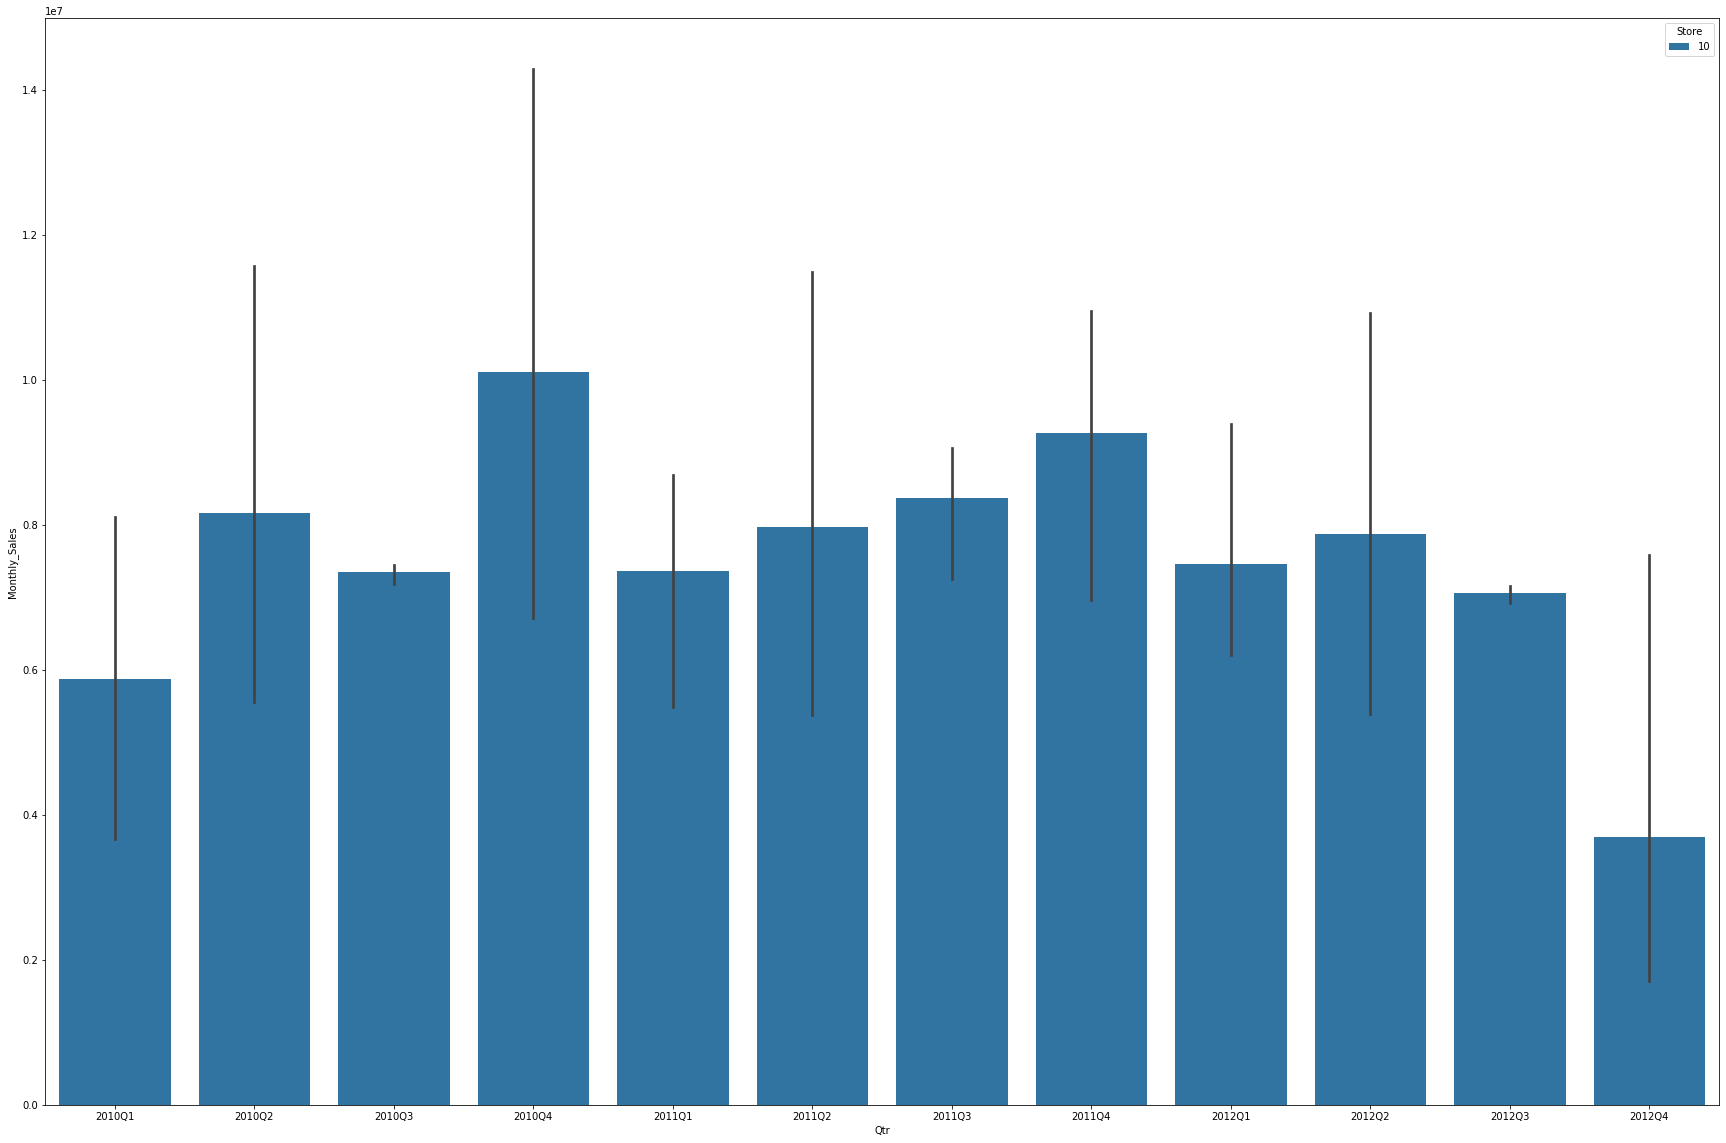

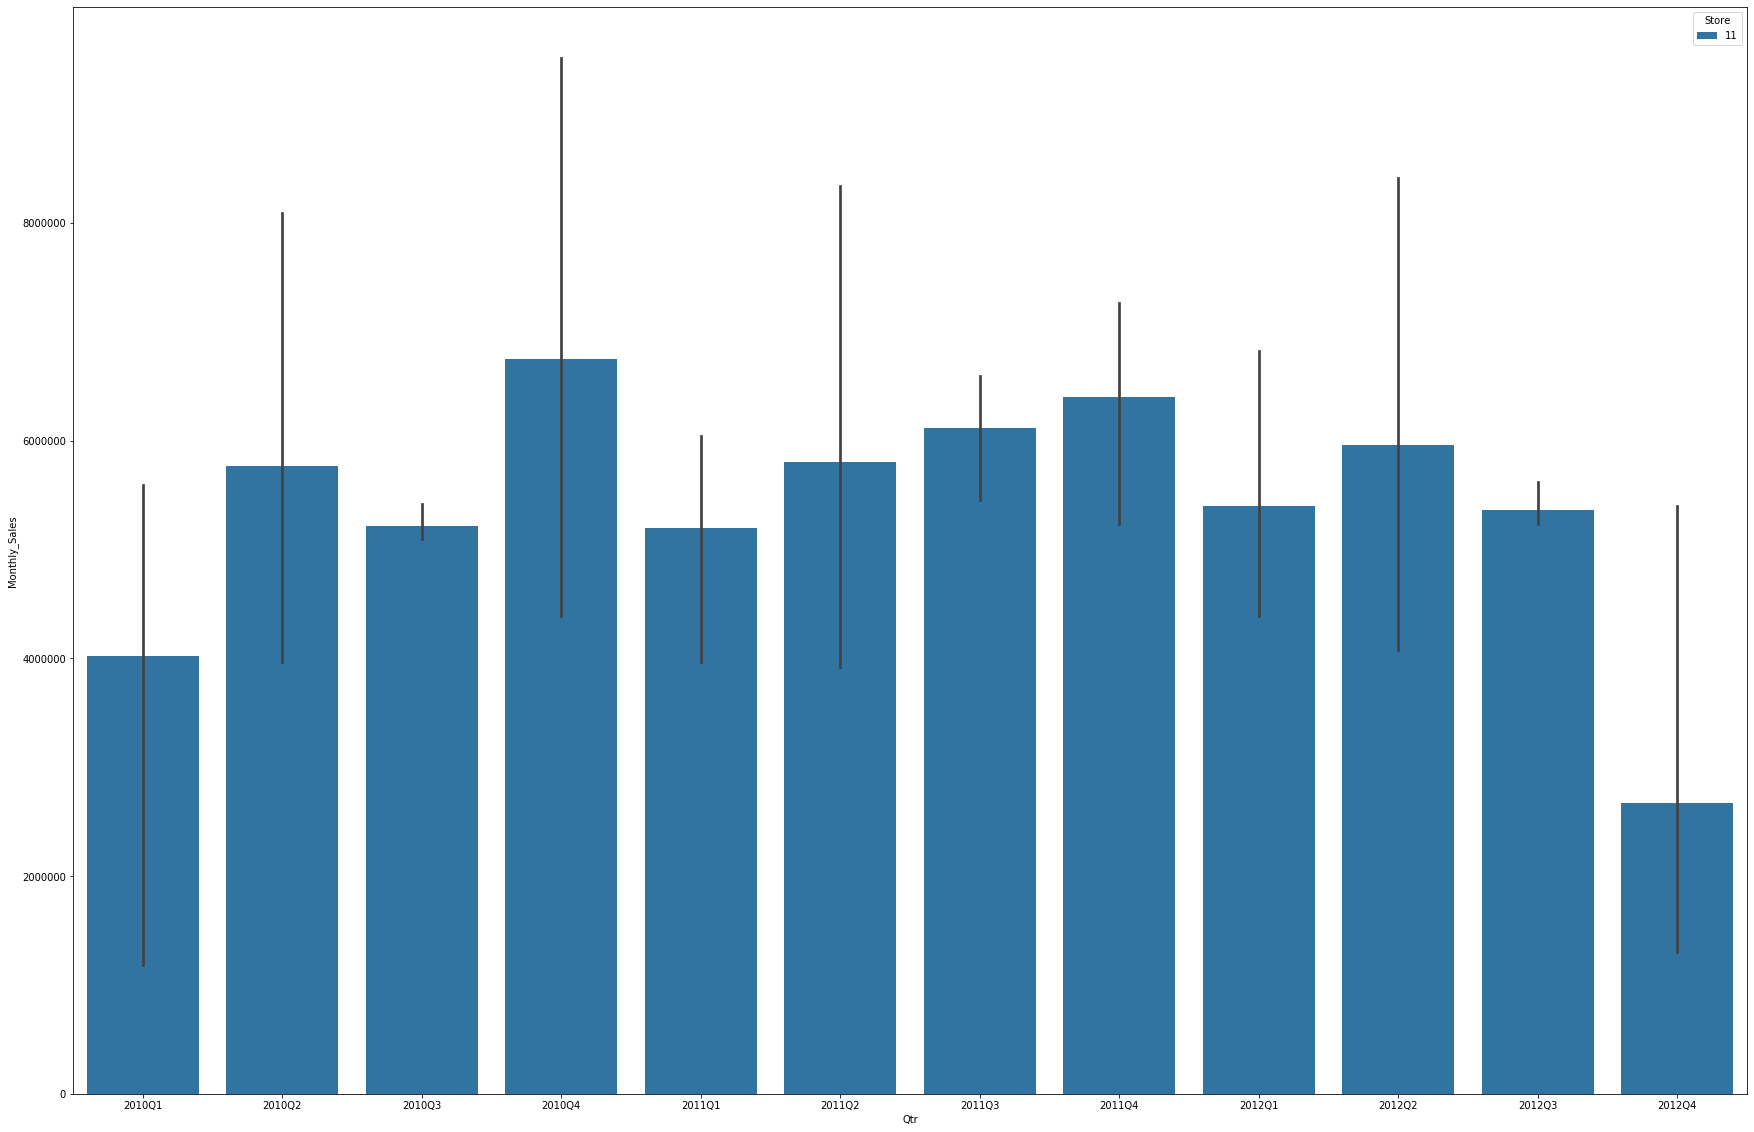

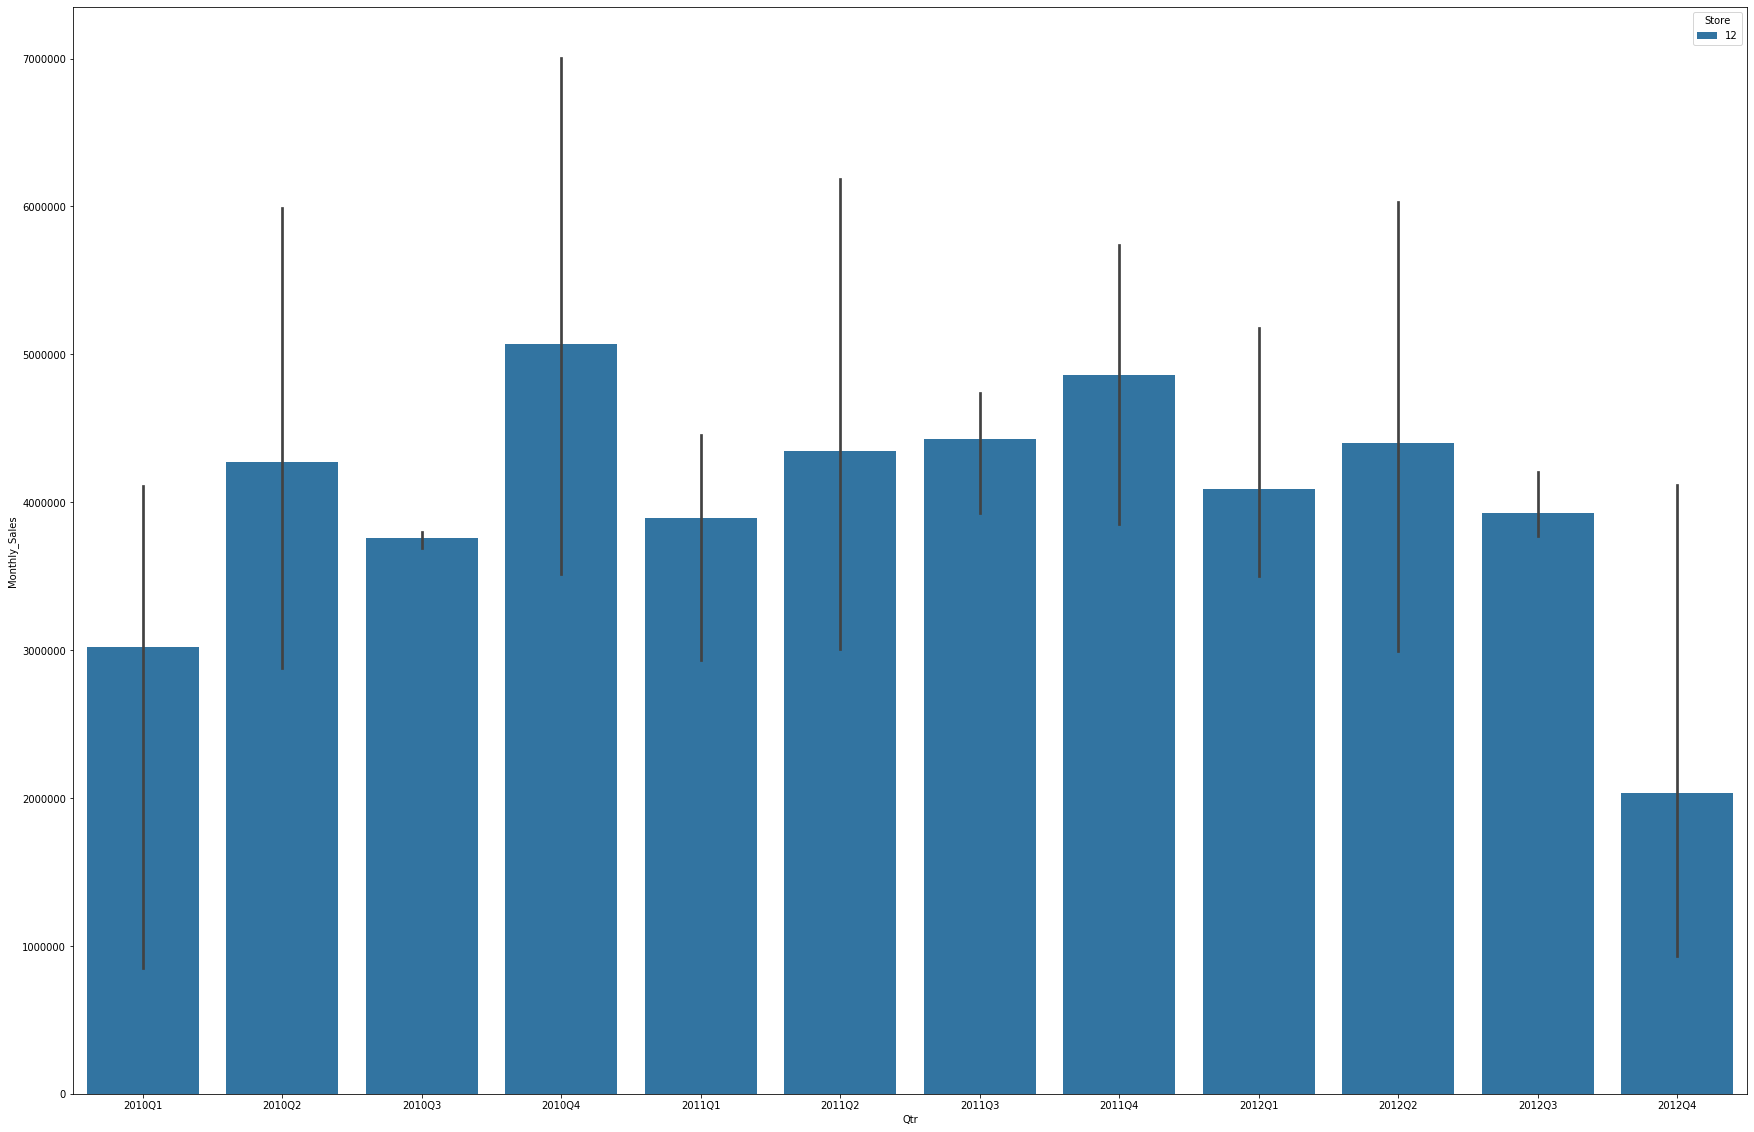

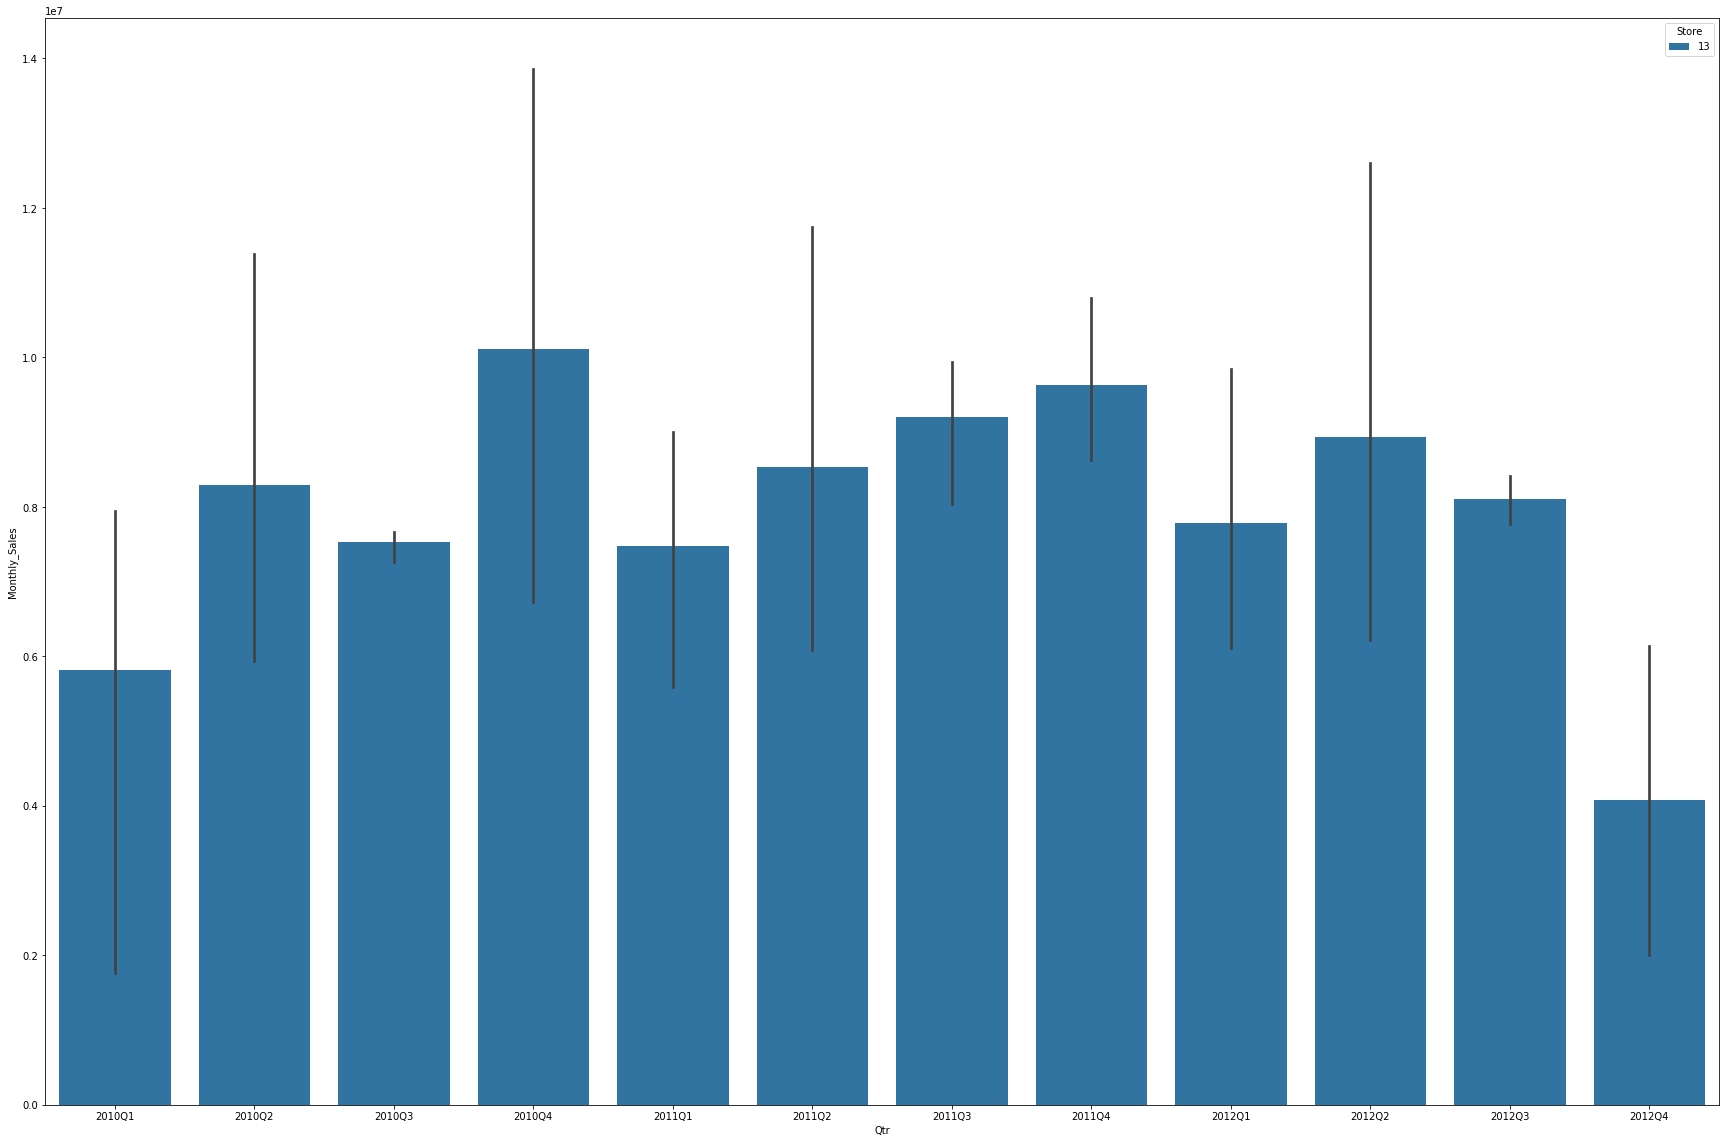

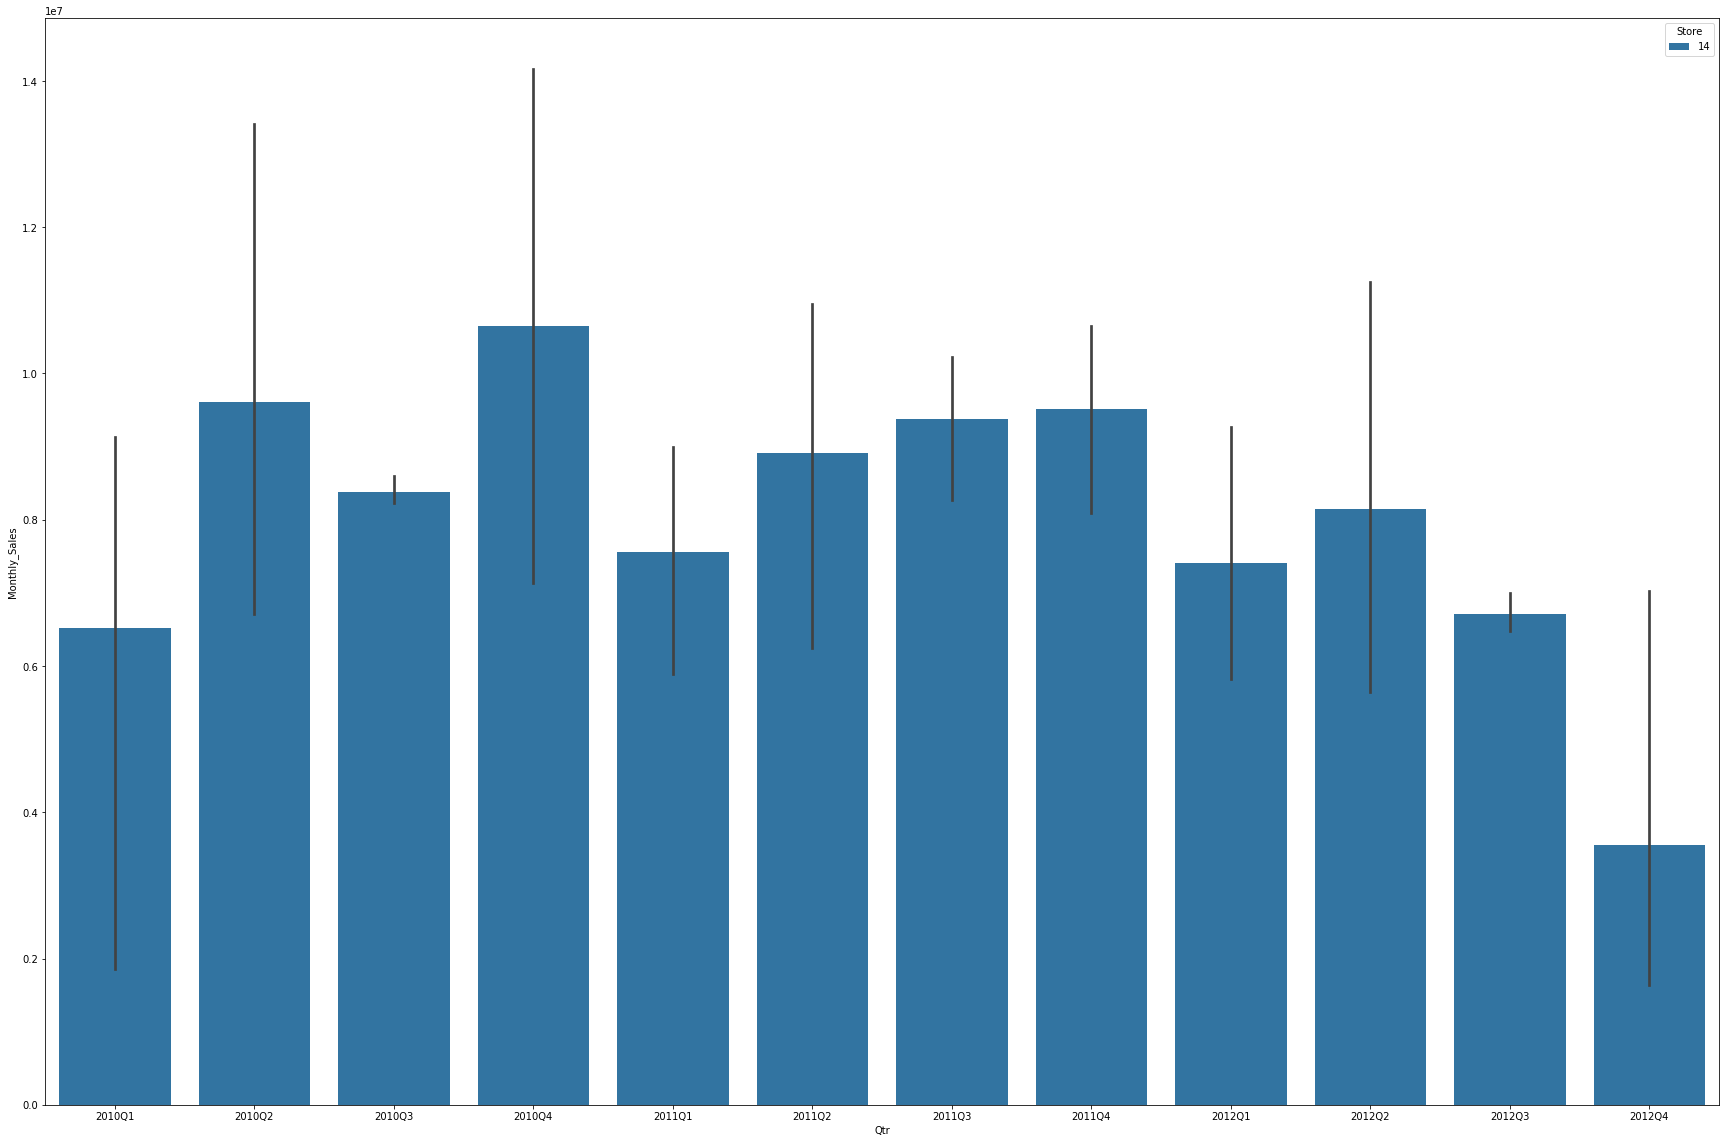

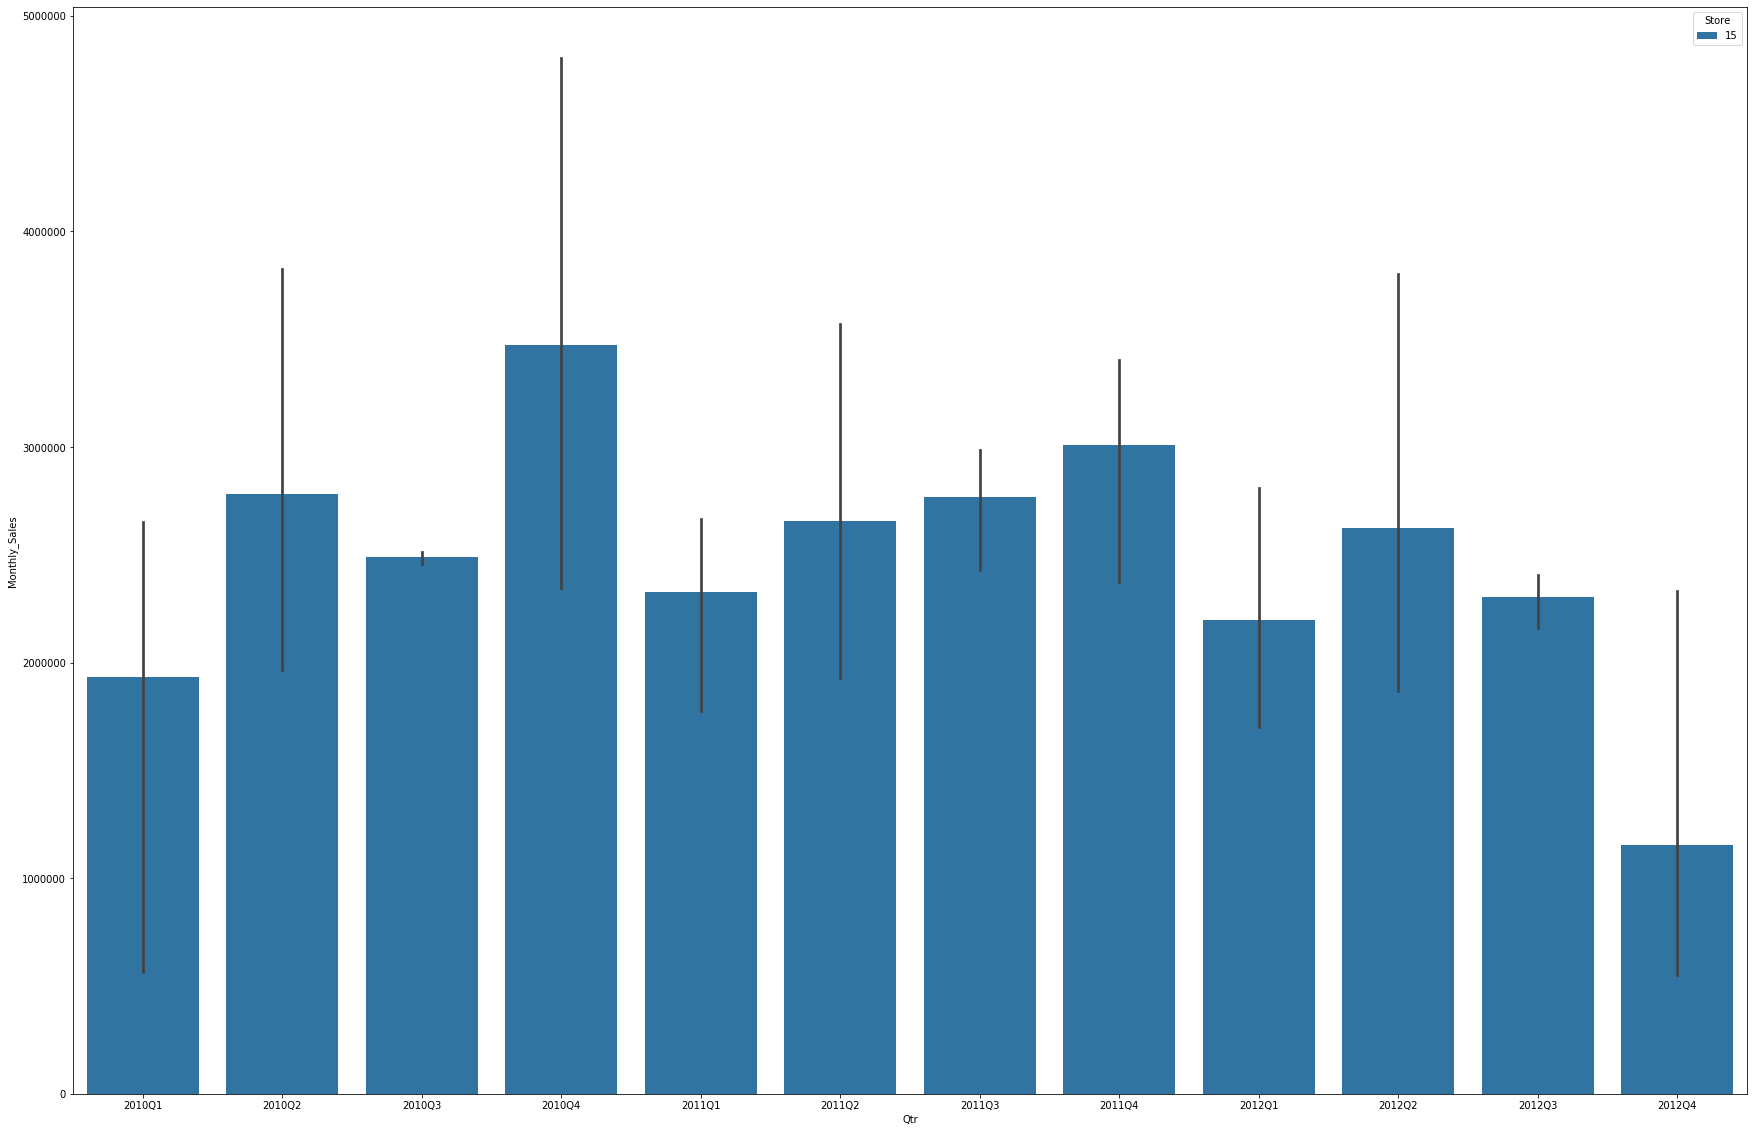

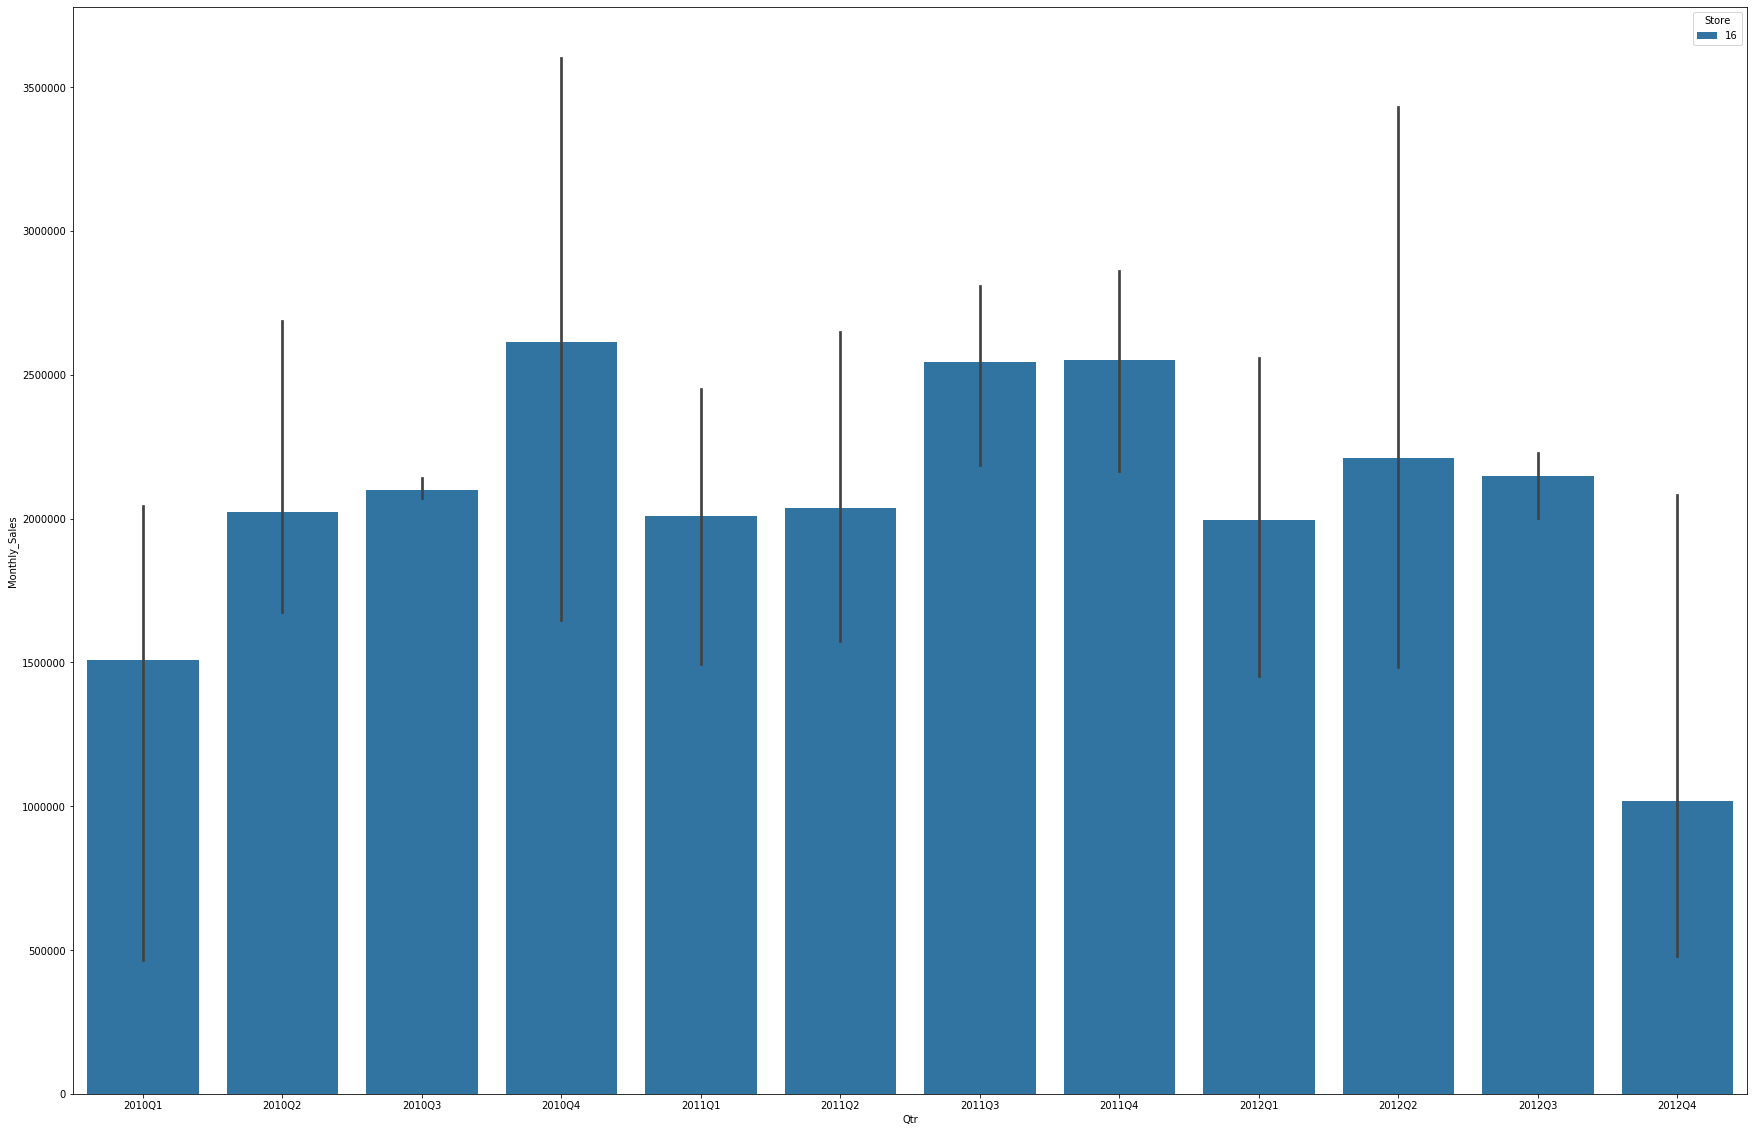

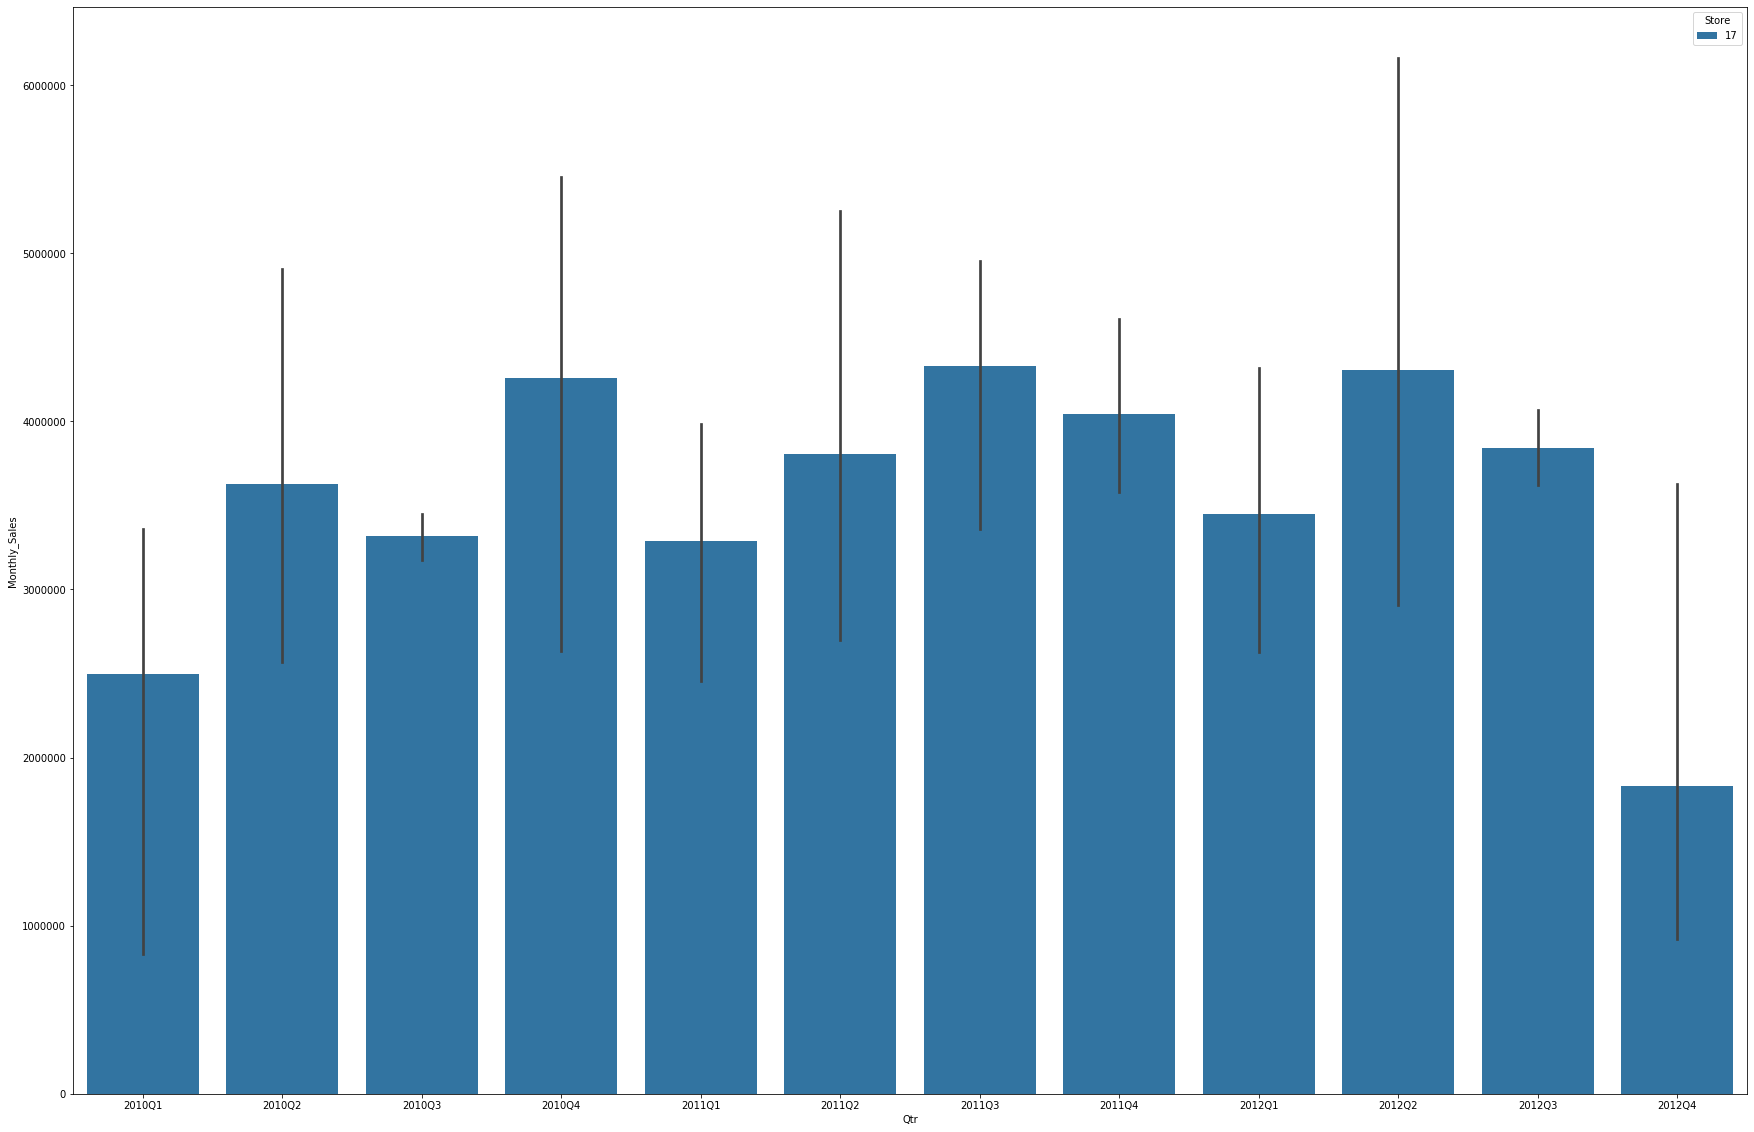

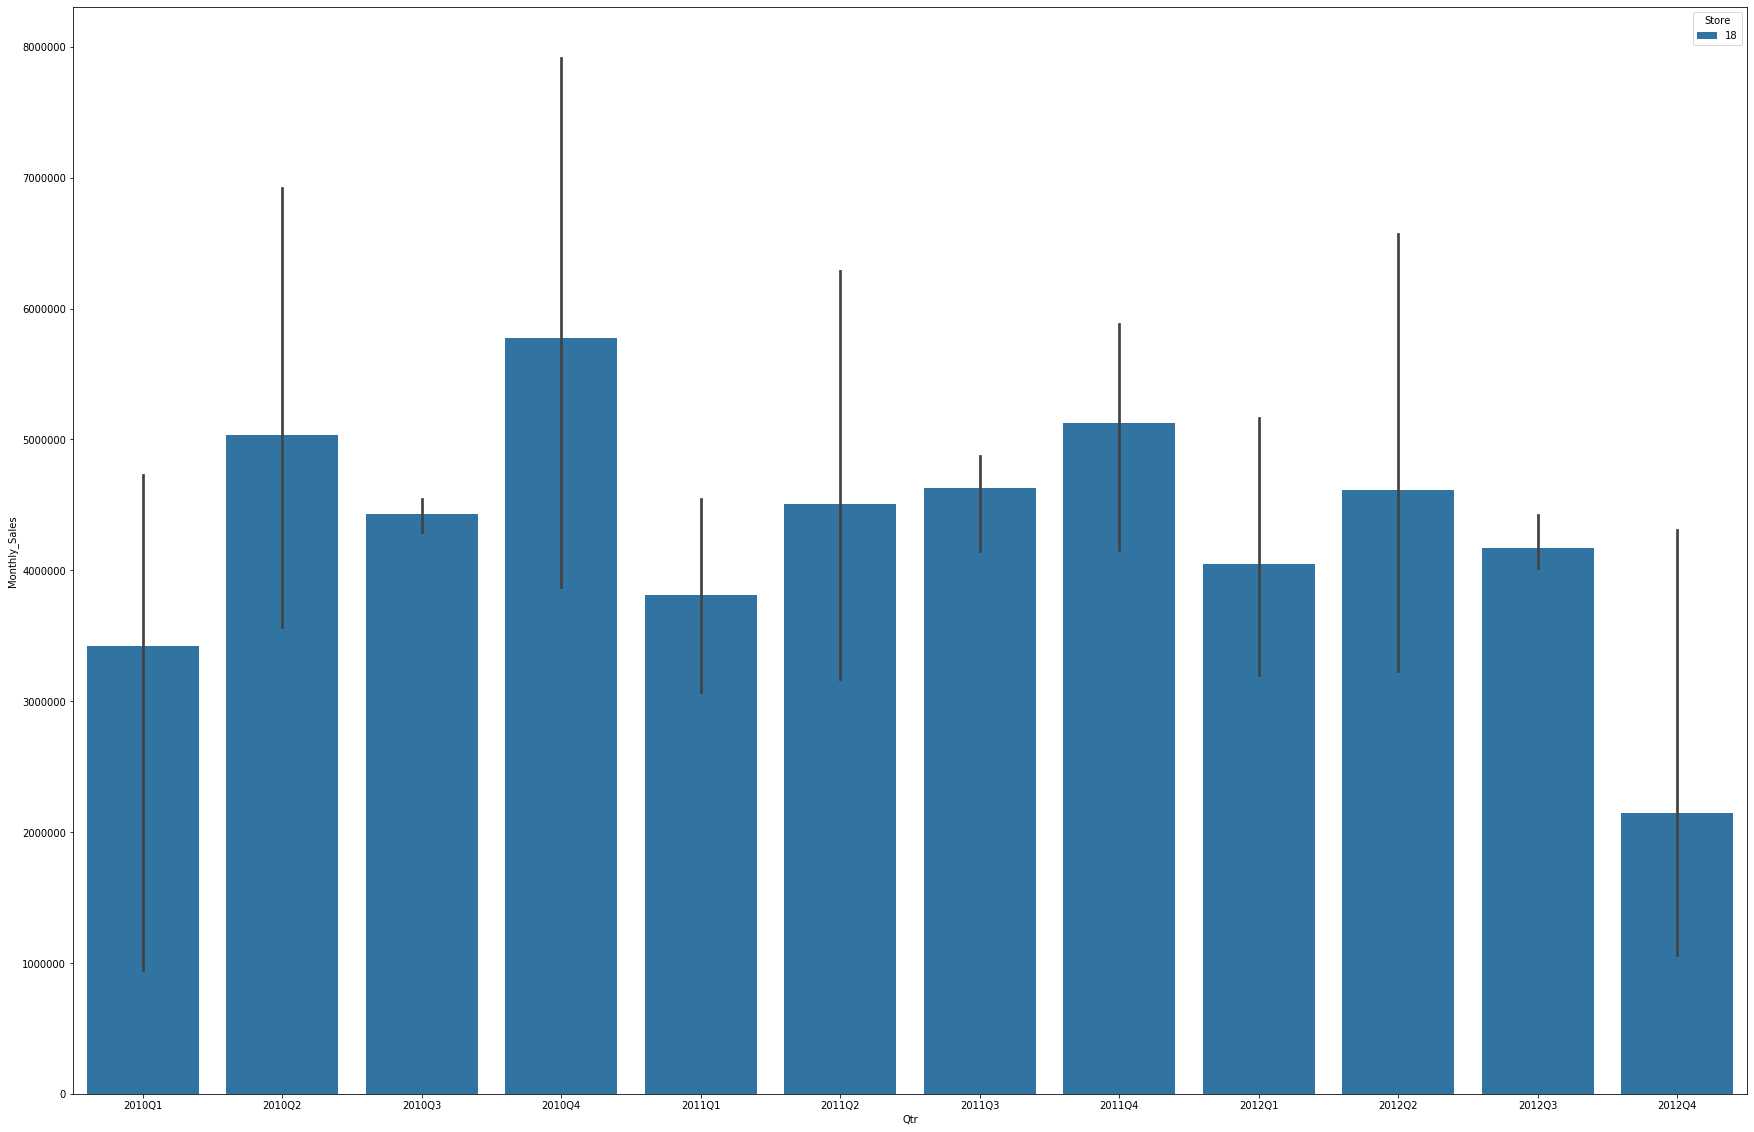

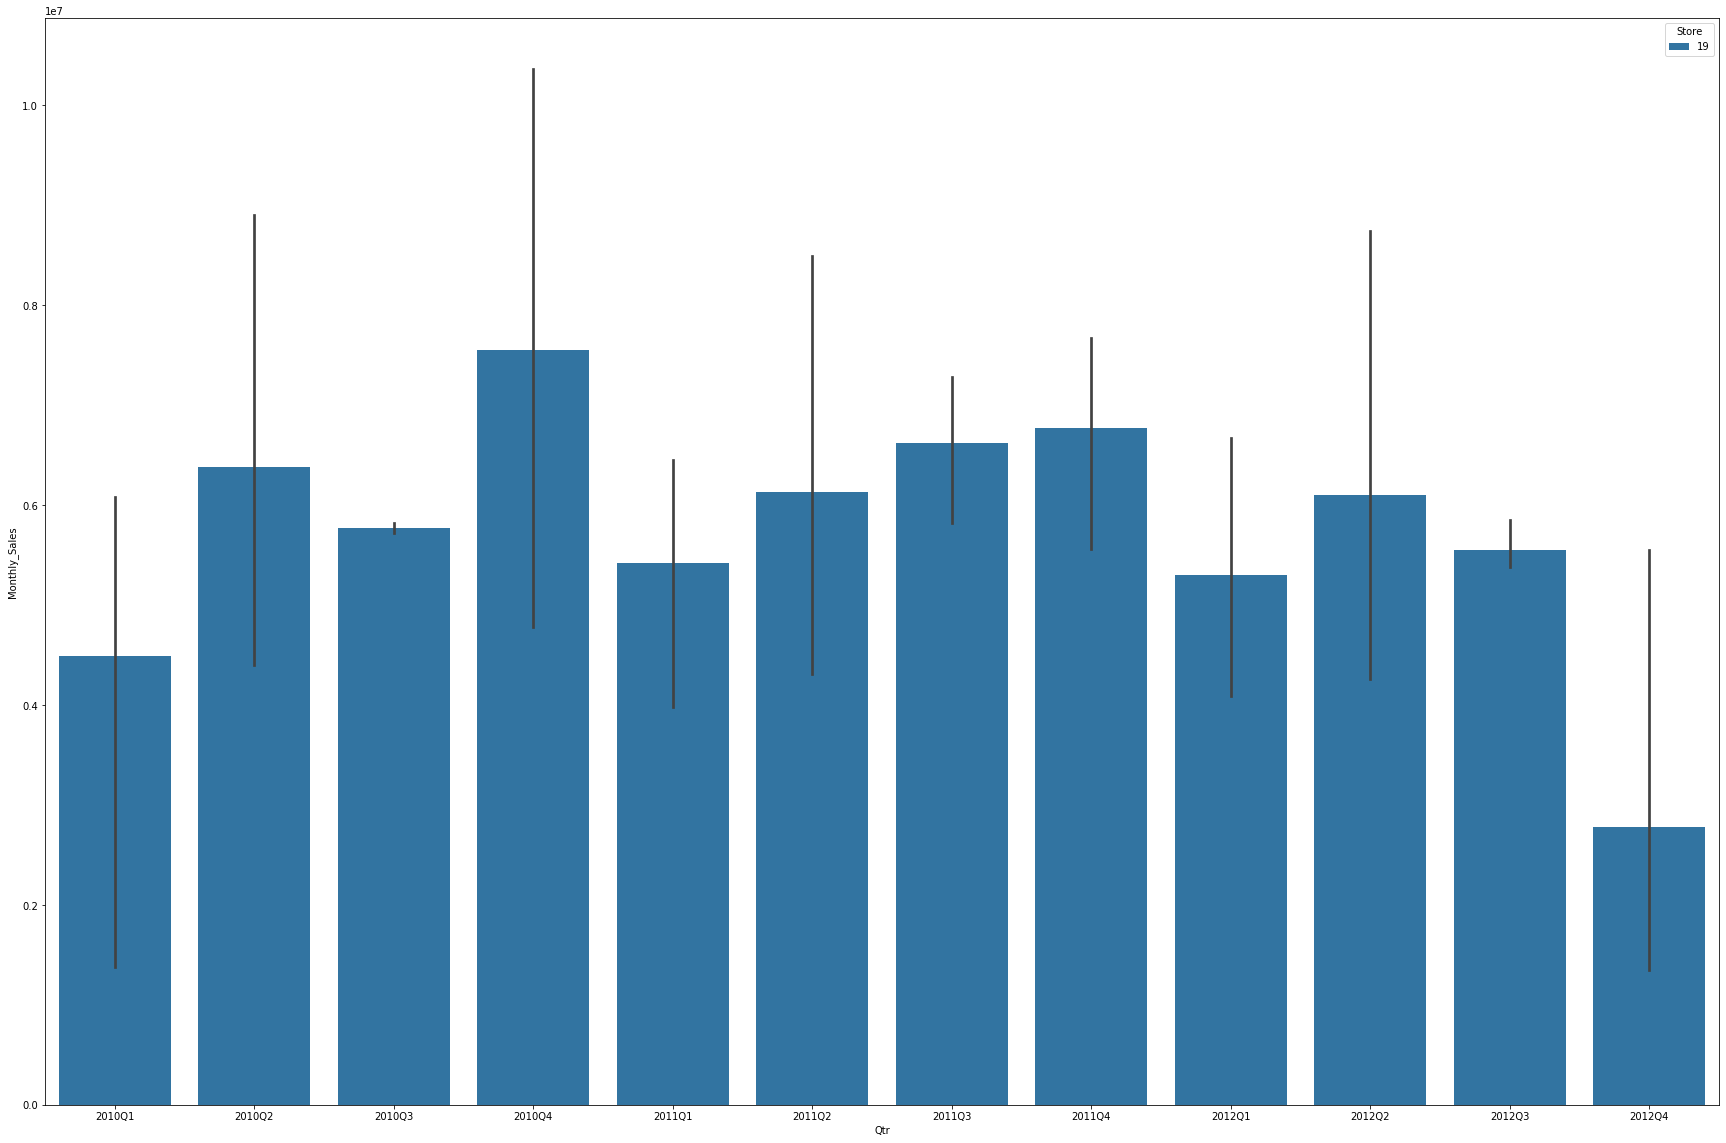

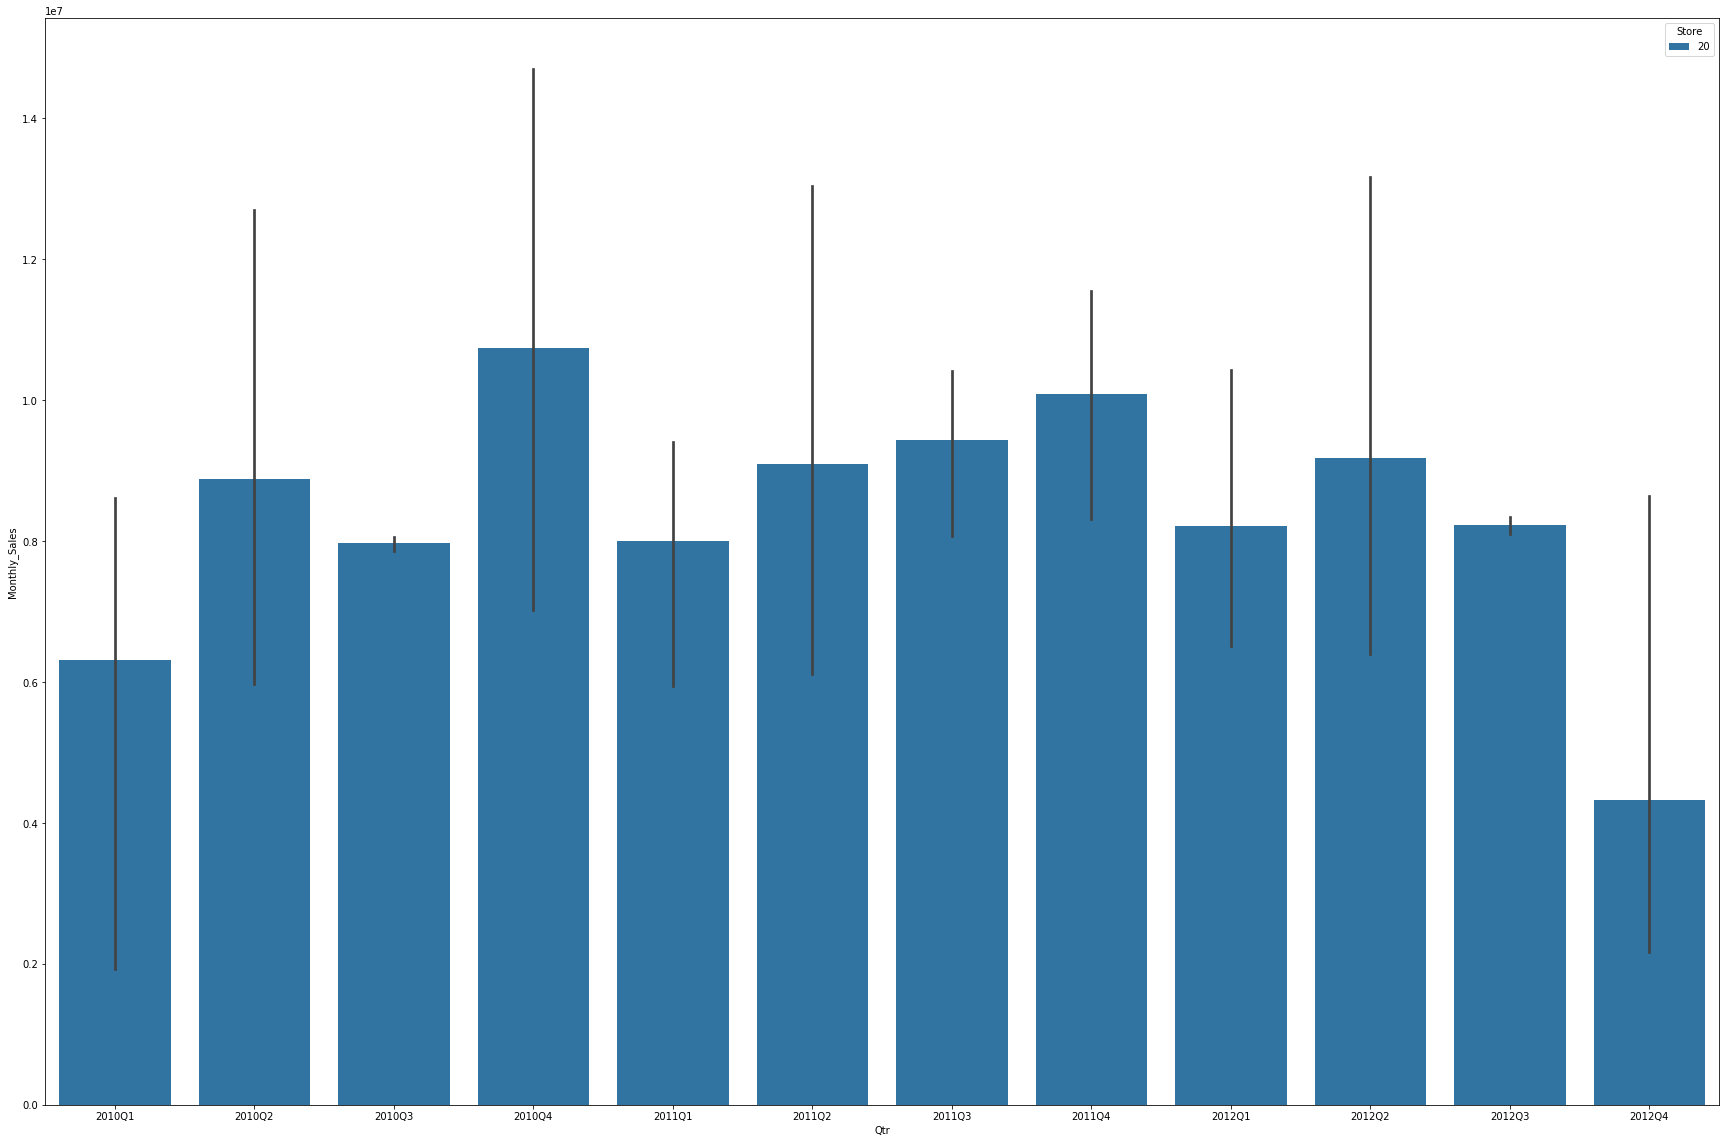

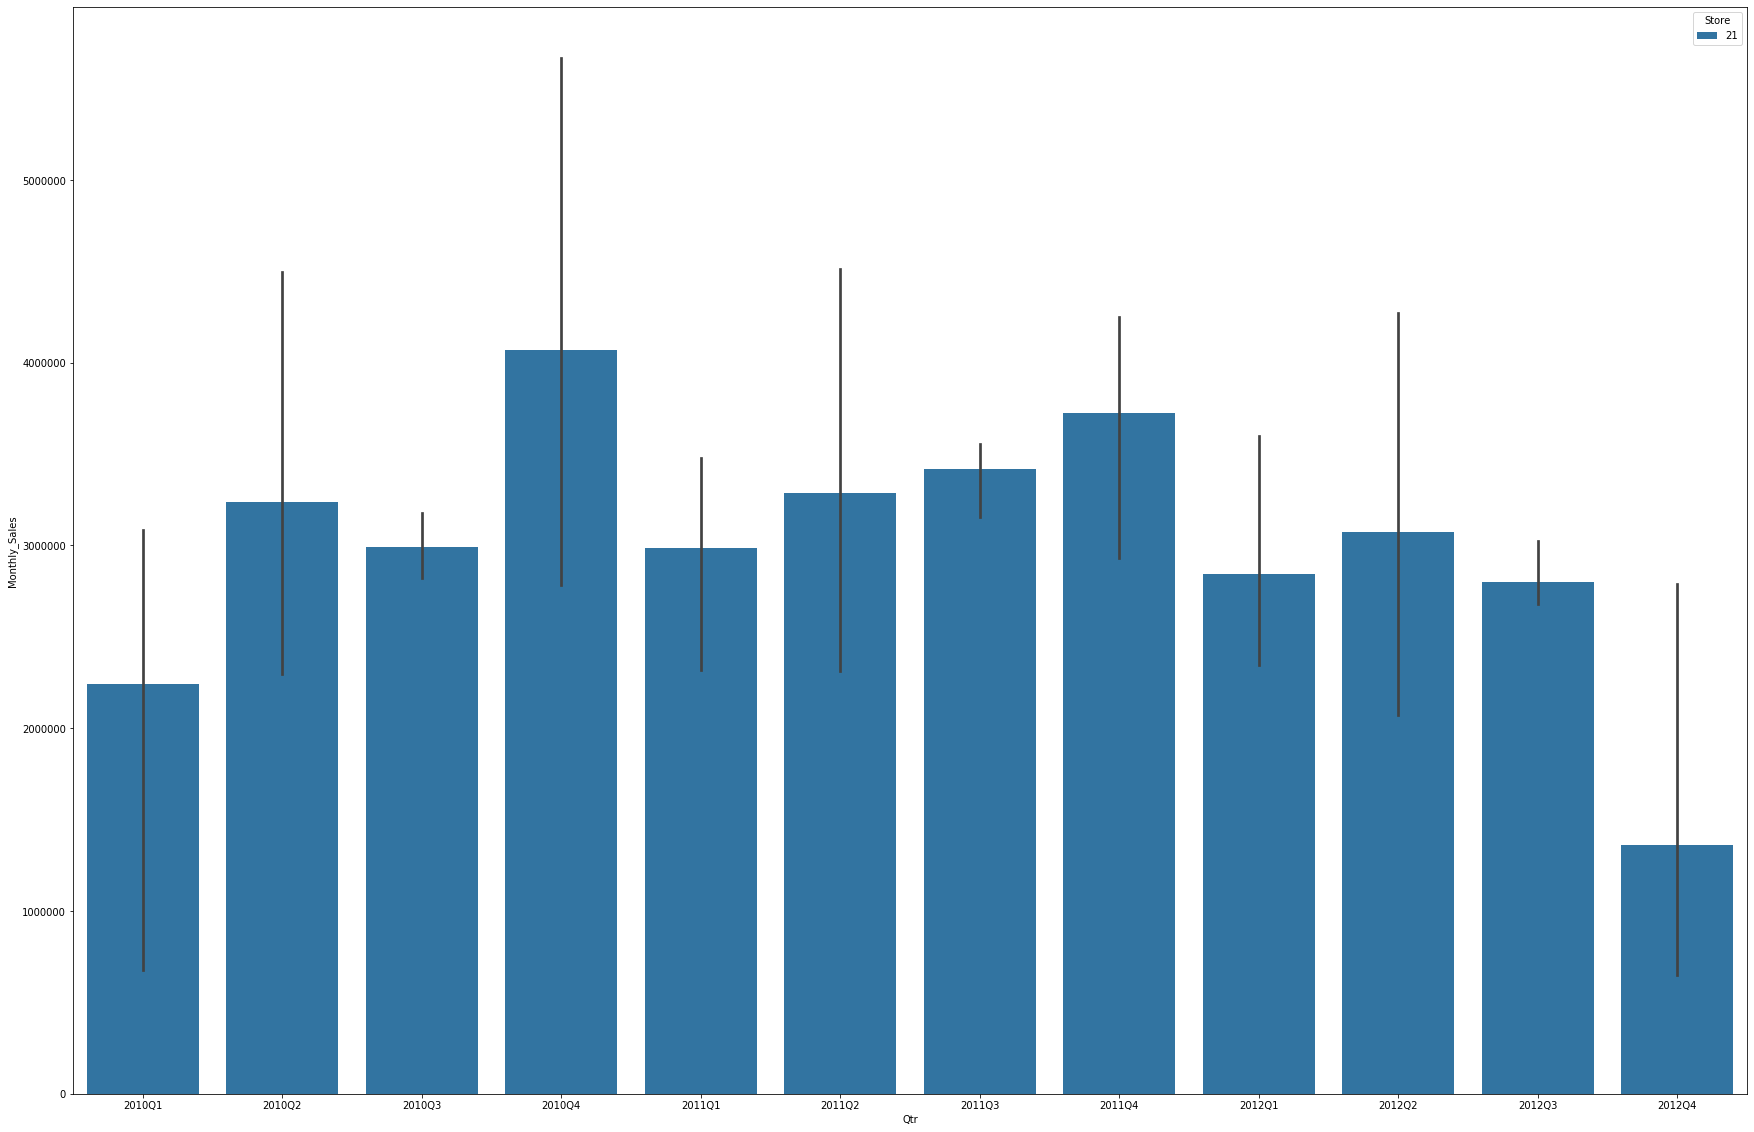

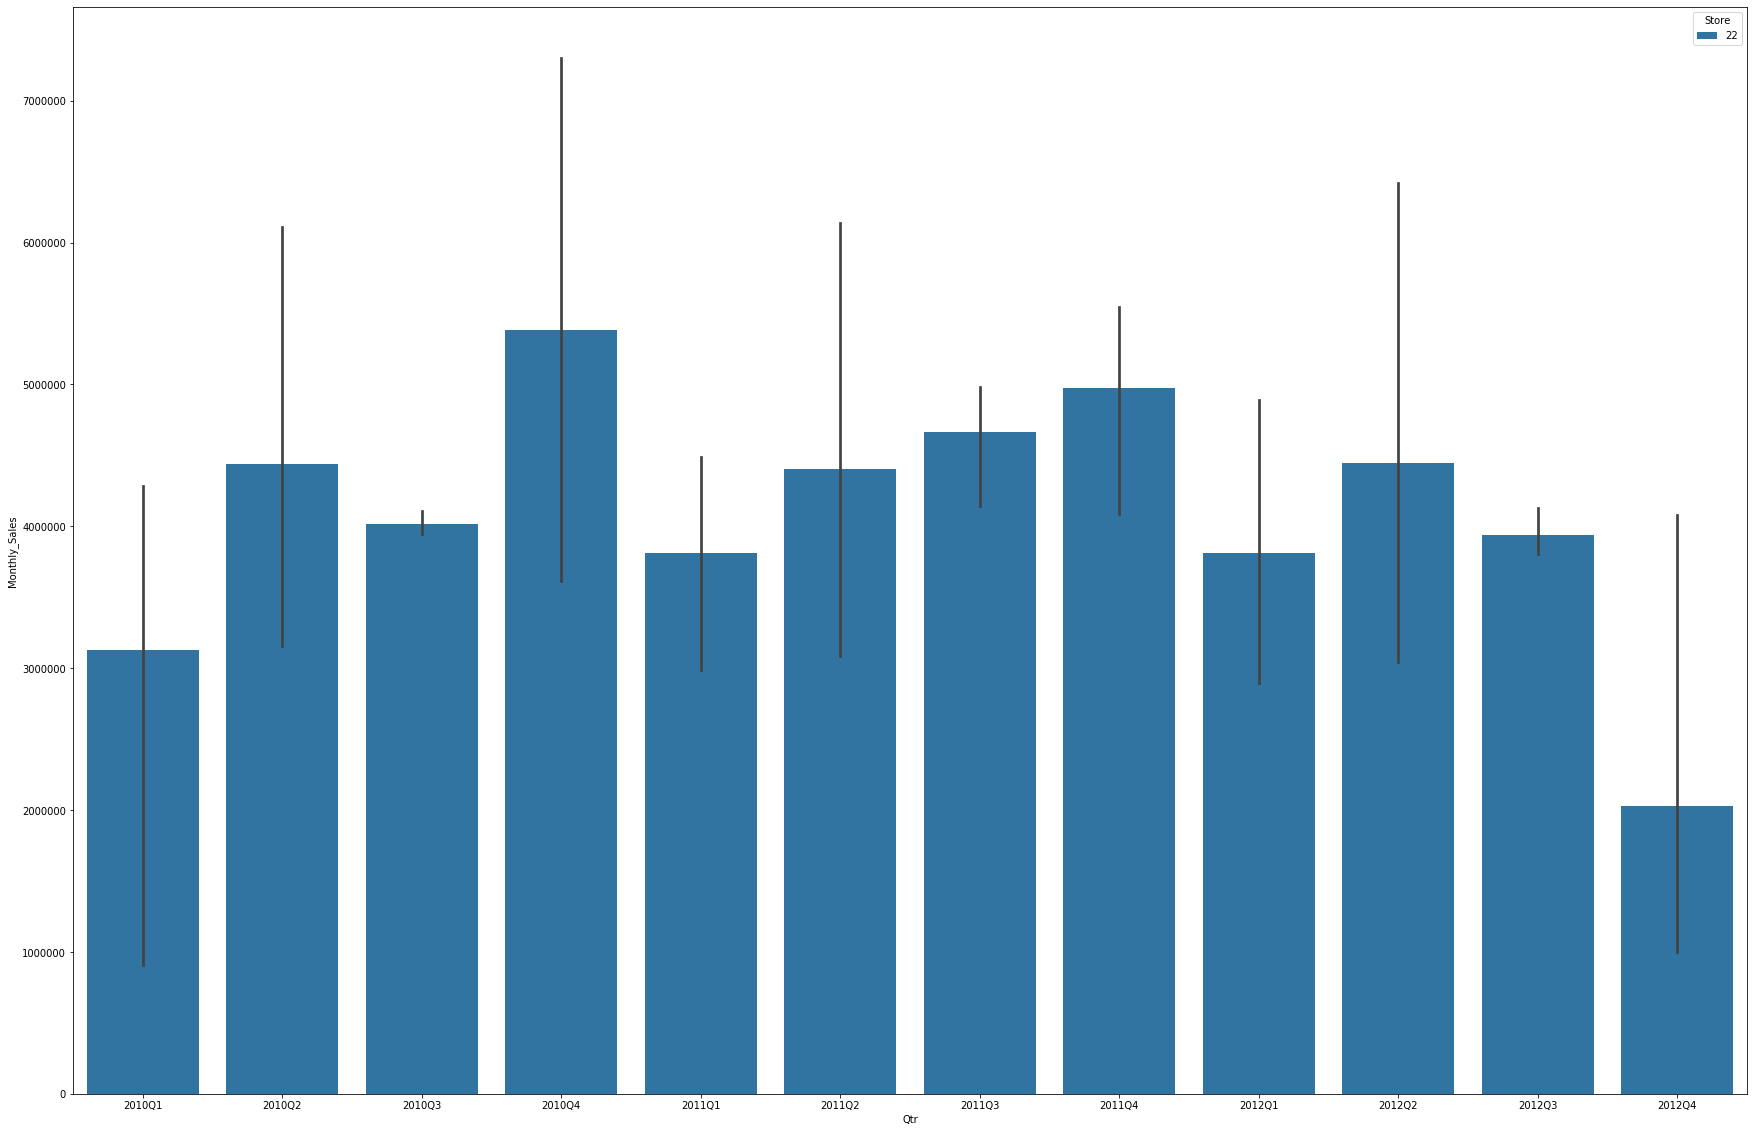

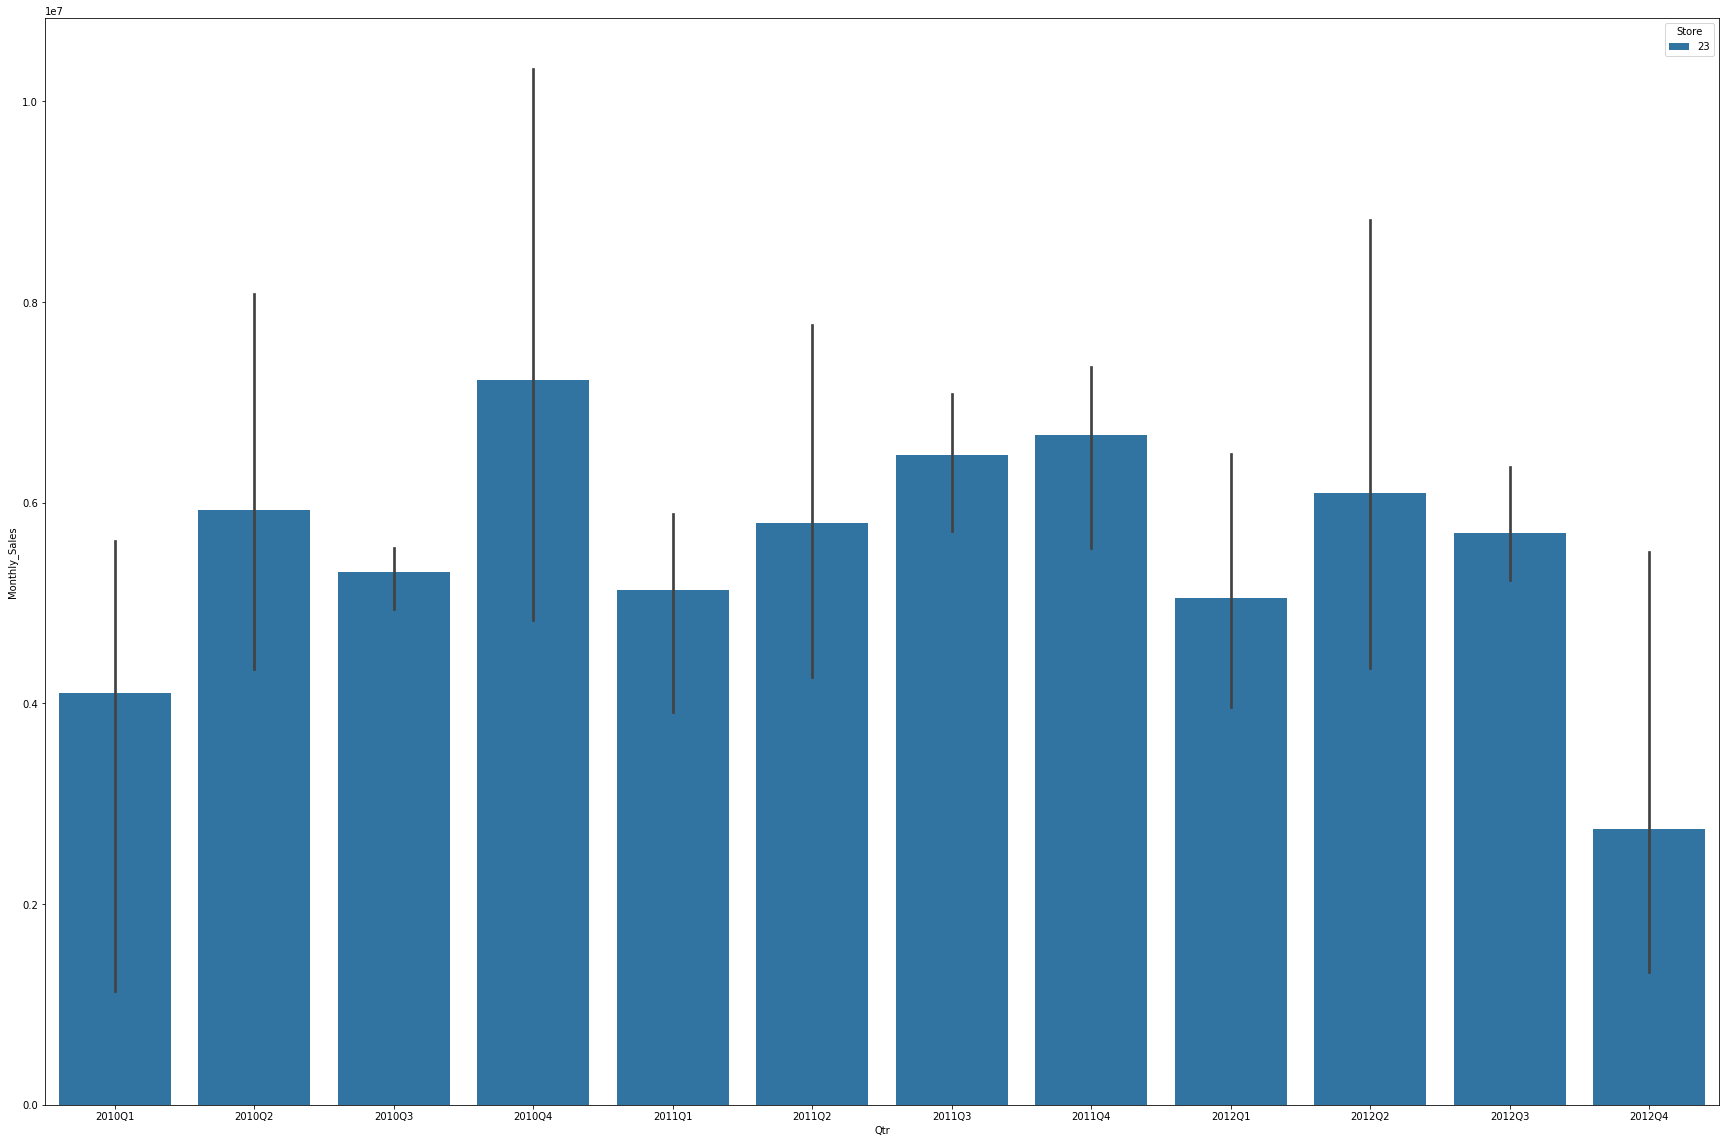

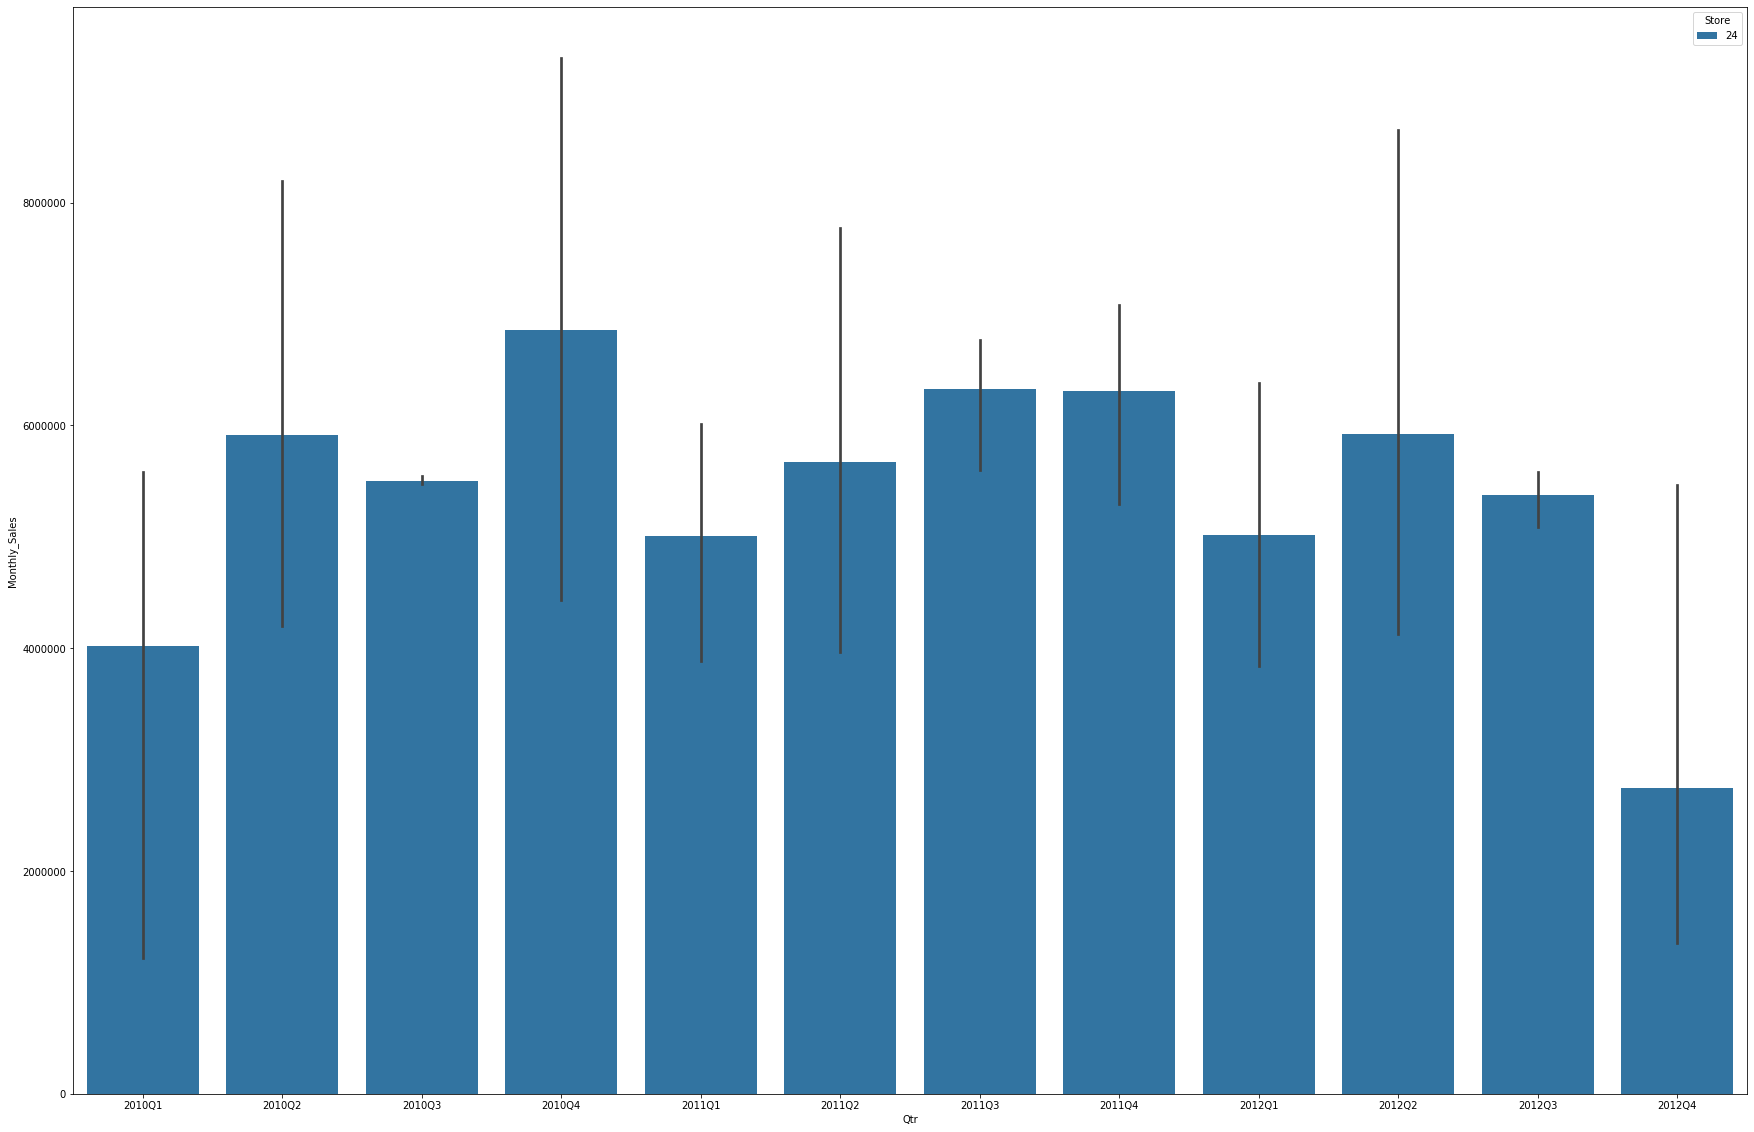

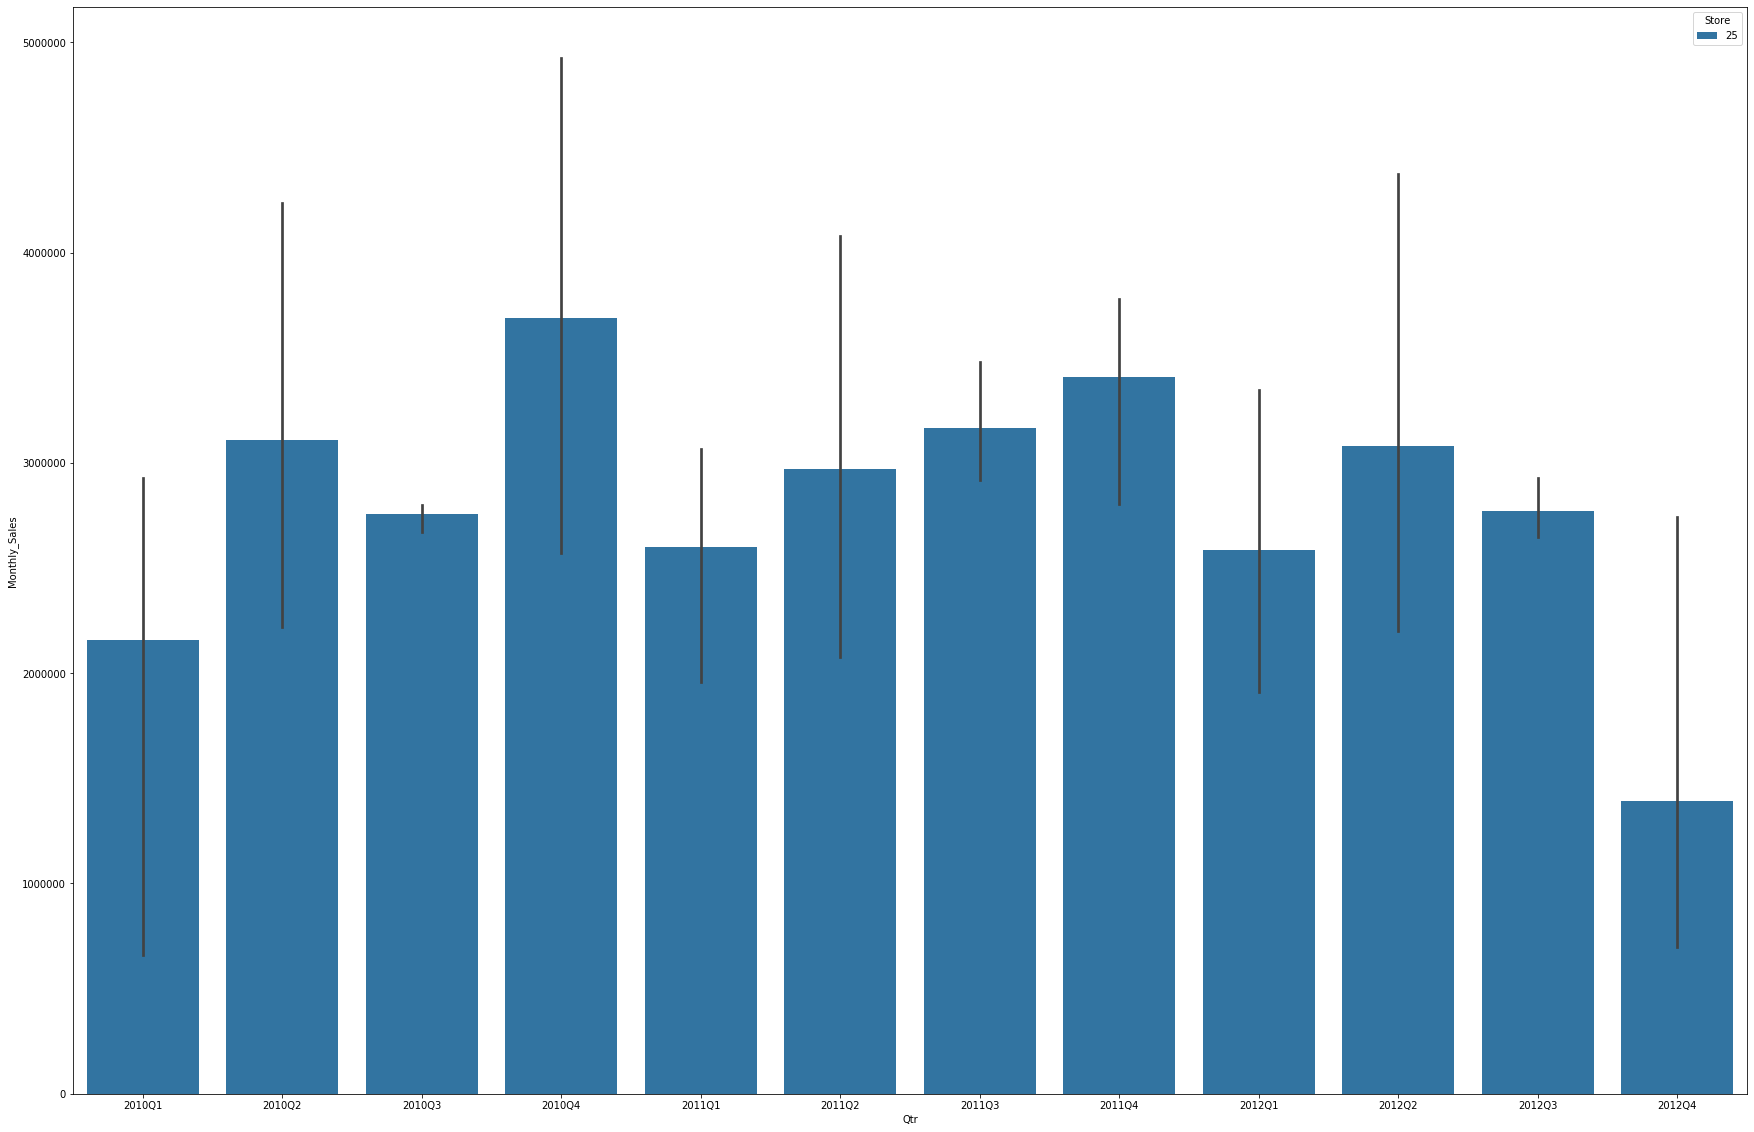

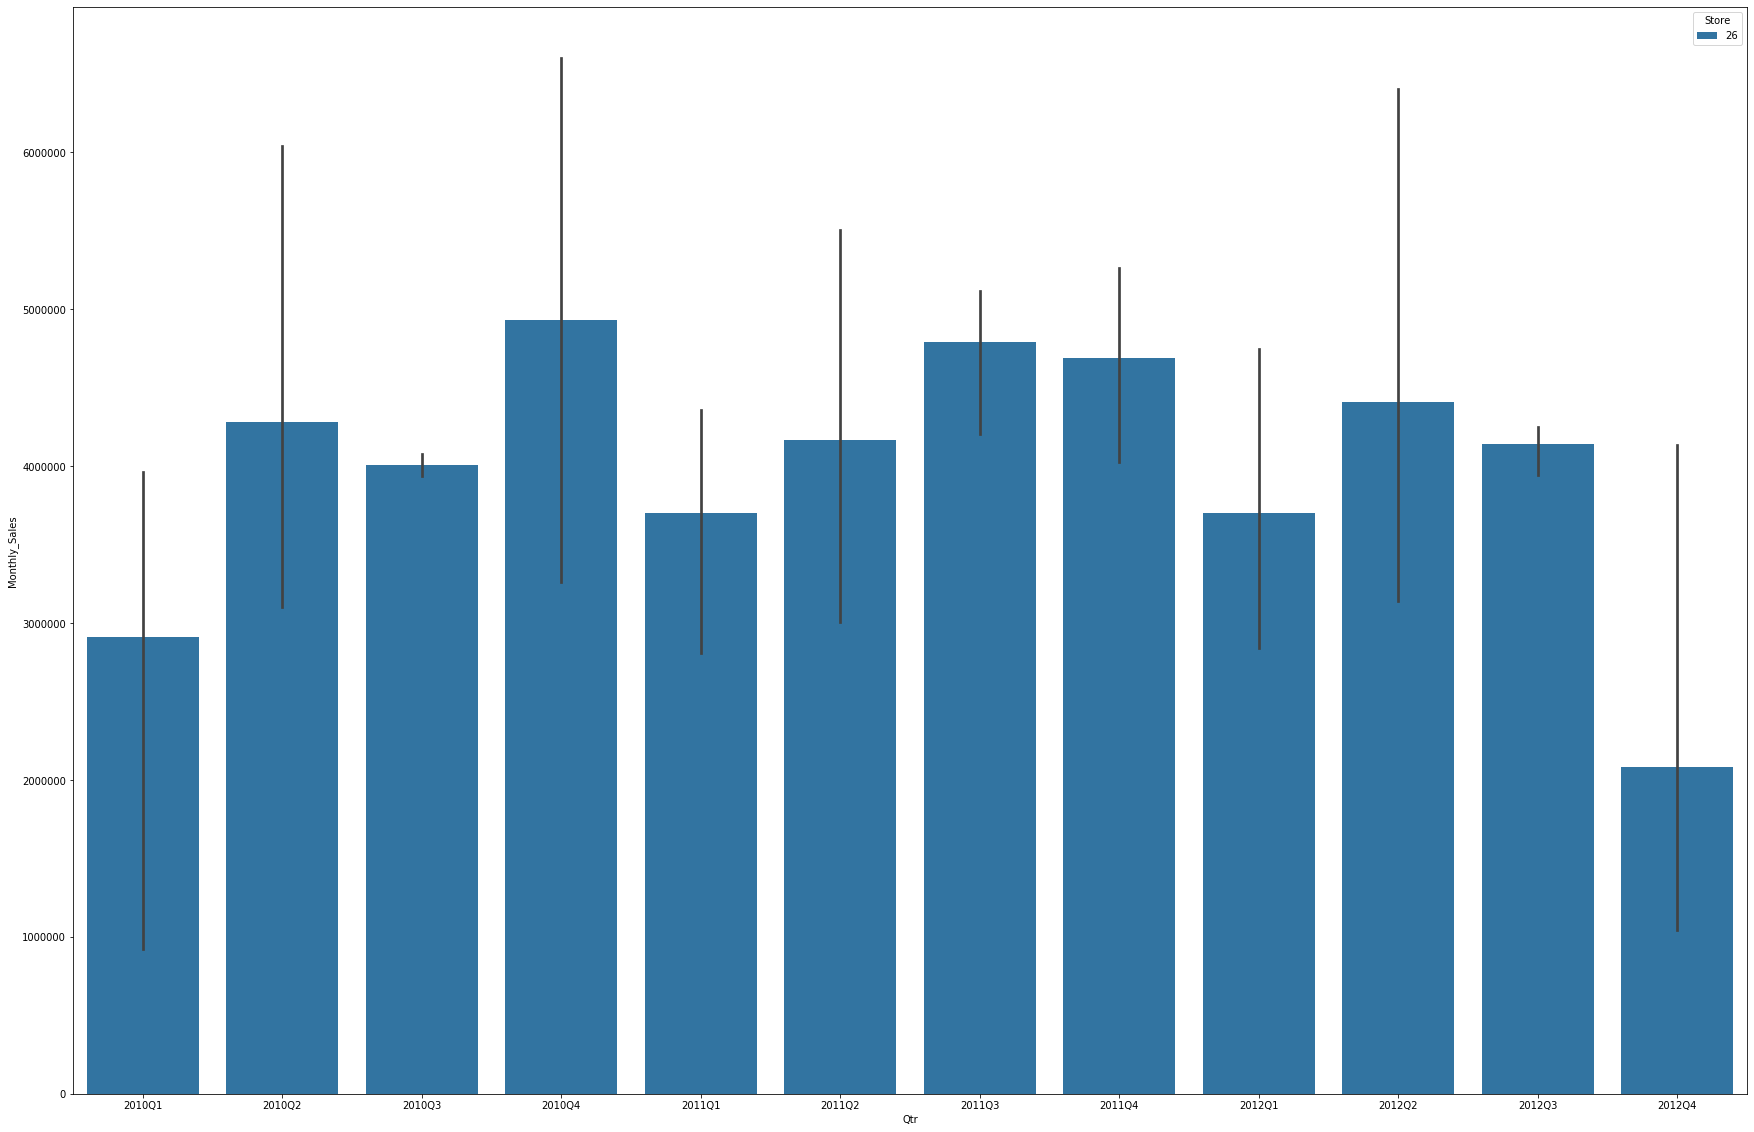

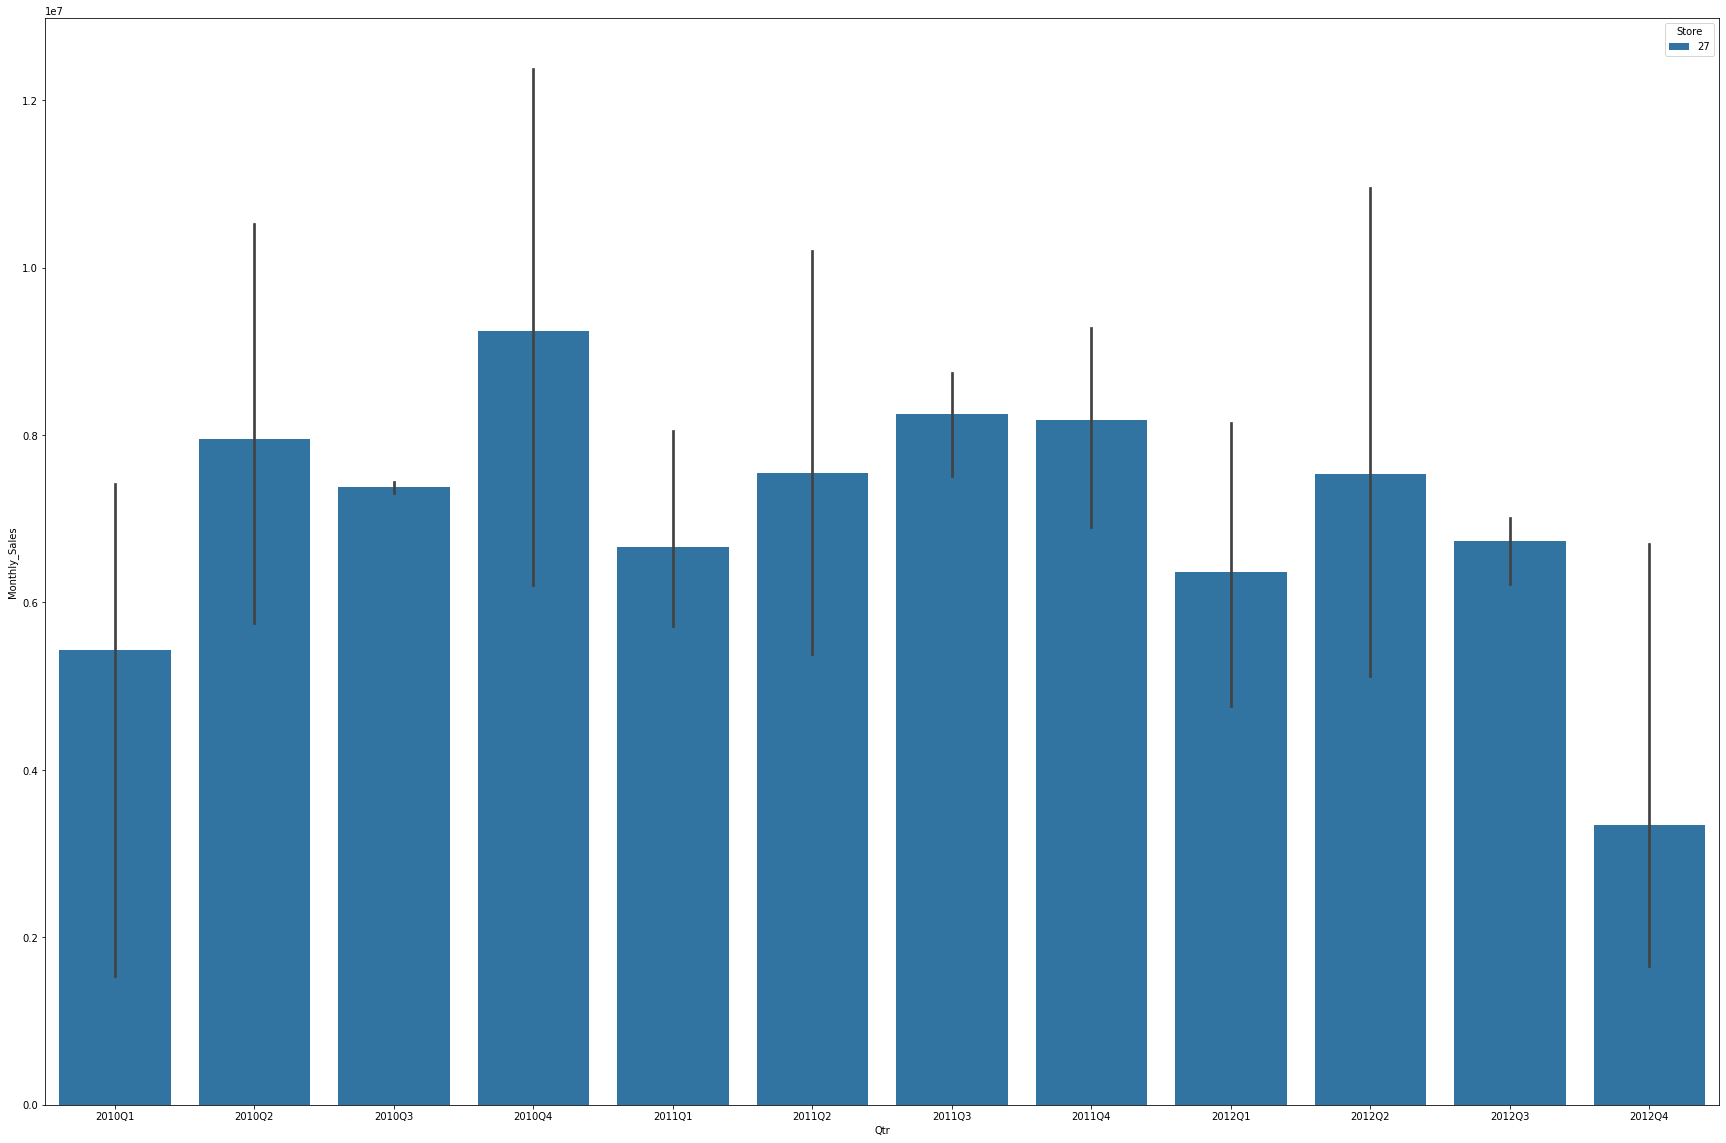

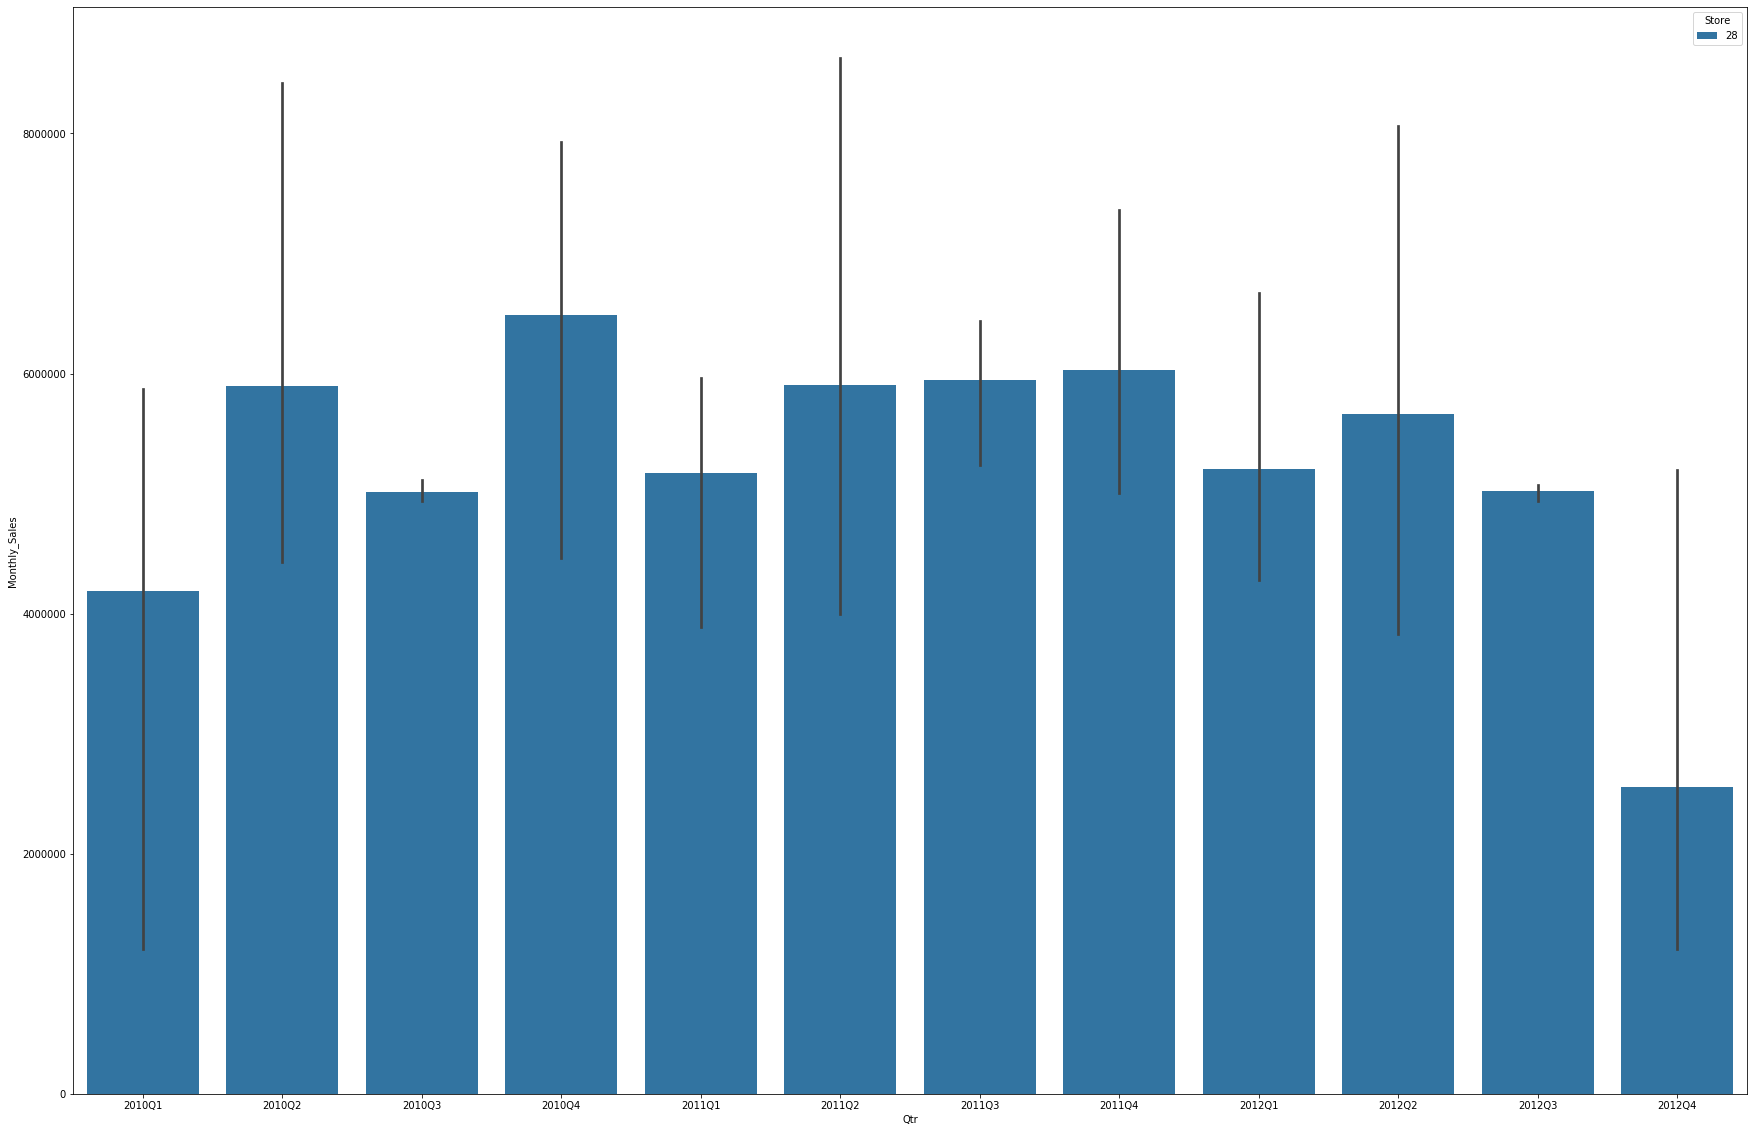

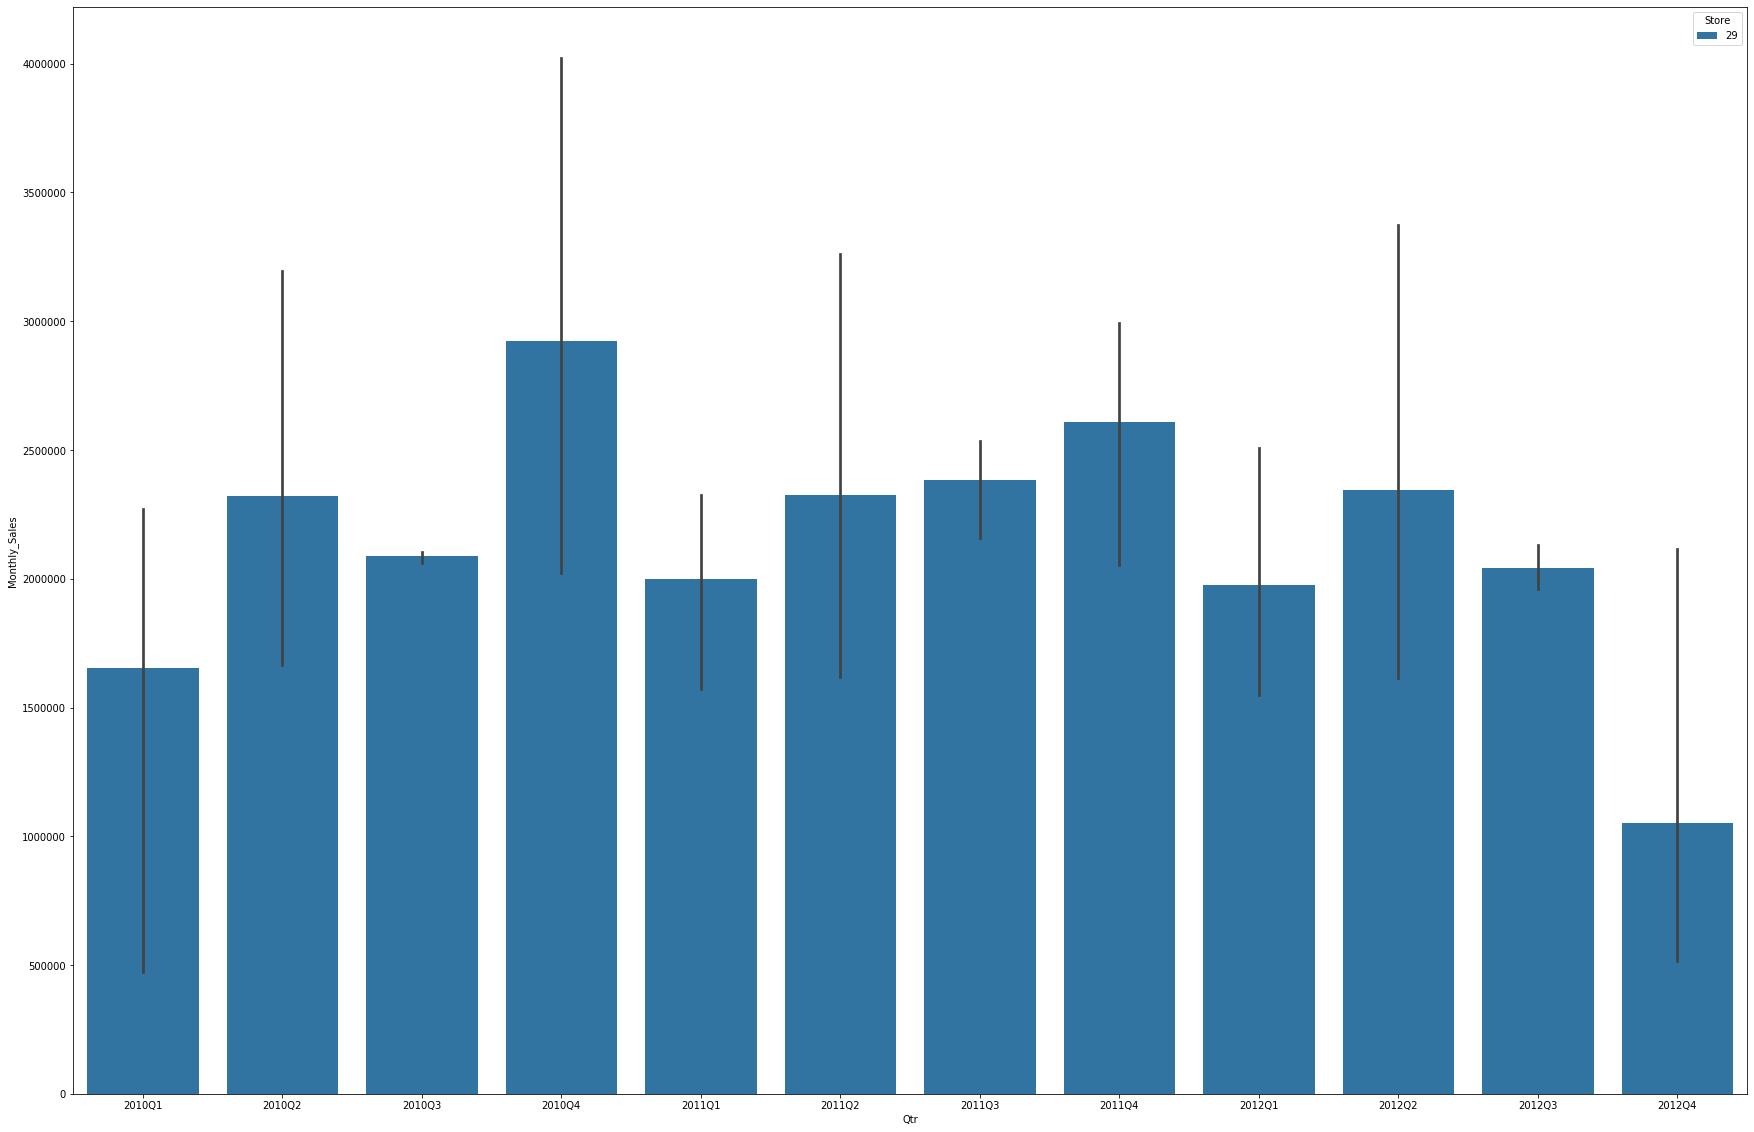

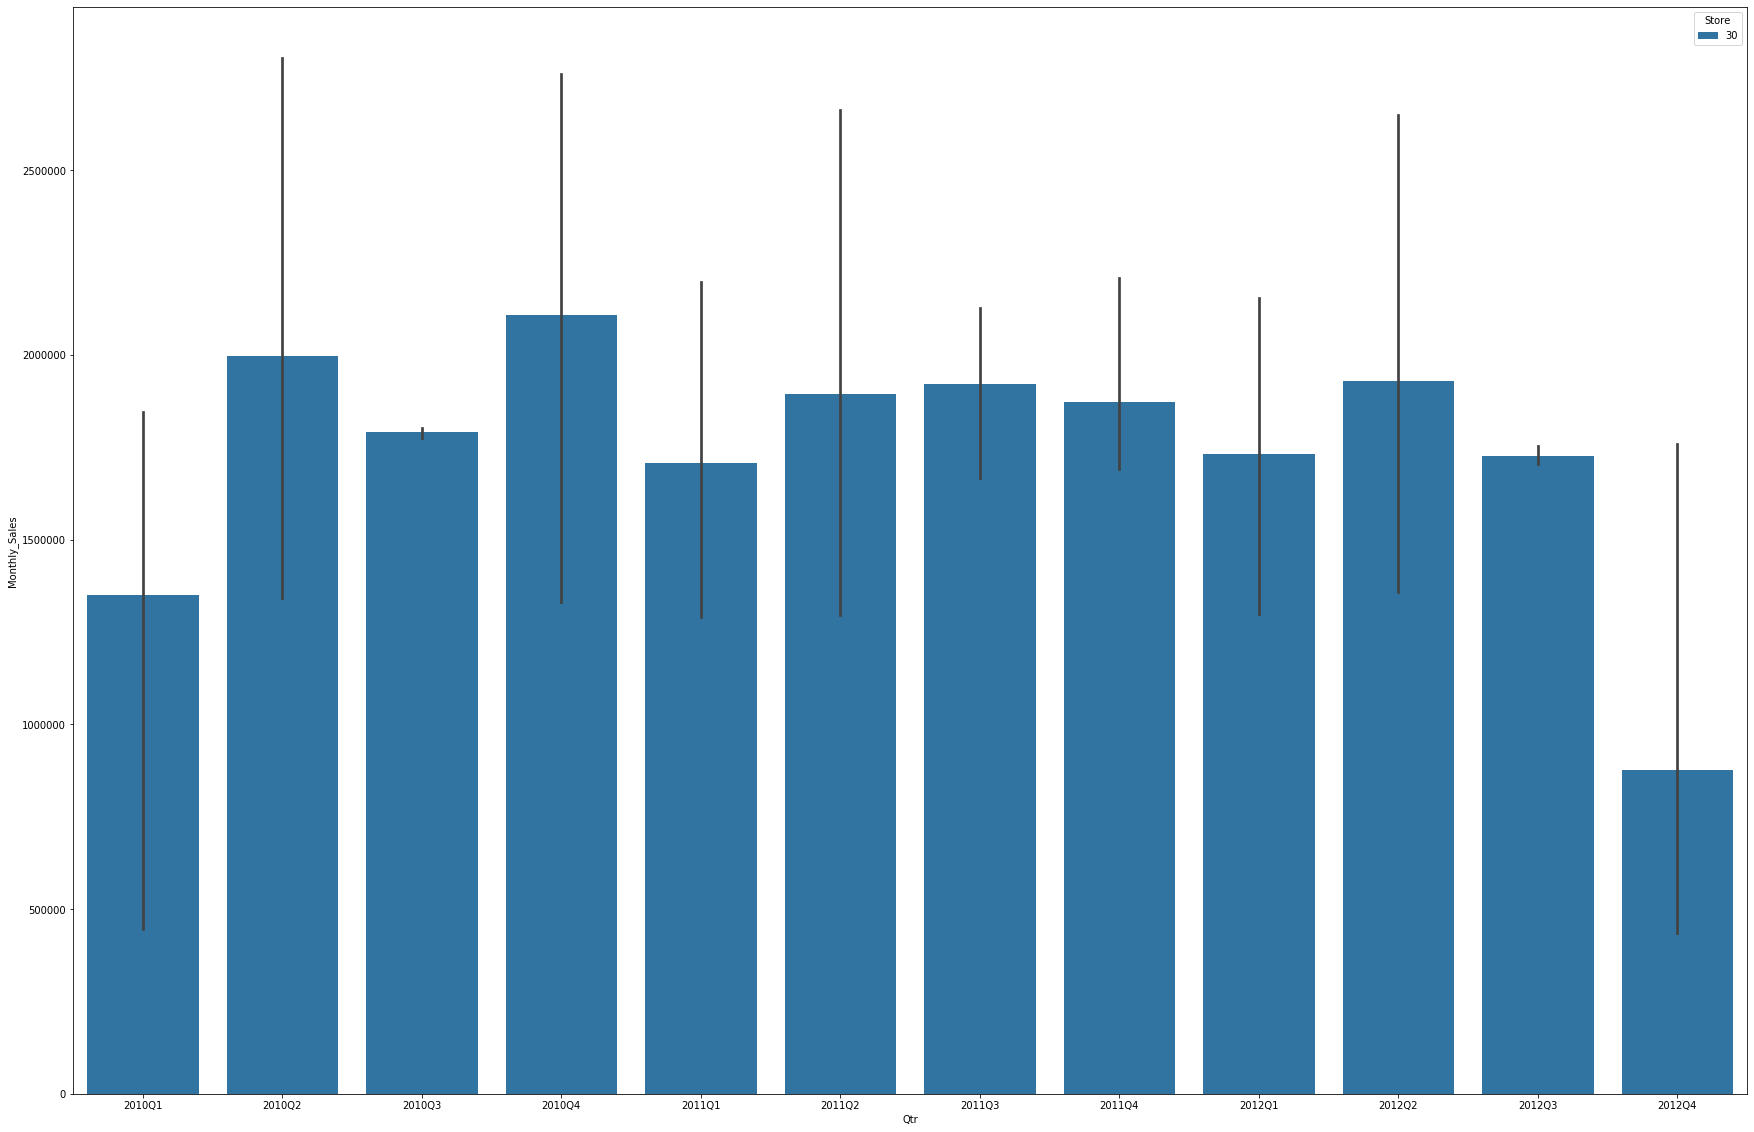

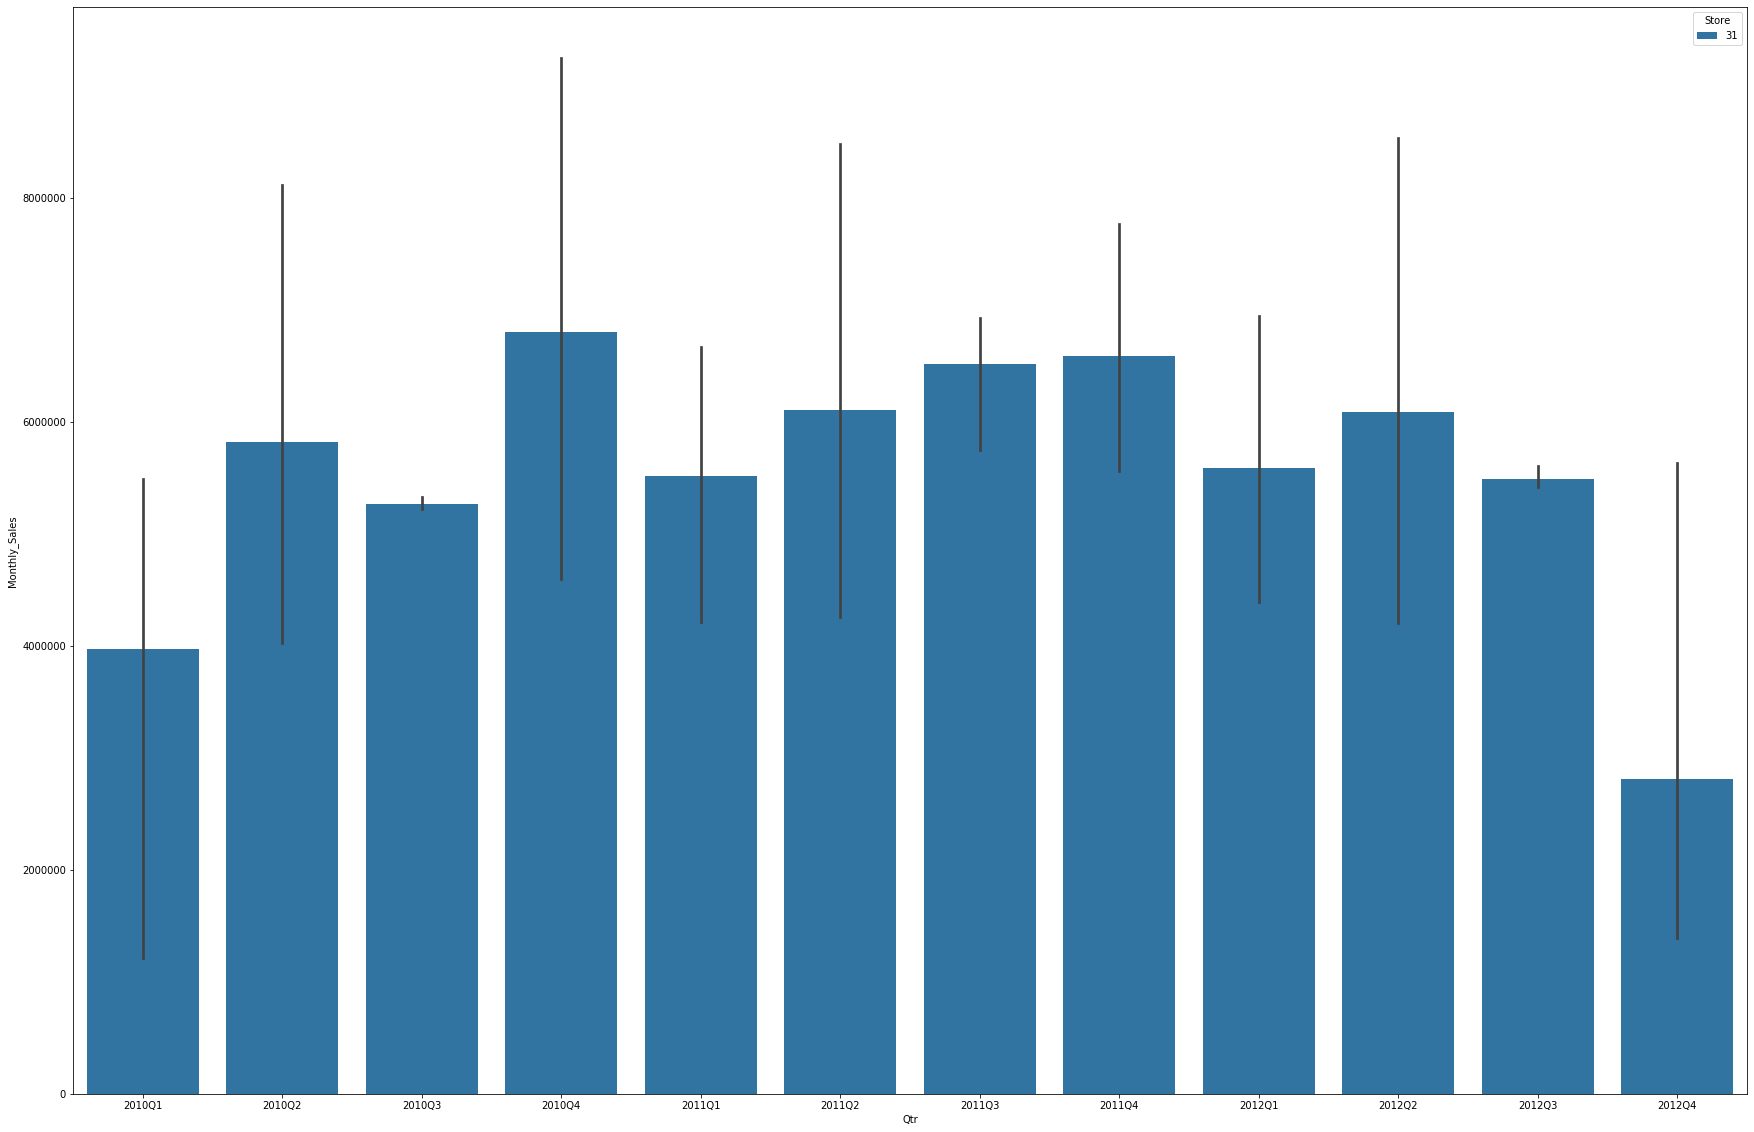

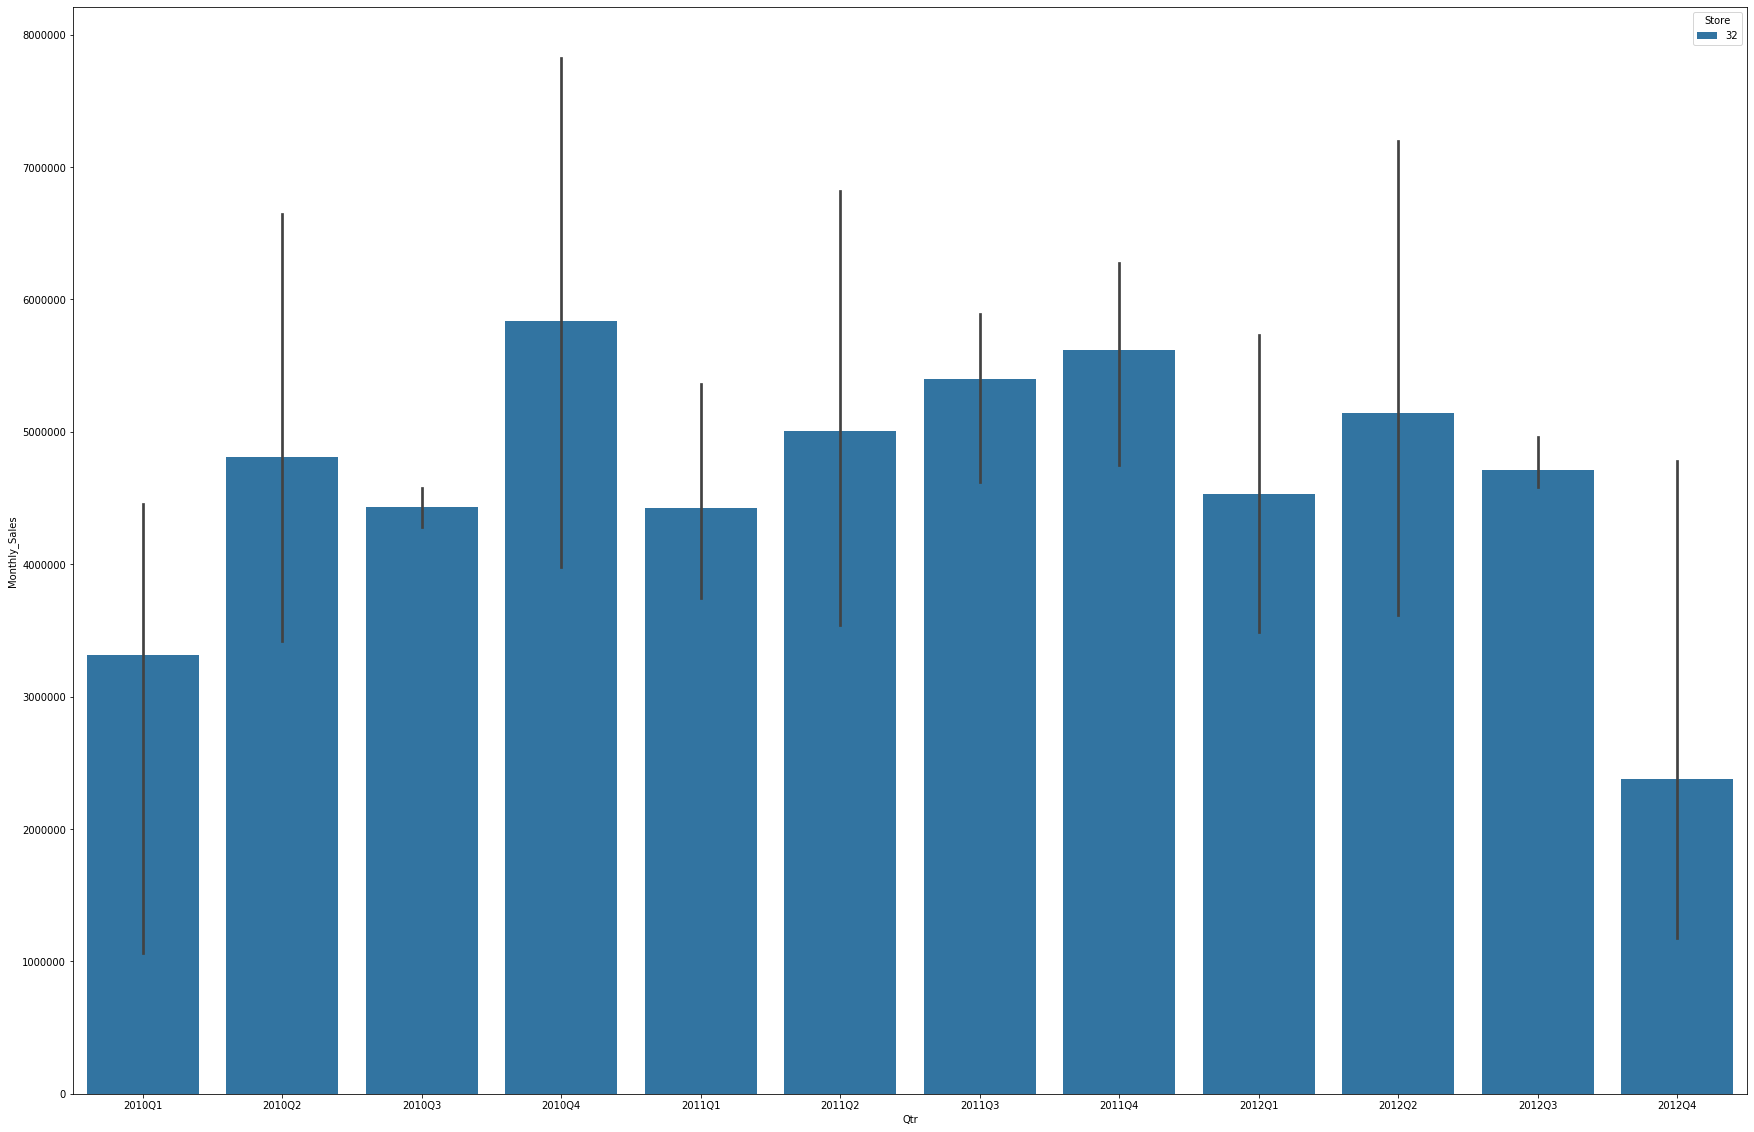

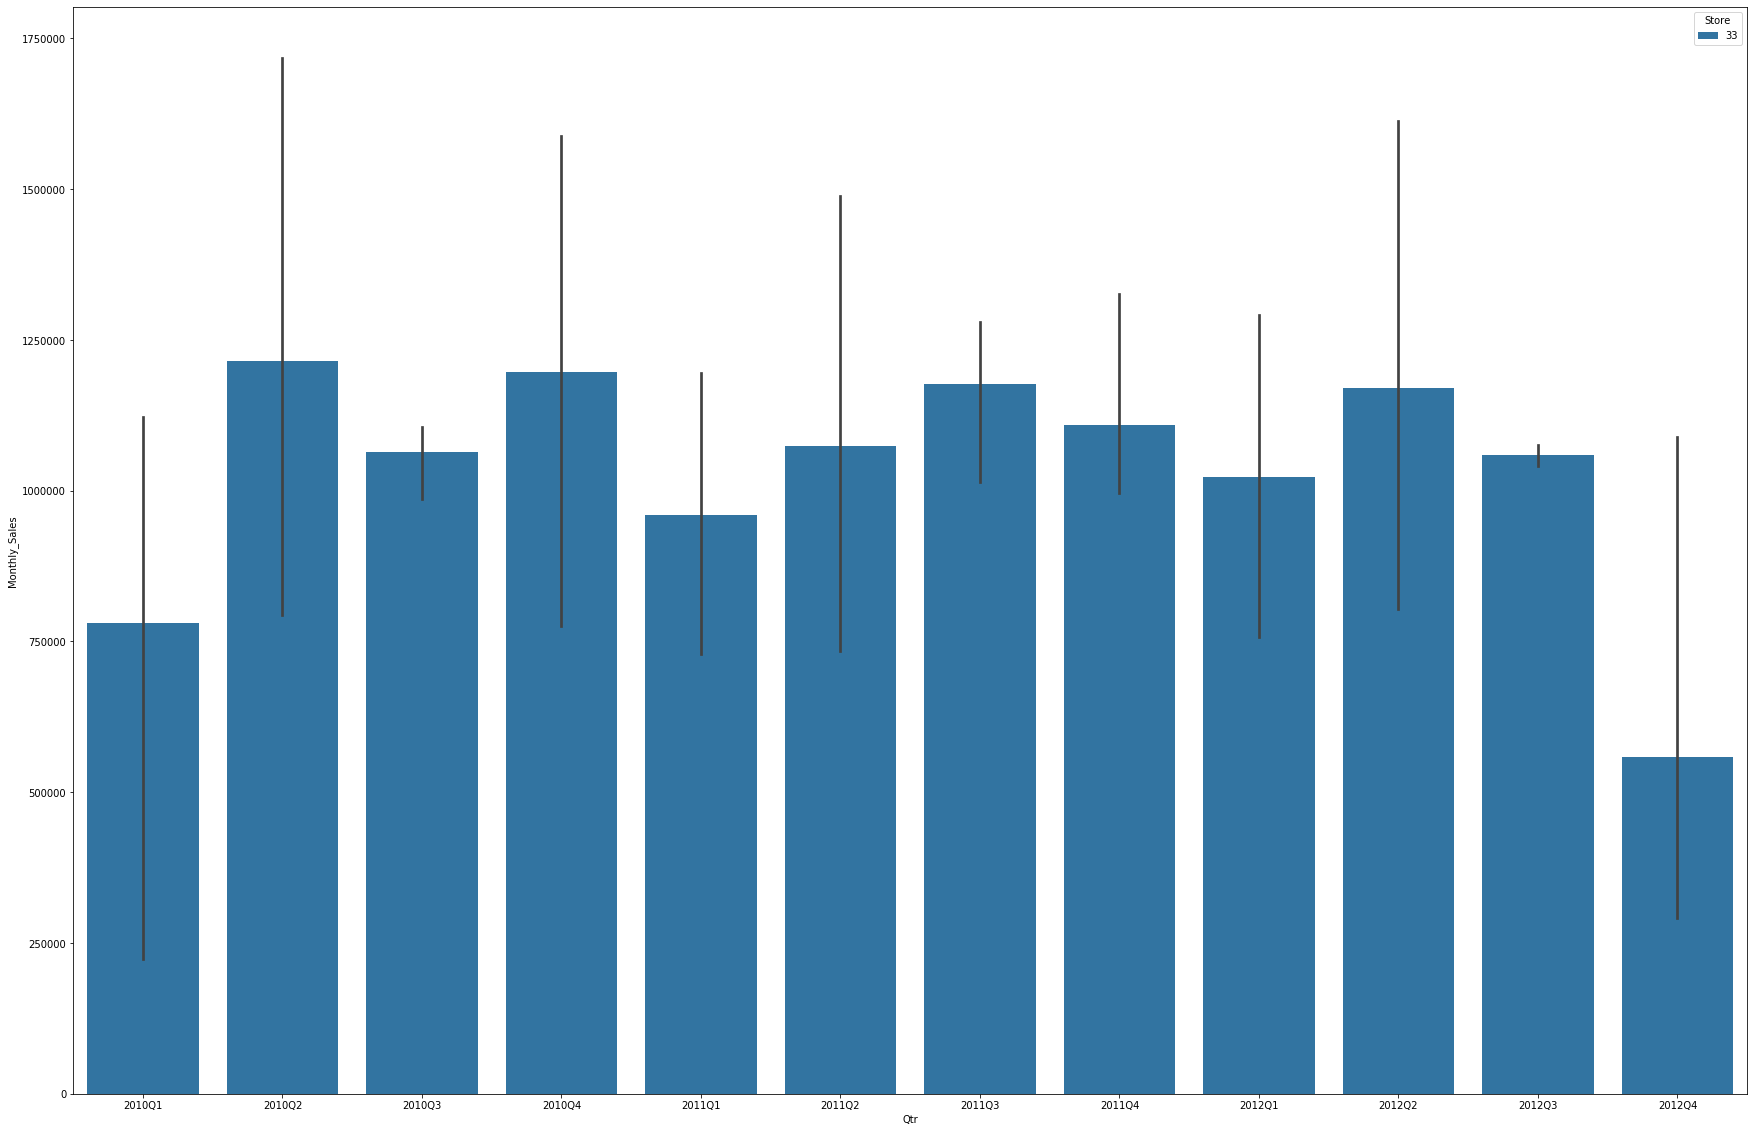

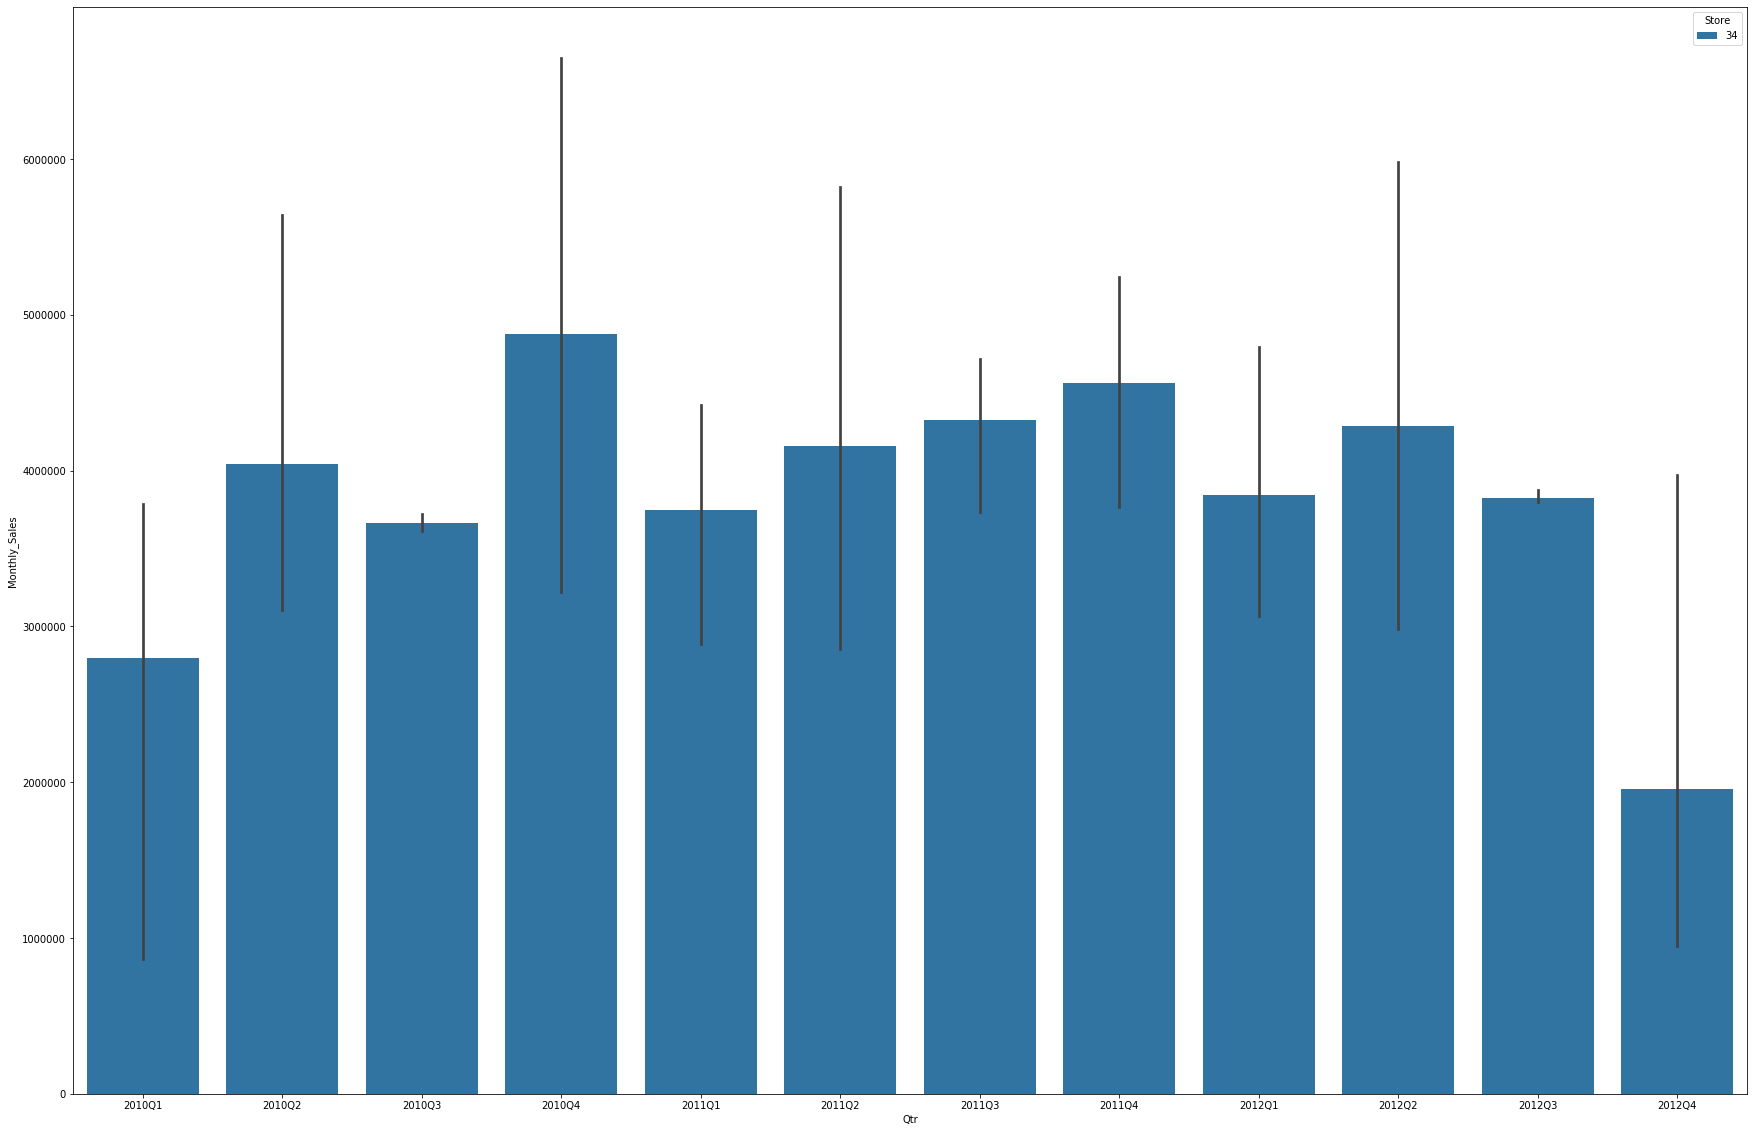

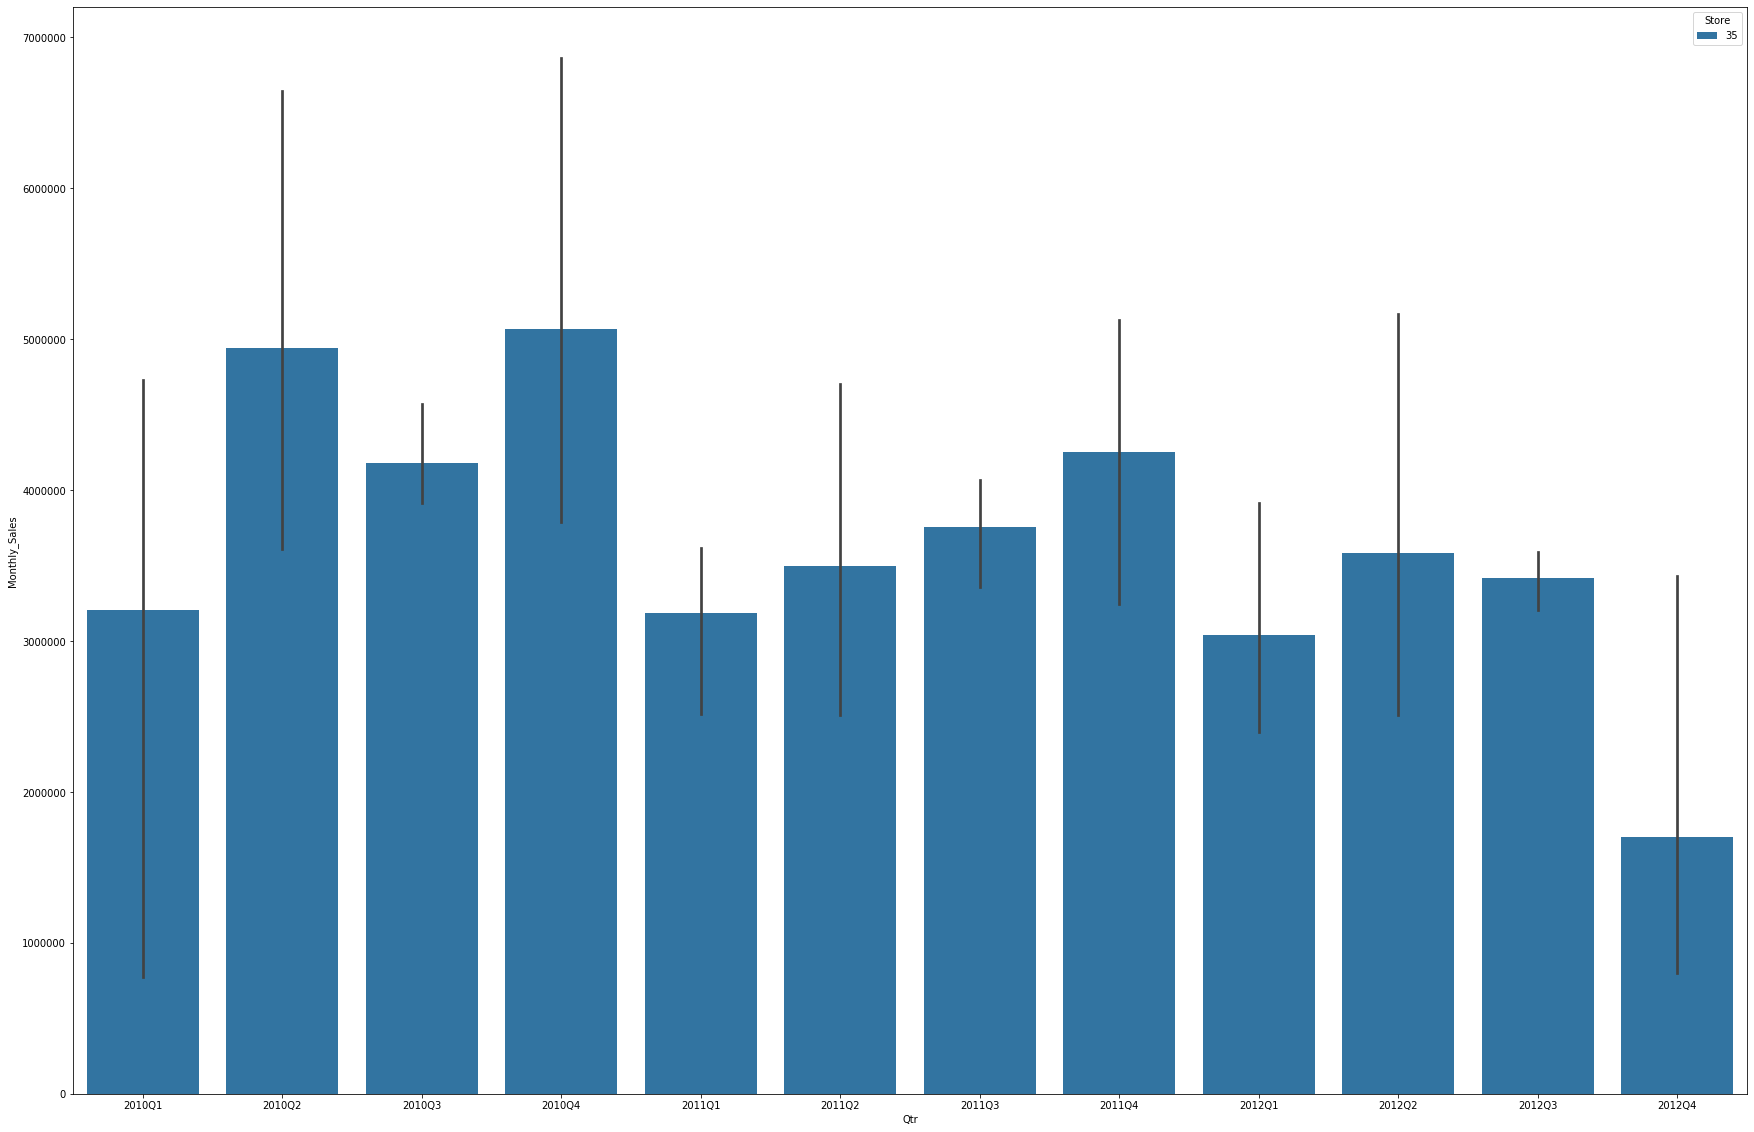

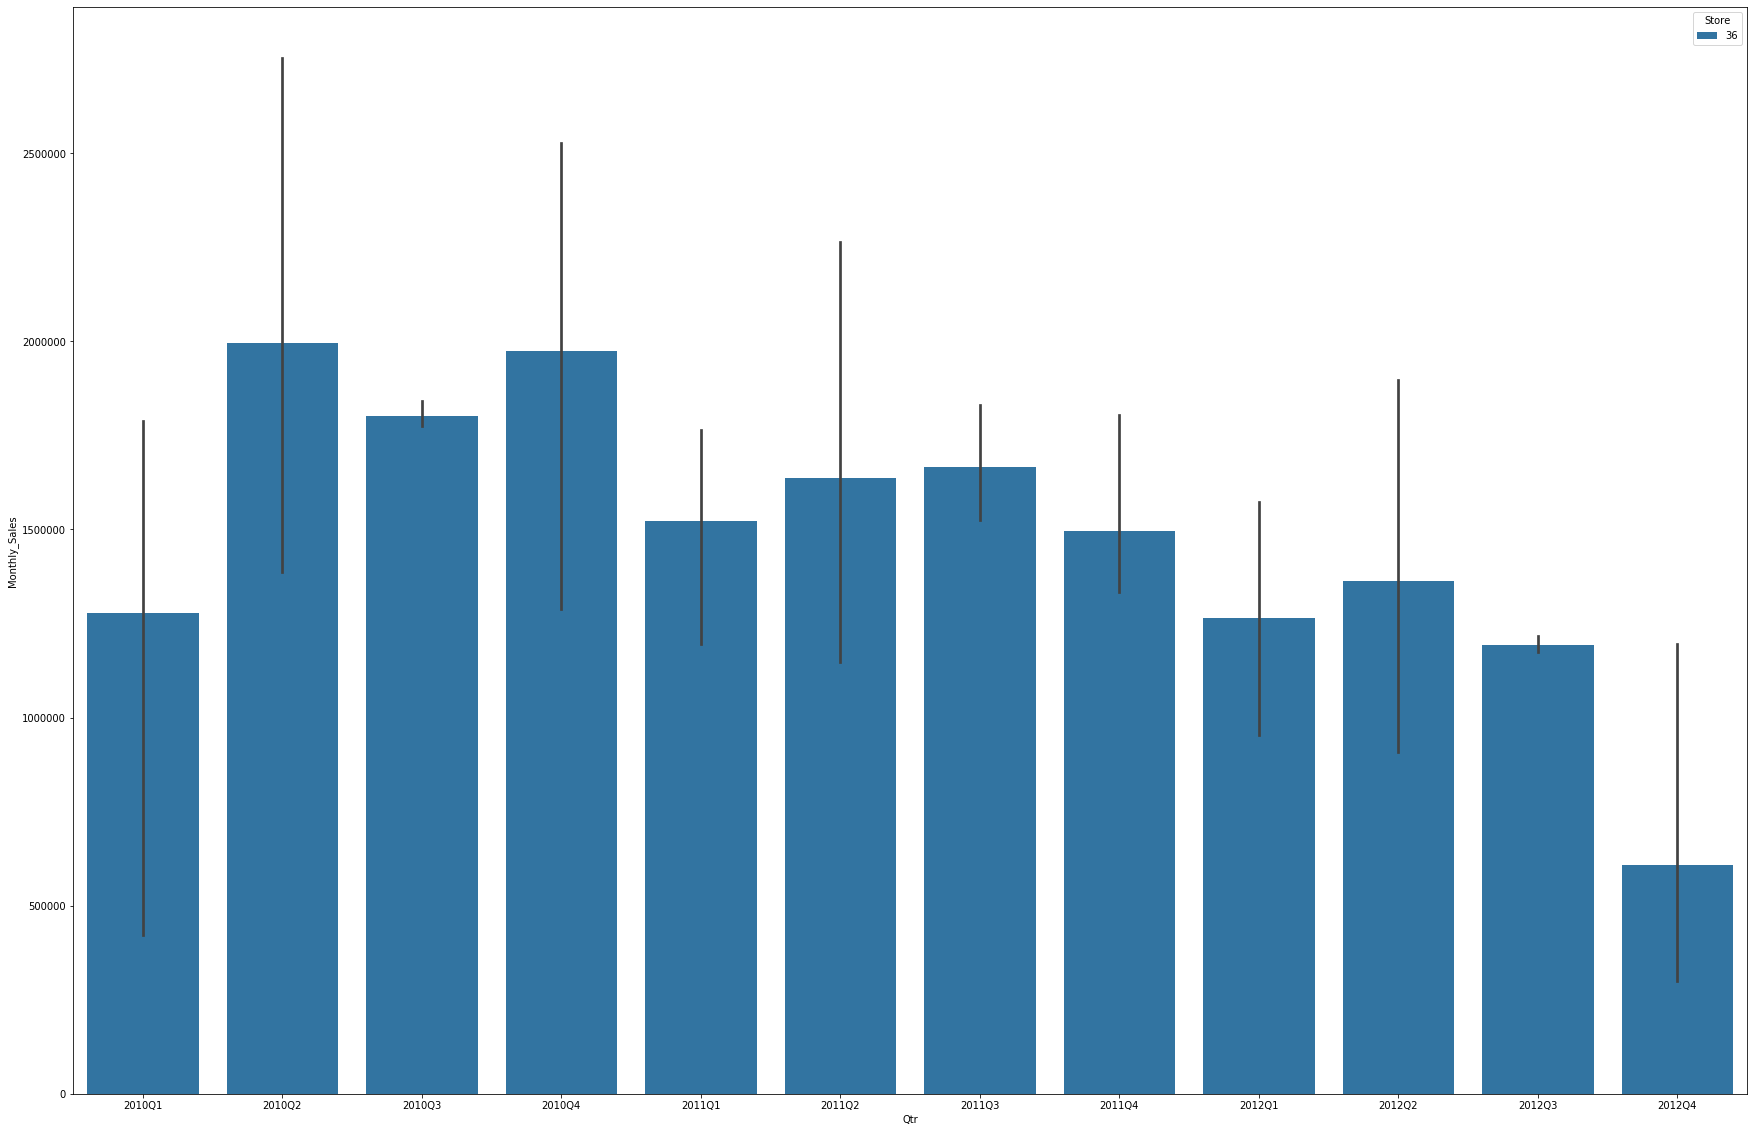

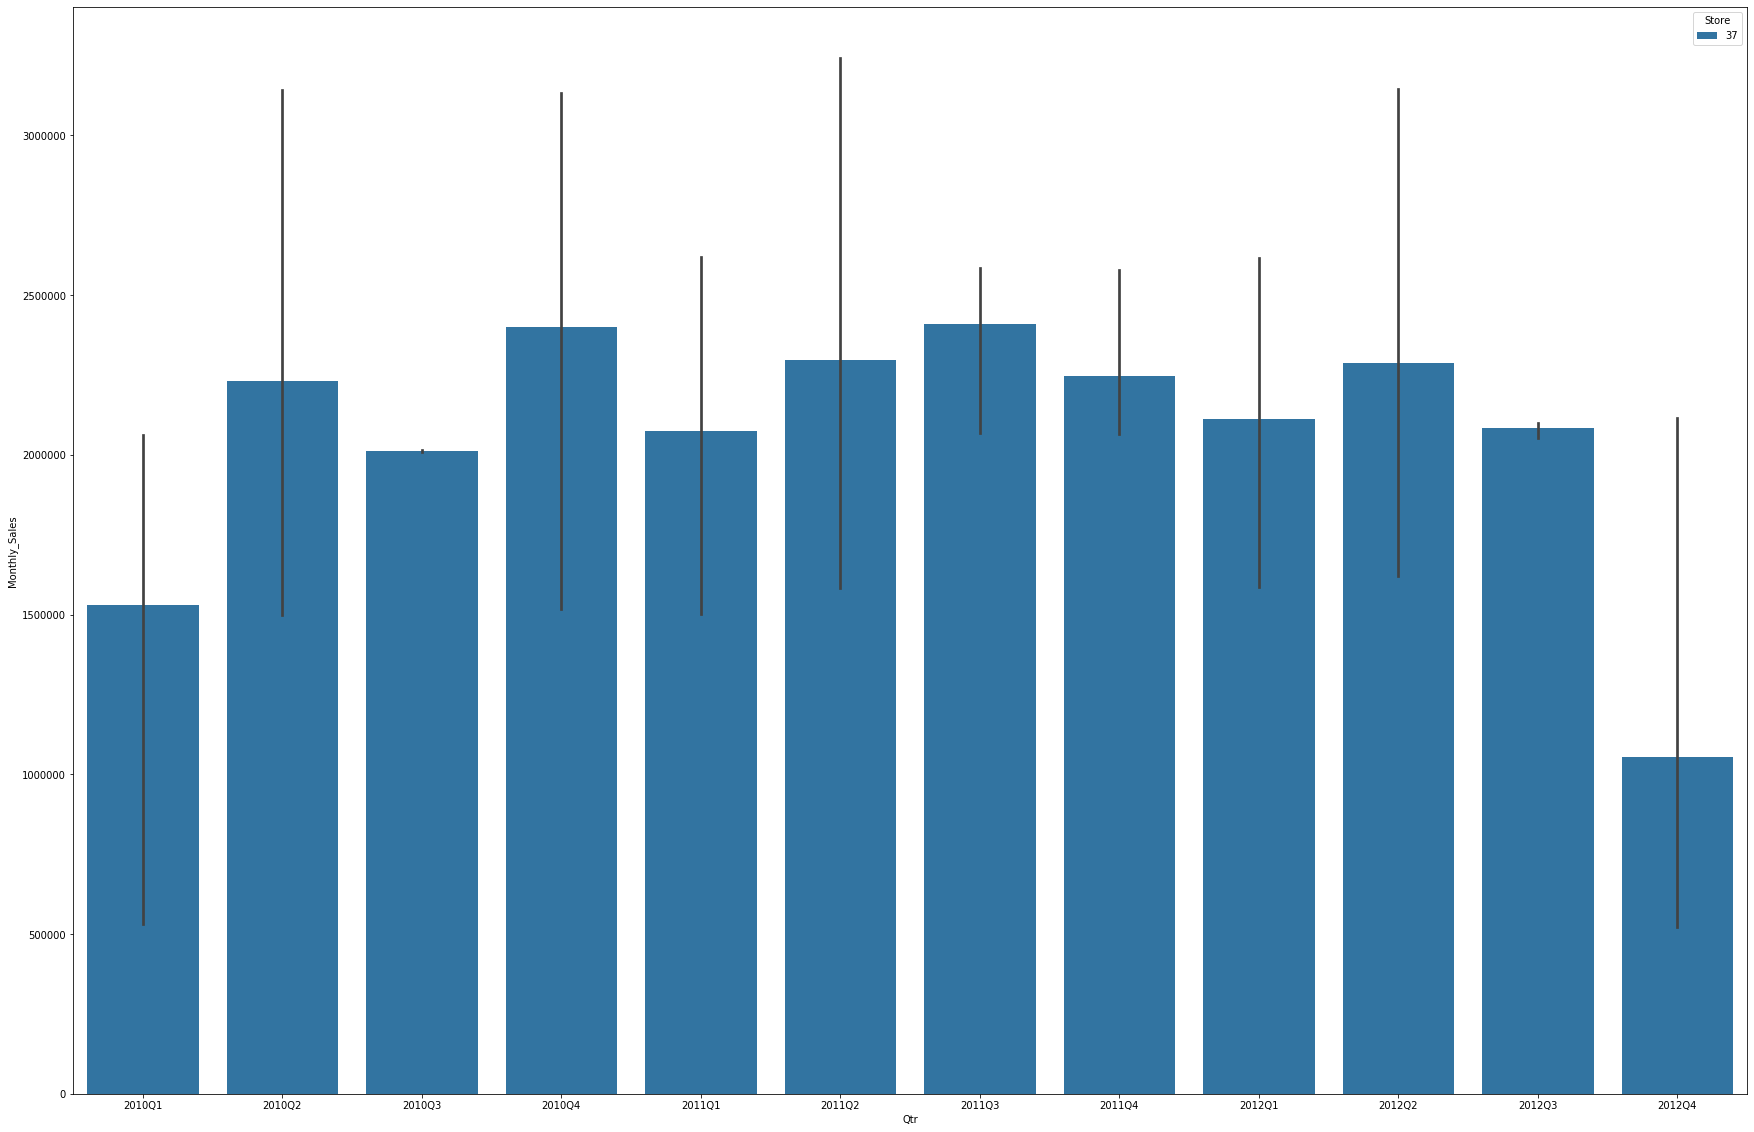

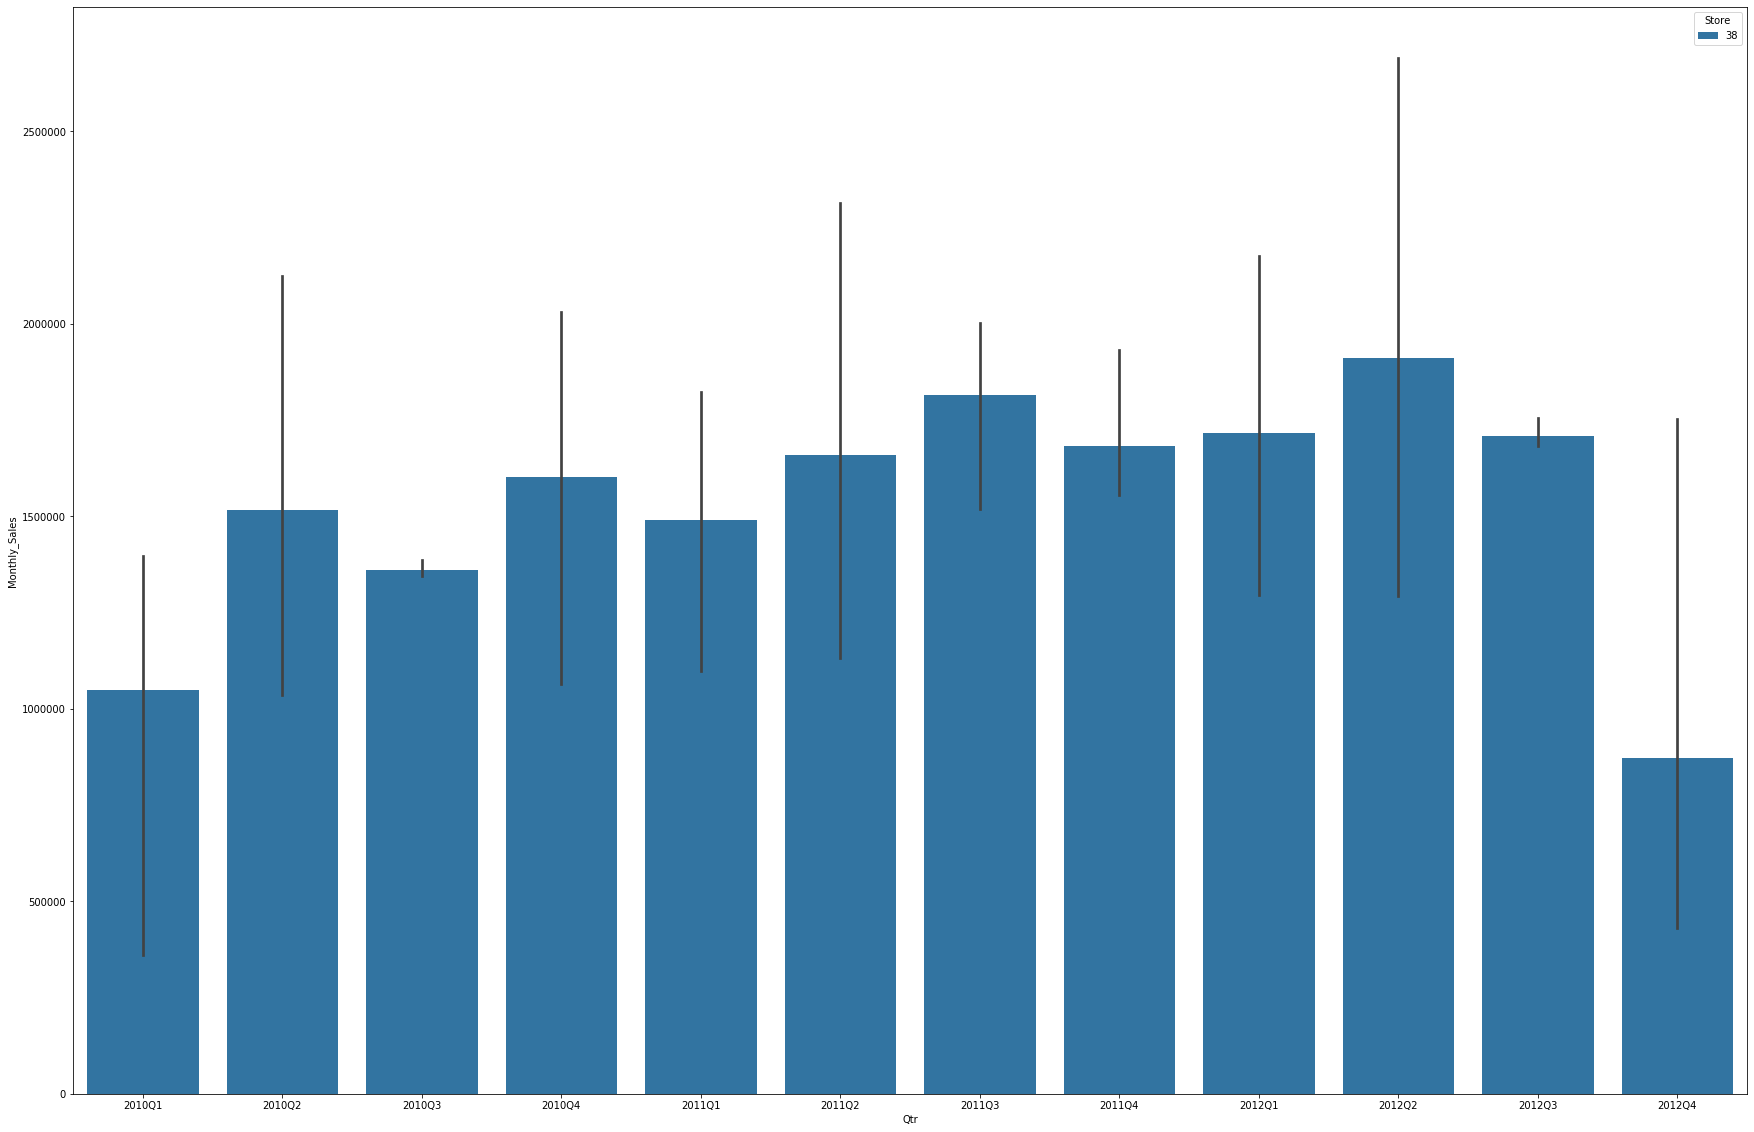

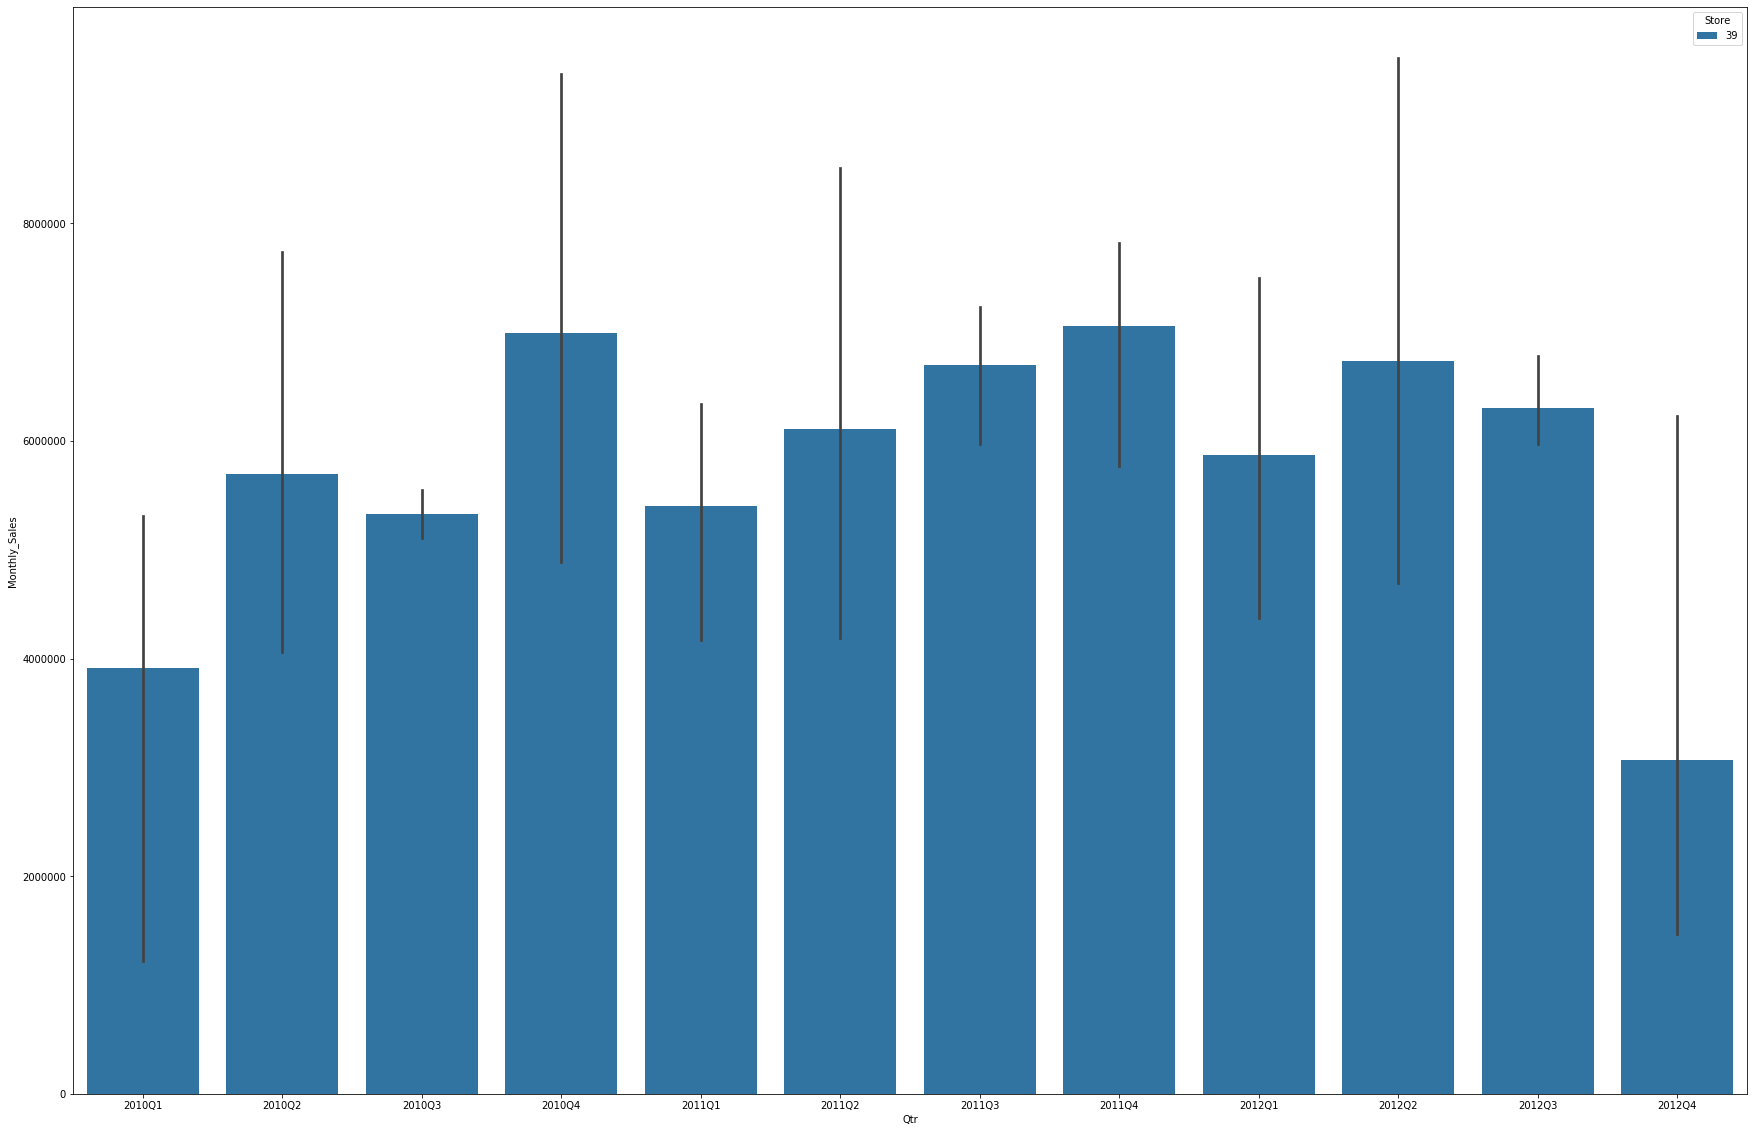

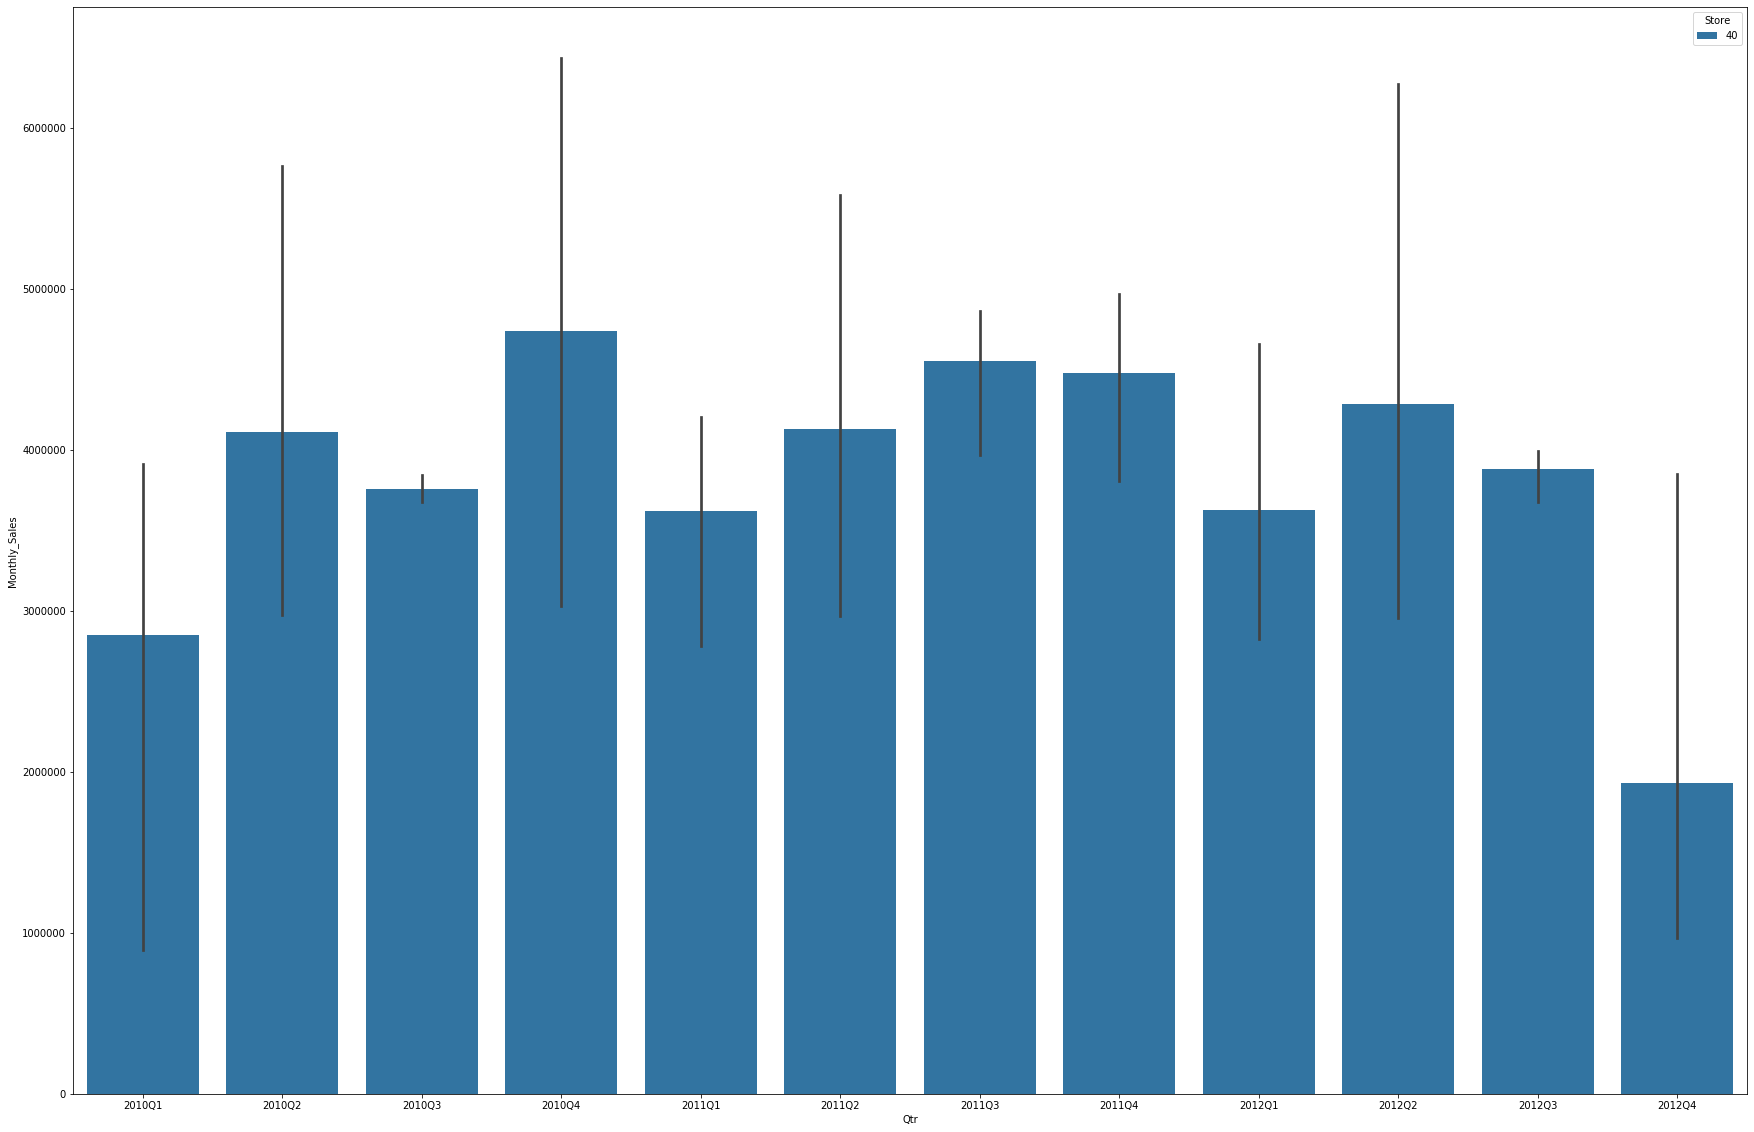

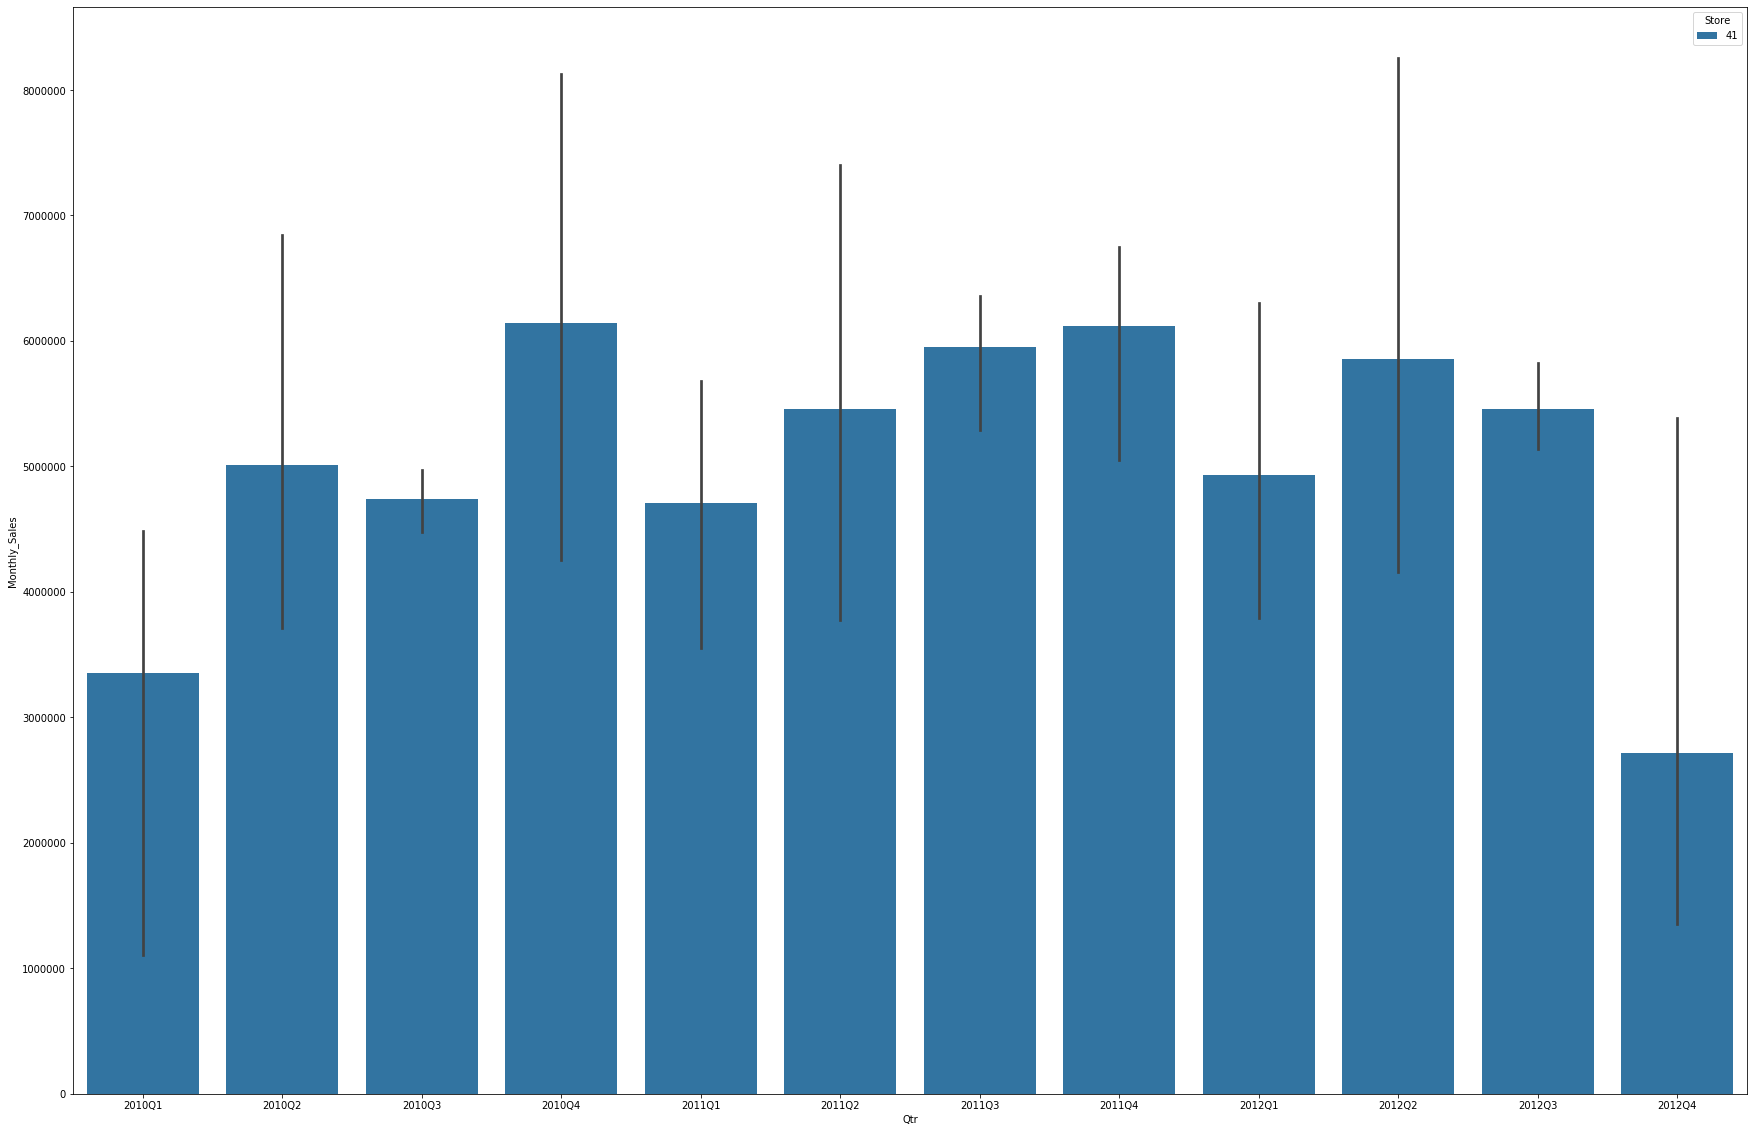

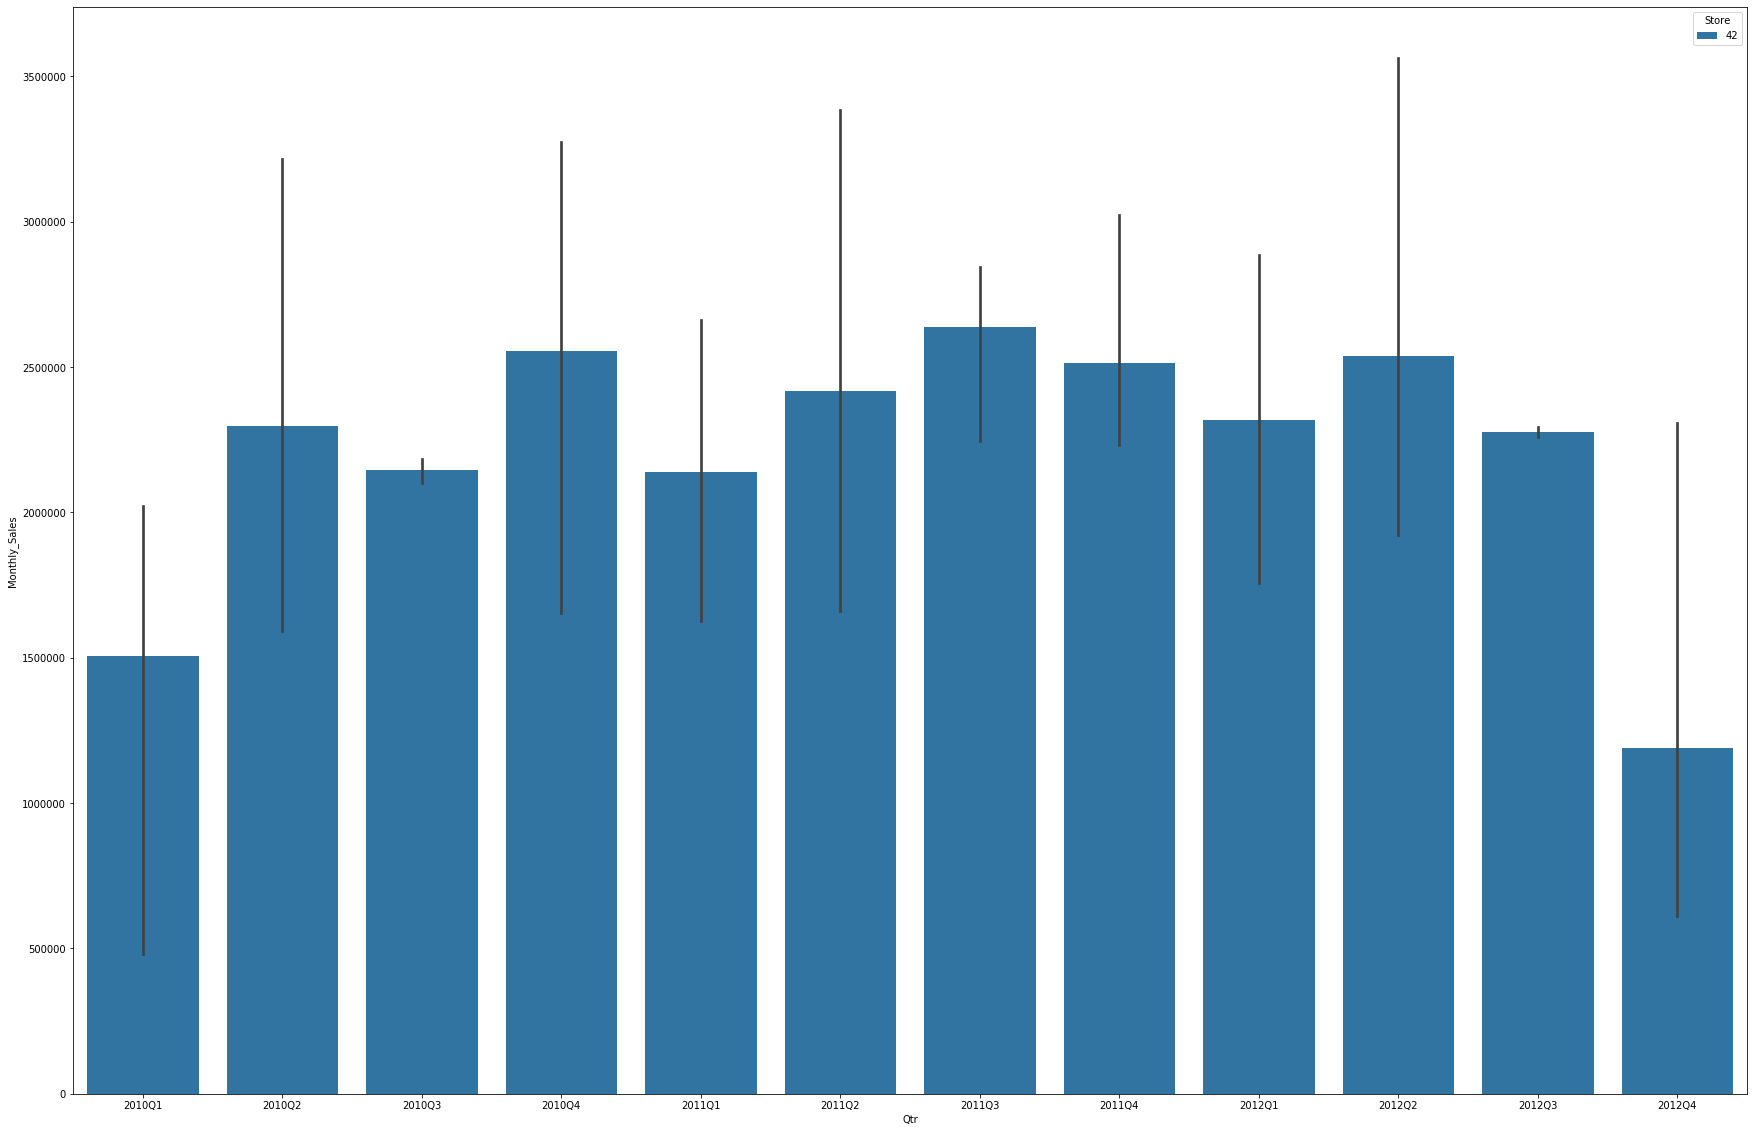

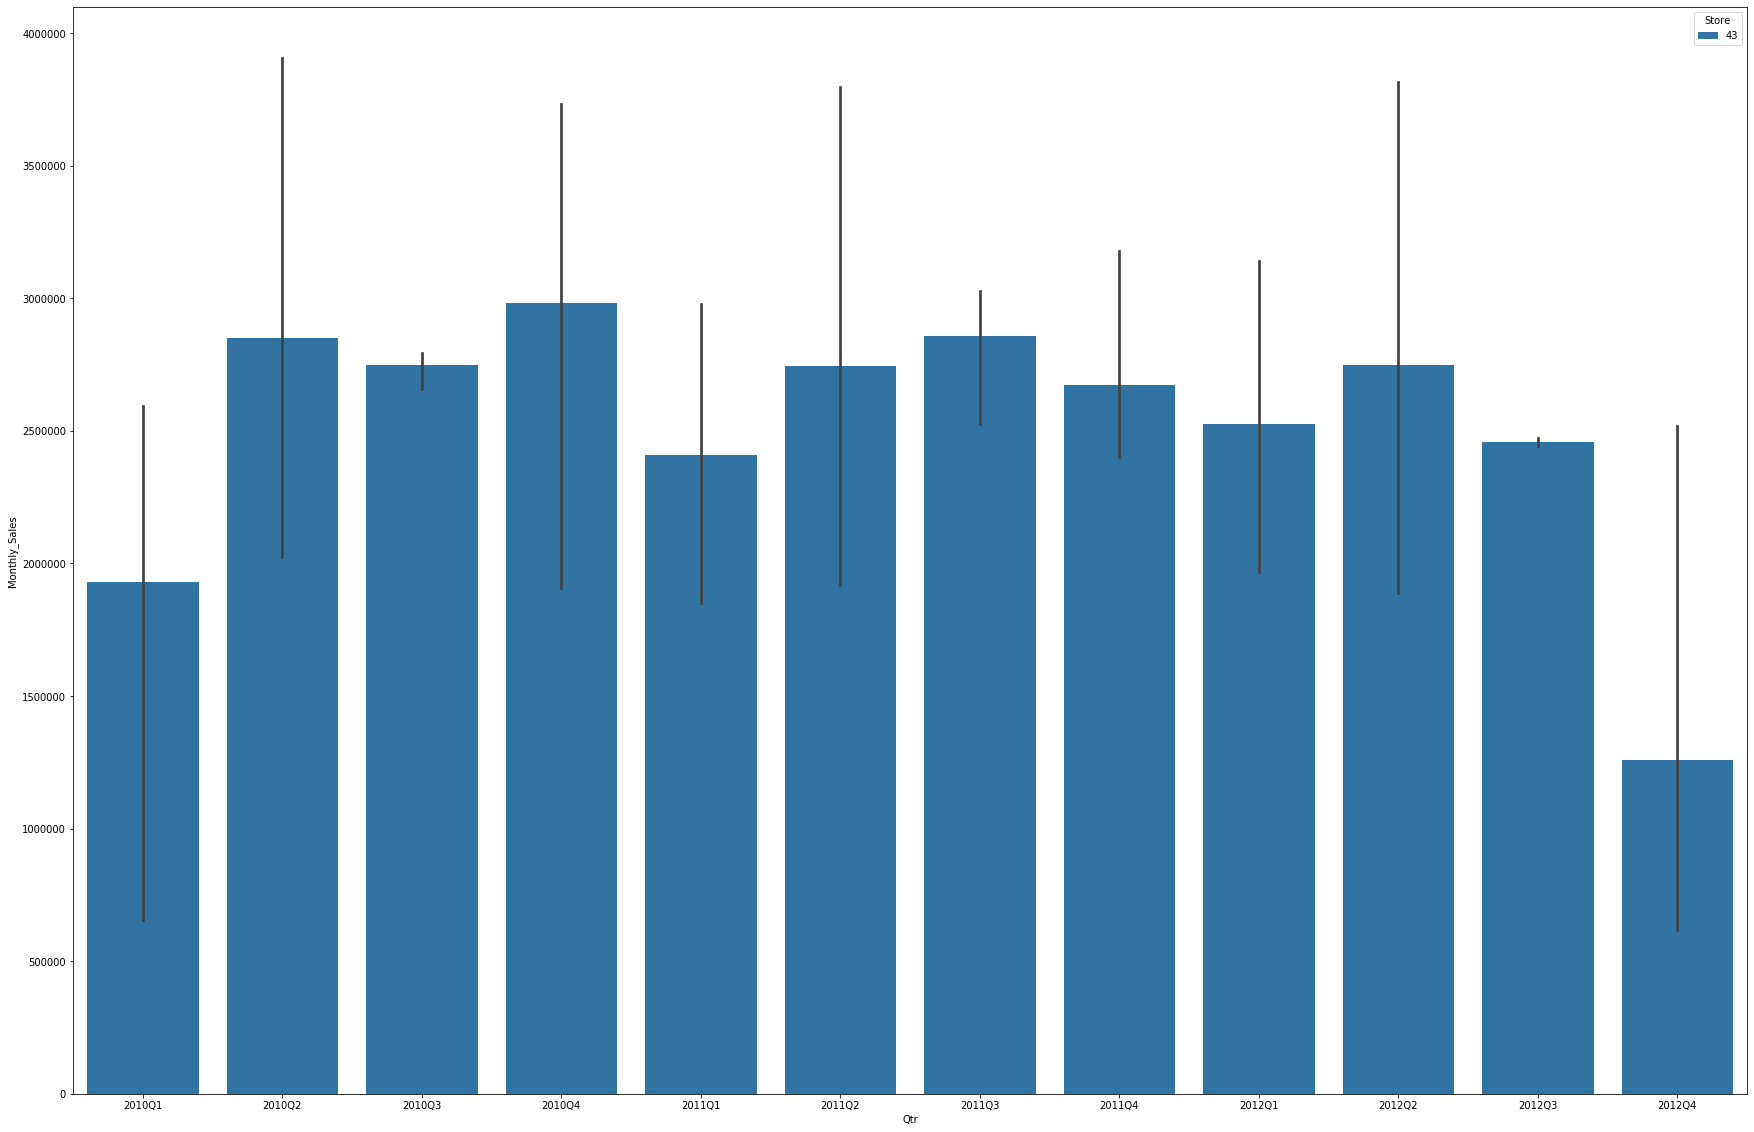

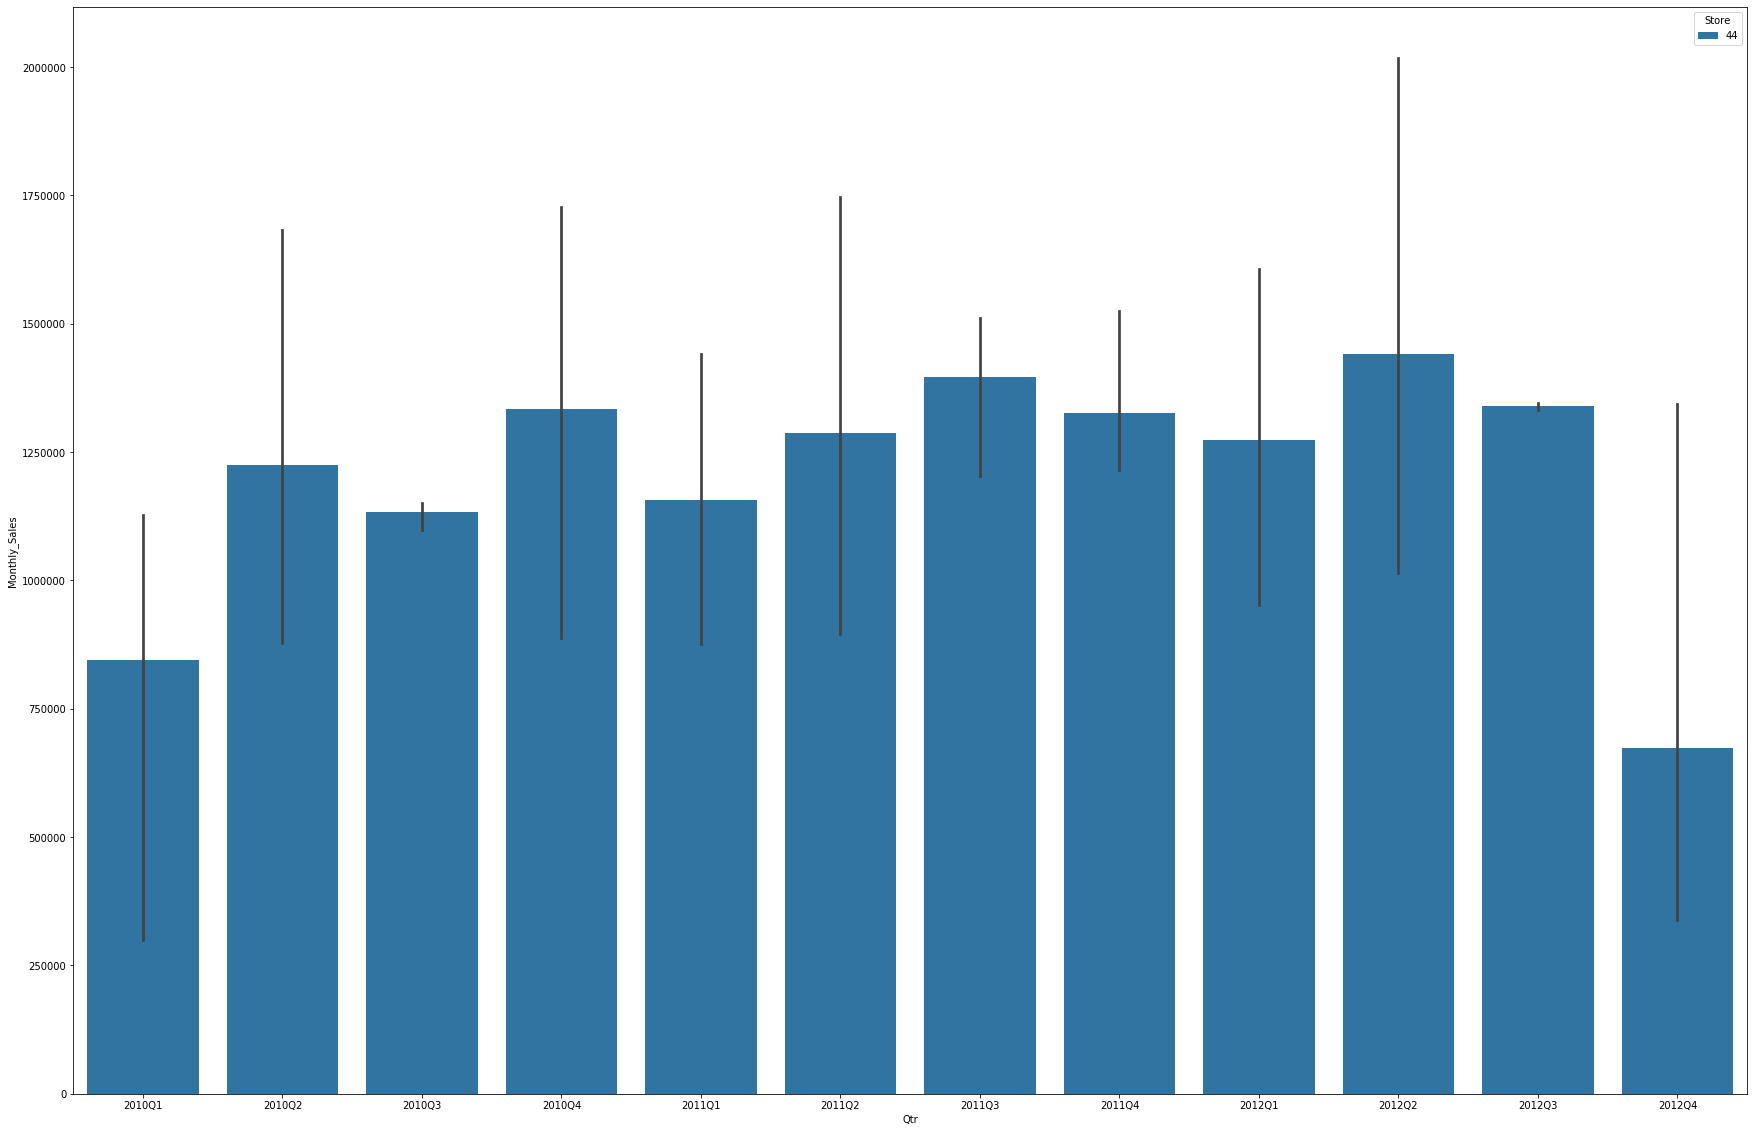

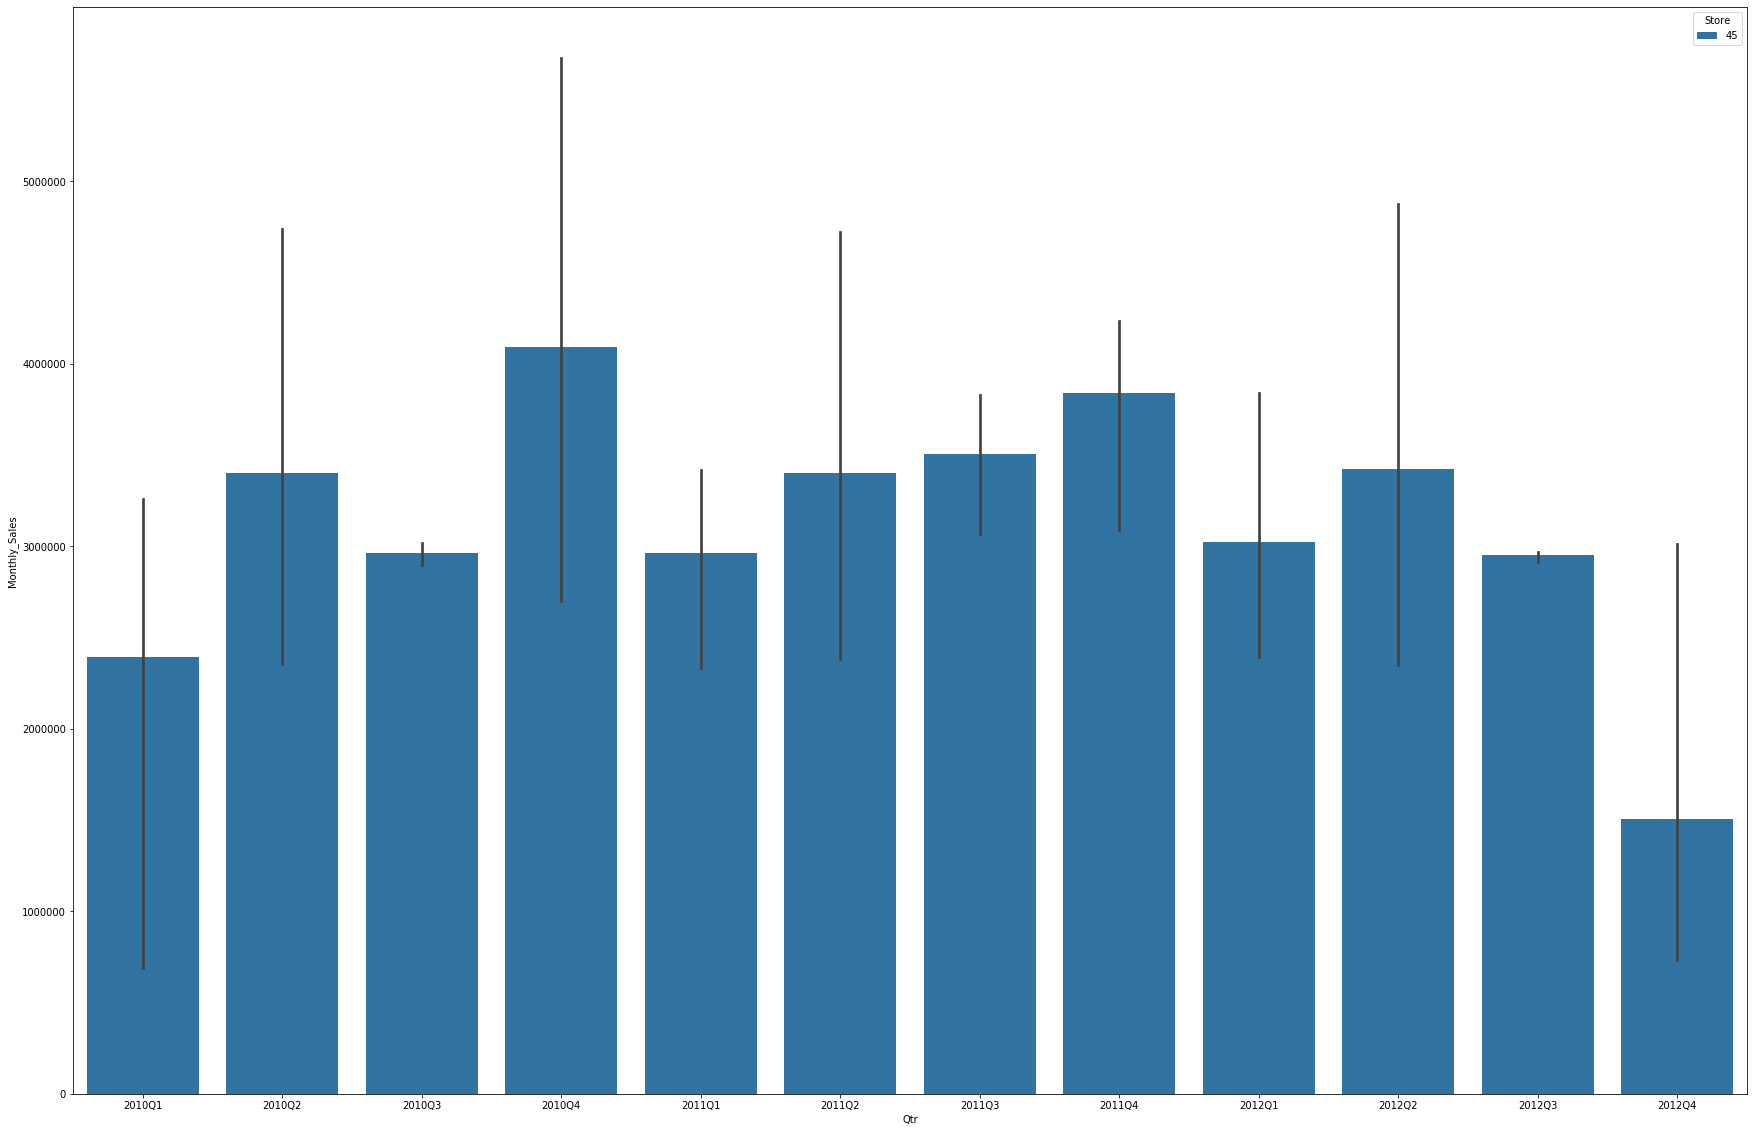

In [34]:
#Qtr sales for all stores
for i in range(1,46):
    plt.figure(figsize=(30,20))
    x=a[a.Store==i]
    print(sns.barplot(x='Qtr', y='Monthly_Sales', data=x, hue='Store'))


# Monthly and semester view of sales in units



#Its can be seen from the above plots that the sales for the 45 stores was least on first month and last month
#Sales are best on 4th and 10th quarter 
#Sales are not steady for each quarter and are fluctuating in nature
#Sales can be analysed better on store basis using the bar plots generated. For this work I will not try to analyze each store sales

# For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [35]:
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment     Qtr    Month  
0  211.096358         8.106  2010Q2  2010-05  
1  211.242170         8.106  2010Q4  2010-12  
2  211.289143         8.106  2010Q1  2010-02  
3  211.319643         8.106  2010Q1  2010-02  
4  211.350143         8.106  2010Q2  2010-05

In [36]:
#Getting Store 1 data
store_1_data=pd.DataFrame(data[data['Store']==1])
store_1_data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90             0        42.31       2.572   
1        1 2010-12-02    1641957.44             1        38.51       2.548   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
4        1 2010-05-03    1554806.68             0        46.50       2.625   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08       3.666   
139      1 2012-05-10    1670785.97             0        68.55       3.617   
140      1 2012-12-10    1573072.81             0        62.99       3.601   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   

            CPI  Unemployment     Qtr    Month  
0    211.096358         8.106  2010Q2  2010-05  
1    211.242170         8.106  2010Q4  2010-12  
2    211.289143         8.106  2010Q1  2010-02  
3    211.319643         8.106  2010Q1  2010-02  
4    211.350143         8.106  2010Q2  2010-05  
..          ...           ...     ...      ...  
138  222.981658         6.908  2012Q3  2012-09  
139  223.181477         6.573  2012Q2  2012-05  
140  223.381296         6.573  2012Q4  2012-12  
141  223.425723         6.573  2012Q4  2012-10  
142  223.444251         6.573  2012Q4  2012-10  

[143 rows x 10 columns]

In [37]:
#Getting dates a numbers
store_1_data['Restructured_Dates']=pd.factorize(store_1_data.Date)[0]+1

In [38]:
store_1_data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-05-02    1643690.90             0        42.31       2.572   
1        1 2010-12-02    1641957.44             1        38.51       2.548   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
4        1 2010-05-03    1554806.68             0        46.50       2.625   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08       3.666   
139      1 2012-05-10    1670785.97             0        68.55       3.617   
140      1 2012-12-10    1573072.81             0        62.99       3.601   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   

            CPI  Unemployment     Qtr    Month  Restructured_Dates  
0    211.096358         8.106  2010Q2  2010-05                   1  
1    211.242170         8.106  2010Q4  2010-12                   2  
2    211.289143         8.106  2010Q1  2010-02                   3  
3    211.319643         8.106  2010Q1  2010-02                   4  
4    211.350143         8.106  2010Q2  2010-05                   5  
..          ...           ...     ...      ...                 ...  
138  222.981658         6.908  2012Q3  2012-09                 139  
139  223.181477         6.573  2012Q2  2012-05                 140  
140  223.381296         6.573  2012Q4  2012-12                 141  
141  223.425723         6.573  2012Q4  2012-10                 142  
142  223.444251         6.573  2012Q4  2012-10                 143  

[143 rows x 11 columns]

In [39]:
#Building a model 
#Null Hypothesis is CPI, unemployment, and fuel price have no impact on sales.
#Altenate Hypothesis is CPI, unemployment, and fuel price have anyimpact on sales.
#Applying different models

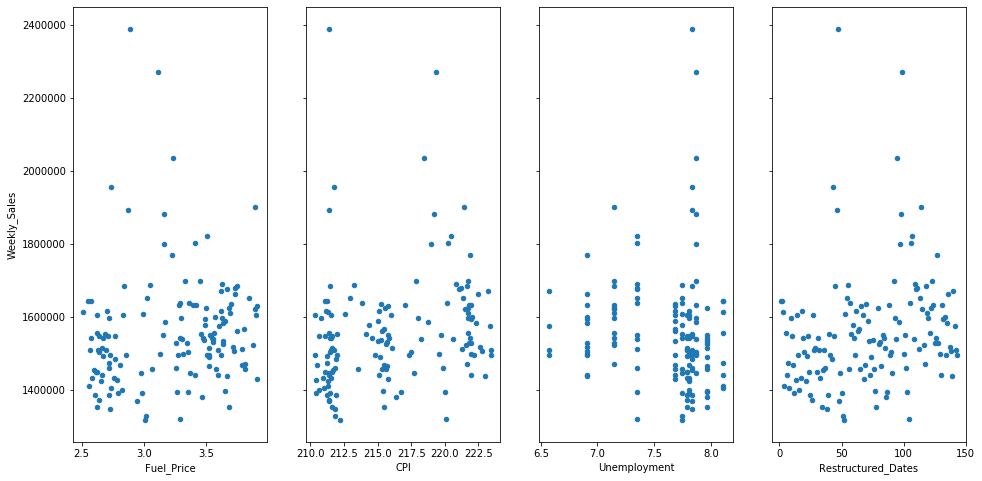

In [40]:
#plotting data
fig, axs = plt.subplots(1, 4, sharey=True)
store_1_data.plot(kind='scatter', x='Fuel_Price', y='Weekly_Sales',ax=axs[0], figsize=(16,8))
store_1_data.plot(kind='scatter', x='CPI', y='Weekly_Sales',ax=axs[1], figsize=(16,8))
store_1_data.plot(kind='scatter', x='Unemployment', y='Weekly_Sales',ax=axs[2], figsize=(16,8))
store_1_data.plot(kind='scatter', x='Restructured_Dates', y='Weekly_Sales',ax=axs[3], figsize=(16,8))

In [41]:
#Understanding the corellation between Weekly Sales and the variables
print ('Corr b/w Fuel Prices and Weekly Sales :',np.corrcoef(store_1_data.Fuel_Price, store_1_data.Weekly_Sales)[0])
print("\n")
print ('Corr b/w CPI and Weekly Sales :',np.corrcoef(store_1_data.CPI, store_1_data.Weekly_Sales)[0])
print("\n")
print ('Corr b/w Unemployment and Weekly Sales :',np.corrcoef(store_1_data.Unemployment, store_1_data.Weekly_Sales)[0])
print("\n")
print ('Corr b/w Restructured_Dates and Weekly Sales :',np.corrcoef(store_1_data.Restructured_Dates, store_1_data.Weekly_Sales)[0])
print("\n")

Corr b/w Fuel Prices and Weekly Sales : [1.         0.12459158]


Corr b/w CPI and Weekly Sales : [1.         0.22540766]


Corr b/w Unemployment and Weekly Sales : [ 1.         -0.09795539]


Corr b/w Restructured_Dates and Weekly Sales : [1.         0.21453922]




In [81]:
#Using Stats Model to understand the hypothesis: Model 1
import statsmodels.formula.api as smf
model1=smf.ols(formula='Weekly_Sales ~ CPI', data=store_1_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     7.547
Date:                Sun, 17 May 2020   Prob (F-statistic):            0.00679
Time:                        22:23:08   Log-Likelihood:                -1908.6
No. Observations:                 143   AIC:                             3821.
Df Residuals:                     141   BIC:                             3827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.902e+05   6.35e+05     -0.299      0.765   -1.45e+06    1.07e+06
CPI         8080.9350   2941.442      2.747      0.007    2265.906    1.39e+04
==============================================================================
Omnibus:                       97.333   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.646
Skew:                           2.413   Prob(JB):                    2.14e-149
Kurtosis:                      12.572   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#Model 2
import statsmodels.formula.api as smf
model1=smf.ols(formula='Weekly_Sales ~ CPI + Fuel_Price', data=store_1_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.126
Date:                Sun, 17 May 2020   Prob (F-statistic):             0.0182
Time:                        22:23:09   Log-Likelihood:                -1908.2
No. Observations:                 143   AIC:                             3822.
Df Residuals:                     140   BIC:                             3831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.868e+05   8.65e+05     -0.794      0.428    -2.4e+06    1.02e+06
CPI         1.096e+04   4492.302      2.439      0.016    2076.653    1.98e+04
Fuel_Price -3.879e+04   4.57e+04     -0.848      0.398   -1.29e+05    5.16e+04
==============================================================================
Omnibus:                       95.677   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.407
Skew:                           2.366   Prob(JB):                    2.38e-144
Kurtosis:                      12.414   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#Model 3
import statsmodels.formula.api as smf
model1=smf.ols(formula='Weekly_Sales ~ CPI + Fuel_Price + Unemployment', data=store_1_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.303
Date:                Sun, 17 May 2020   Prob (F-statistic):            0.00616
Time:                        22:23:09   Log-Likelihood:                -1906.0
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     139   BIC:                             3832.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.887e+06   1.74e+06     -2.234      0.027   -7.33e+06   -4.46e+05
CPI           2.179e+04   6785.272      3.212      0.002    8376.030    3.52e+04
Fuel_Price   -6.484e+04   4.68e+04     -1.384      0.169   -1.57e+05    2.78e+04
Unemployment  1.241e+05   5.88e+04      2.111      0.037    7846.506     2.4e+05
==============================================================================
Omnibus:                       93.038   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.590
Skew:                           2.267   Prob(JB):                    4.37e-143
Kurtosis:                      12.459   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#Model 4
import statsmodels.formula.api as smf
model1=smf.ols(formula='Weekly_Sales ~ CPI + Fuel_Price + Unemployment + Restructured_Dates', data=store_1_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     3.212
Date:                Sun, 17 May 2020   Prob (F-statistic):             0.0148
Time:                        22:23:10   Log-Likelihood:                -1906.0
No. Observations:                 143   AIC:                             3822.
Df Residuals:                     138   BIC:                             3837.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.483e+06      3e+06     -1.160      0.248   -9.42e+06    2.45e+06
CPI                 1.986e+04   1.35e+04      1.466      0.145   -6930.717    4.66e+04
Fuel_Price         -6.746e+04   4.96e+04     -1.360      0.176   -1.66e+05    3.06e+04
Unemployment        1.249e+05   5.92e+04      2.110      0.037    7838.064    2.42e+05
Restructured_Dates   235.8714   1426.938      0.165      0.869   -2585.618    3057.360
==============================================================================
Omnibus:                       91.841   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.993
Skew:                           2.238   Prob(JB):                    3.53e-138
Kurtosis:                      12.285   Cond. No.                     5.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Notes
All models show that we cannot reject the null hypothesis confidently and there is not strong evidence that CPI, fuel price and unemploymnet have any significant effect on weekly sales

In [85]:
#Scikit Learn Model
#Experimental Trial and Error using Looping
#Defining features and lables for the Regression problem

X=store_1_data.iloc[:,[5,6,7,10]]
y=store_1_data.iloc[:,[2]]
X


Fuel_Price         CPI  Unemployment  Restructured_Dates
0         2.572  211.096358         8.106                   1
1         2.548  211.242170         8.106                   2
2         2.514  211.289143         8.106                   3
3         2.561  211.319643         8.106                   4
4         2.625  211.350143         8.106                   5
..          ...         ...           ...                 ...
138       3.666  222.981658         6.908                 139
139       3.617  223.181477         6.573                 140
140       3.601  223.381296         6.573                 141
141       3.594  223.425723         6.573                 142
142       3.506  223.444251         6.573                 143

[143 rows x 4 columns]

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,30):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=i)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    training_score=model.score(X_train,y_train)
    testing_score=model.score(X_test,y_test)
    
    if testing_score > training_score:
        print("Testing : {} Training : {} Random State: {}".format(testing_score,training_score,i))

Testing : 0.1374410222922836 Training : 0.06947824109061107 Random State: 2
Testing : 0.07485179452462043 Training : 0.06791081795111109 Random State: 5
Testing : 0.111216345724783 Training : 0.047226272389875534 Random State: 7
Testing : 0.11384744928400048 Training : 0.08149040730011214 Random State: 8
Testing : 0.0867455943929567 Training : 0.0737529687677827 Random State: 9
Testing : 0.15064018279255864 Training : 0.04751749004994099 Random State: 10
Testing : 0.20388114082251108 Training : 0.06103741153257036 Random State: 16
Testing : 0.04916577475707284 Training : 0.046300926242415885 Random State: 17
Testing : 0.11822998461123957 Training : 0.0742459836871906 Random State: 19
Testing : 0.11616126499576662 Training : 0.02870583363167389 Random State: 24
Testing : 0.14583253671188545 Training : 0.07095178108997957 Random State: 27


In [87]:
#Notes: The linear regression is a poor fit to the data and hence cannot be used confidently for prediction. 